# Aminata DIALLO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# CLASSE DU RESEAU DE NEURONE
 - RNN prend en entrée le nombre de couche et les fonnctions de chaque couche

In [2]:
class RNN:
    
    def __init__(self, nb_couches, fonction):
        
        self.nb_couches = nb_couches # nbr couche du RNN
        self.a0 = np.empty([]) # l'entré courant
        self.parameters_W= np.empty(nb_couches, dtype=object)    # Liste des tableaux de W du reseau
        self.parameters_b= np.empty(nb_couches, dtype=object)    # Liste des tableaux de W du reseau
        self.stockagePreactivation = np.empty(nb_couches, dtype=object) # stockage des préactivation
        self.stockageActivation = np.empty(nb_couches+1, dtype=object) # stockage des activation
        self.stockage_nabla_w = np.empty(nb_couches, dtype=object)   #stockage des nabla_w
        self.stockage_nabla_b = np.empty(nb_couches, dtype=object)   # stockage des nabla_c
        self.sortie  = None # sortie 
        self.cible  = None # la cible
        self.fonction = fonction
        
    
    ''' Fonction pour initialiser les parametres du RNN'''
    def initialisation_parametre(self,dimension_couche):
    
        
        # dimension de la couche du reseau de neuronne par exemple[entree,nbrN_1couche,...,nbrN_Ncouche]
        L = len(dimension_couche) 
       
        
    
        l=1
        for i in range(0,self.nb_couches): #remplir la taille des neurones et biais de chaque couche du RNN
            
            self.parameters_W[i] = np.zeros((dimension_couche[l], dimension_couche[l - 1]),float)
            self.parameters_b[i] = np.zeros((dimension_couche[l], 1),float)
            l =l+1   

       
    #fonction de préactivation
    def f_preactivation(self,a,w,b):
        return np.dot(w,a) + b

    ''' Fonction Relu '''
    f_relu = lambda x: x if x > 0 else 0
    f_relu = np.vectorize(f_relu)
    
    
    
    
    ''' Fonction Identite '''
    f_identity = lambda x: x 
    f_identity = np.vectorize(f_relu)
    
   
    
    ''' Fonction Cout '''
    def cout(self,sortie, cible):
        return (sortie-cible) * 2  

    ''' Dérivé Fonction Cout '''
    def derivCout(self,sortie, cible) :
        return 2*(sortie-cible)
        
   

In [3]:
''' Dérivé Fonction Relu '''
derivF_Relu = lambda z : 1 if z > 0 else 0
derivF_Relu = np.vectorize(derivF_Relu)
    
''' Dérivé Fonction Identite '''
def derivF_Identity(y):
    return 1
derivF_Identity =np.vectorize(derivF_Identity)

## Propagation Avant

 - La fonction prend en entrée un réseau de neurone
 - Je fais la propagation de l'entrée jusqu'à la sortie de mon reseau de neurone

In [4]:
''' Fonction de propagation avant qui prend en entree un reseau de neurone et un boelean '''
def rn_propagation_avant(RNN):
    
    for i in range(0, RNN.nb_couches):
        
        # A l'entree de la première couche
        if i == 0  and i != RNN.nb_couches-1:
            if RNN.fonction[i] == 'relu' :
                z = RNN.f_preactivation(RNN.a0, RNN.parameters_W[i], RNN.parameters_b[i])
                a = RNN.f_relu(z)
                RNN.stockagePreactivation[i] = z
                RNN.stockageActivation[i] = RNN.a0 
                RNN.stockageActivation[i+1] = a
                    
        # A l'entée de la dernière couche
        elif i == RNN.nb_couches-1  :
            if RNN.fonction[i] == 'identite' :
                if RNN.nb_couches ==1 :
                    z = RNN.f_preactivation(RNN.a0, RNN.parameters_W[i], RNN.parameters_b[i])
                    a = RNN.f_identity(z)
                    RNN.stockagePreactivation[i] = z
                    RNN.stockageActivation[i] = RNN.a0 
                    RNN.stockageActivation[i+1] = a
                    RNN.sortie  = a
                    print(a)
                    print("sortie : "+ str(a))
                else :
                    z = RNN.f_preactivation(a, RNN.parameters_W[i], RNN.parameters_b[i])
                    a = RNN.f_identity(z)
                    RNN.stockagePreactivation[i] = z
                    RNN.stockageActivation[i+1] = a
                    RNN.sortie  = a
                    print(a)
                    print("sortie : "+ str(a))
                    
        #A l'entrée des couches cachées   
        else :
            if RNN.fonction[i] == 'relu' :
                z = RNN.f_preactivation(a,RNN.parameters_W[i], RNN.parameters_b[i])
                a = RNN.f_relu(z)
                a = RNN.f_relu(z)
                RNN.stockagePreactivation[i] = z
                RNN.stockageActivation[i+1] = a
    
    
    print(" les préactivation : "+str(RNN.stockagePreactivation) +"\n les activations :" + str(RNN.stockageActivation))
    
    print("La sortie : "+str(RNN.sortie))
    
    
                    

## Propagation Arrière

 - La fonction prend en entrée un réseau de neurone
 - Je fais la retroprpagation de dernière couche jusqu'à l'entrée en mettant à jour les w et b

In [5]:
''' Fonction de retropropagation arriere qui prend en entree un reseau de neurone '''
def rn_retropropagation(RNN) :
    
    #Gardient Cout
    ga = RNN.derivCout(RNN.sortie, RNN.cible)
  
    L = RNN.nb_couches 
    print(L)
    i = L
    while L !=0 :
        print("\n\n--------------------Couche "+str(L)+" ---------------------------")
       
        if i == L:
           
            gz = np.array(ga * derivF_Identity(RNN.stockagePreactivation[i-1]))
            
            #Gardient W et gradient b
            nabla_w = gz * (RNN.stockageActivation[i-1]).T
            nabla_b = gz
            
            #Mise à jours des W et b de lq derniere couche
            RNN.stockage_nabla_w[L-1] = nabla_w
            RNN.stockage_nabla_b[L-1] = nabla_b
           
        
           
        else :
            #Mise à jour  des gardients ga et gw 
            ga = RNN.parameters_W[L].T.dot(gz)
            gz = np.array(ga * derivF_Relu(RNN.stockagePreactivation[L-1]))
            print("gz["+str(i) +"] :" +str(gz))
            
            #Mise à jours des W et b
            nabla_w = gz * (RNN.stockageActivation[L-1]).T
            nabla_b = gz
        
           
                  
            RNN.stockage_nabla_w[L-1] = nabla_w
            RNN.stockage_nabla_b[L-1] = nabla_b
                  
       
        print("gz :" + str(gz) + "\n nabla_w :" +str( nabla_w ) + "\n nabla_b : " + str(nabla_b))
        
        L = L -1 
       
          
        

## Descente de gradient pour une seule entrée
 - A fin d'exploiter l'exemple du cour
 - La fonction prend comme argument l'entrée, la cible , un RNN, et le nombre d'itérations
 - Retourne une liste de cout

In [6]:
def descente_grandient(X, Y, RNN, learning_rate, num_iterations):
    
    couts = np.zeros(num_iterations)
    for i in range(0, num_iterations):
        
        RNN.a0 = X.T
        RNN.cible =Y
        rn_propagation_avant(RNN)
        couts[i] =  RNN.cout(RNN.sortie,RNN.cible)
        rn_retropropagation(RNN)

        for i in range(RNN.nb_couches):
            RNN.parameters_W[i] = RNN.parameters_W[i] - learning_rate*( RNN.stockage_nabla_w[i])
            RNN.parameters_b[i] = RNN.parameters_b[i] - learning_rate*( RNN.stockage_nabla_b[i])
        
    return couts
     
    

# Descente de gradient pour plusieurs données

In [7]:
def gradient_stochastique(RNN, learning_rate, num_iterations):
    
    couts = np.zeros(num_iterations)
    for i in range(0, num_iterations):
        
        rn_propagation_avant(RNN)
        couts =  RNN.cout(RNN.sortie,RNN.cible)
        rn_retropropagation(RNN)

        for i in range(RNN.nb_couches):
            RNN.parameters_W[i] = RNN.parameters_W[i] - learning_rate*( RNN.stockage_nabla_w[i])
            RNN.parameters_b[i] = RNN.parameters_b[i] - learning_rate*( RNN.stockage_nabla_b[i])
            
       
    return RNN.parameters_W,RNN.parameters_b,couts
     
    

## 1. Exemple du cour

In [8]:
My_RNN = RNN(3,['relu', 'relu', 'identite'])

#Initialisation de la taille de l'entrée et des couches
My_RNN.initialisation_parametre([2,3,2,1])

#Mise 0 jour desv valeurs W et b, X et Y  du RNN
My_RNN.parameters_W[0] = np.array([[0, -1],[ 2, -3],[ 1, -1]])
My_RNN.parameters_W[1] = np.array([[0, 1, -1],[ 2, -2, 1]])
My_RNN.parameters_W[2] = np.array([[2, -1]])
My_RNN.parameters_b[0] = np.array([[0],[1], [-1]])
My_RNN.parameters_b[1] = np.array([[1],[-2]])
My_RNN.parameters_b[2] = np.array([[0]])

print("Les W = " + str(My_RNN.parameters_W))
print("Les b = " + str(My_RNN.parameters_b))



Les W = [array([[ 0, -1],
       [ 2, -3],
       [ 1, -1]])
 array([[ 0,  1, -1],
       [ 2, -2,  1]]) array([[ 2, -1]])]
Les b = [array([[ 0],
       [ 1],
       [-1]]) array([[ 1],
       [-2]])
 array([[0]])]


[[16]]
sortie : [[16]]
 les préactivation : [array([[2],
       [9],
       [2]]) array([[  8],
       [-14]])
 array([[16]])]
 les activations :[array([[ 1],
       [-2]]) array([[2],
       [9],
       [2]])
 array([[8],
       [0]]) array([[16]])]
La sortie : [[16]]
3


--------------------Couche 3 ---------------------------
gz :[[30]]
 nabla_w :[[240   0]]
 nabla_b : [[30]]


--------------------Couche 2 ---------------------------
gz[3] :[[60]
 [ 0]]
gz :[[60]
 [ 0]]
 nabla_w :[[120 540 120]
 [  0   0   0]]
 nabla_b : [[60]
 [ 0]]


--------------------Couche 1 ---------------------------
gz[3] :[[  0]
 [ 60]
 [-60]]
gz :[[  0]
 [ 60]
 [-60]]
 nabla_w :[[   0    0]
 [  60 -120]
 [ -60  120]]
 nabla_b : [[  0]
 [ 60]
 [-60]]
[[3.544912]]
sortie : [[3.544912]]
 les préactivation : [array([[2.  ],
       [8.64],
       [2.36]])
 array([[  2.0312],
       [-12.92  ]]) array([[3.544912]])]
 les activations :[array([[ 1],
       [-2]]) array([[2.  ],
       [8.64],
       [2.36]])
 arr

No handles with labels found to put in legend.


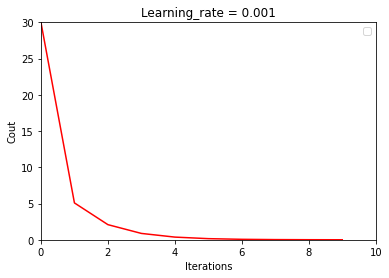

In [9]:
X = np.array([[1, -2]])
Y = np.array([[1]])
couts = descente_grandient(X,Y,My_RNN,0.001,10)
print("\n *************Les couts de chaque itérations ********************\n" +str(couts))
x_min = 0
x_max = 10.0
plt.plot(range(10),couts, 'r' )
plt.xlim(x_min,x_max)
plt.ylim((x_min),3*(x_max))
plt.title('Learning_rate = 0.001')
plt.xlabel('Iterations')
plt.ylabel('Cout')
plt.legend()
plt.show()

## Mes données de tests pour la regresion linéaire

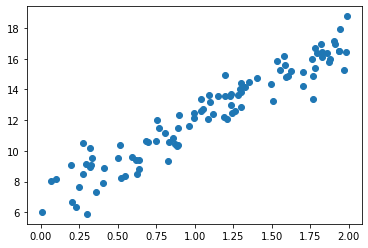

In [19]:
Xr = 2 * np.random.rand(100, 1)
Yr = 5 * Xr + 7 + np.random.randn(100, 1)
plt.plot(Xr,Yr,'o')
plt.show()

## 2. Regression Linéaire

### Initialisation de mon réseau de neurone avec un seul poids

In [20]:
My_RNN = RNN(1,['identite'])
My_RNN.initialisation_parametre([1,1])
My_RNN.parameters_W[0] = np.array([[2]])
My_RNN.parameters_b[0] = np.array([0])


### Répresentation de la droite avec les parametres initiales de mon réseau de neurone

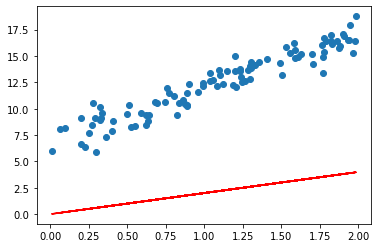

In [21]:
prediction = Xr.dot(My_RNN.parameters_W)+ My_RNN.parameters_b
plt.plot(Xr,Yr,'o')
plt.plot(Xr,prediction, c ='r')
plt.show()

### Descente de gradient sur 100 itérations et un pas de 0.001

In [22]:
biais =[]
poids =[]
couts =[]
a = np.dot(My_RNN.parameters_W,Xr[0])+My_RNN.parameters_b[0]
print(a)
for i in range(len(Xr)):
    My_RNN.a0 = Xr[i]
    My_RNN.cible = Yr[i]
   
    W, b,couts = gradient_stochastique(My_RNN,0.001,100)
    poids.append(W)
    biais.append(b)
   
My_RNN.parameters_W = np.sum(poids)/len(Xr)
My_RNN.parameters_b = np.sum(biais)/len(Xr)


[[1.02258498]]
[1.02258498]
sortie : [1.02258498]
 les préactivation : [array([1.02258498])]
 les activations :[array([0.51129249]) array([1.02258498])]
La sortie : [1.02258498]
1


--------------------Couche 1 ---------------------------
gz :[-18.72903767]
 nabla_w :[-9.57601631]
 nabla_b : [-18.72903767]
[1.04621016]
sortie : [1.04621016]
 les préactivation : [array([1.04621016])]
 les activations :[array([0.51129249]) array([1.04621016])]
La sortie : [1.04621016]
1


--------------------Couche 1 ---------------------------
gz :[-18.6817873]
 nabla_w :[-9.55185755]
 nabla_b : [-18.6817873]
[1.06977574]
sortie : [1.06977574]
 les préactivation : [array([1.06977574])]
 les activations :[array([0.51129249]) array([1.06977574])]
La sortie : [1.06977574]
1


--------------------Couche 1 ---------------------------
gz :[-18.63465614]
 nabla_w :[-9.52775974]
 nabla_b : [-18.63465614]
[1.09328187]
sortie : [1.09328187]
 les préactivation : [array([1.09328187])]
 les activations :[array([0.51

1


--------------------Couche 1 ---------------------------
gz :[-16.59042637]
 nabla_w :[-8.48256041]
 nabla_b : [-16.59042637]
[2.11281813]
sortie : [2.11281813]
 les préactivation : [array([2.11281813])]
 les activations :[array([0.51129249]) array([2.11281813])]
La sortie : [2.11281813]
1


--------------------Couche 1 ---------------------------
gz :[-16.54857138]
 nabla_w :[-8.46116027]
 nabla_b : [-16.54857138]
[2.13369282]
sortie : [2.13369282]
 les préactivation : [array([2.13369282])]
 les activations :[array([0.51129249]) array([2.13369282])]
La sortie : [2.13369282]
1


--------------------Couche 1 ---------------------------
gz :[-16.50682198]
 nabla_w :[-8.43981411]
 nabla_b : [-16.50682198]
[2.15451486]
sortie : [2.15451486]
 les préactivation : [array([2.15451486])]
 les activations :[array([0.51129249]) array([2.15451486])]
La sortie : [2.15451486]
1


--------------------Couche 1 ---------------------------
gz :[-16.46517791]
 nabla_w :[-8.41852181]
 nabla_b : [-16.4

La sortie : [4.9855139]
1


--------------------Couche 1 ---------------------------
gz :[-14.80662671]
 nabla_w :[-16.60495113]
 nabla_b : [-14.80662671]
[5.01894222]
sortie : [5.01894222]
 les préactivation : [array([5.01894222])]
 les activations :[array([1.12145403]) array([5.01894222])]
La sortie : [5.01894222]
1


--------------------Couche 1 ---------------------------
gz :[-14.73977008]
 nabla_w :[-16.52997449]
 nabla_b : [-14.73977008]
[5.05221959]
sortie : [5.05221959]
 les préactivation : [array([5.05221959])]
 les activations :[array([1.12145403]) array([5.05221959])]
La sortie : [5.05221959]
1


--------------------Couche 1 ---------------------------
gz :[-14.67321533]
 nabla_w :[-16.45533639]
 nabla_b : [-14.67321533]
[5.08534671]
sortie : [5.08534671]
 les préactivation : [array([5.08534671])]
 les activations :[array([1.12145403]) array([5.08534671])]
La sortie : [5.08534671]
1


--------------------Couche 1 ---------------------------
gz :[-14.60696109]
 nabla_w :[-16

[6.51136575]
sortie : [6.51136575]
 les préactivation : [array([6.51136575])]
 les activations :[array([1.12145403]) array([6.51136575])]
La sortie : [6.51136575]
1


--------------------Couche 1 ---------------------------
gz :[-11.75492302]
 nabla_w :[-13.18260574]
 nabla_b : [-11.75492302]
[6.53790436]
sortie : [6.53790436]
 les préactivation : [array([6.53790436])]
 les activations :[array([1.12145403]) array([6.53790436])]
La sortie : [6.53790436]
1


--------------------Couche 1 ---------------------------
gz :[-11.7018458]
 nabla_w :[-13.12308208]
 nabla_b : [-11.7018458]
[6.56432314]
sortie : [6.56432314]
 les préactivation : [array([6.56432314])]
 les activations :[array([1.12145403]) array([6.56432314])]
La sortie : [6.56432314]
1


--------------------Couche 1 ---------------------------
gz :[-11.64900824]
 nabla_w :[-13.06382718]
 nabla_b : [-11.64900824]
[6.59062263]
sortie : [6.59062263]
 les préactivation : [array([6.59062263])]
 les activations :[array([1.12145403]) arr

 les activations :[array([1.12145403]) array([7.46232738])]
La sortie : [7.46232738]
1


--------------------Couche 1 ---------------------------
gz :[-9.85299975]
 nabla_w :[-11.04968623]
 nabla_b : [-9.85299975]
[7.4845721]
sortie : [7.4845721]
 les préactivation : [array([7.4845721])]
 les activations :[array([1.12145403]) array([7.4845721])]
La sortie : [7.4845721]
1


--------------------Couche 1 ---------------------------
gz :[-9.80851032]
 nabla_w :[-10.99979338]
 nabla_b : [-9.80851032]
[7.50671637]
sortie : [7.50671637]
 les préactivation : [array([7.50671637])]
 les activations :[array([1.12145403]) array([7.50671637])]
La sortie : [7.50671637]
1


--------------------Couche 1 ---------------------------
gz :[-9.76422178]
 nabla_w :[-10.95012582]
 nabla_b : [-9.76422178]
[7.52876065]
sortie : [7.52876065]
 les préactivation : [array([7.52876065])]
 les activations :[array([1.12145403]) array([7.52876065])]
La sortie : [7.52876065]
1


--------------------Couche 1 -----------

 nabla_b : [-7.20326234]
[8.61629662]
sortie : [8.61629662]
 les préactivation : [array([8.61629662])]
 les activations :[array([1.18762815]) array([8.61629662])]
La sortie : [8.61629662]
1


--------------------Couche 1 ---------------------------
gz :[-7.16853598]
 nabla_w :[-8.51355511]
 nabla_b : [-7.16853598]
[8.63357609]
sortie : [8.63357609]
 les préactivation : [array([8.63357609])]
 les activations :[array([1.18762815]) array([8.63357609])]
La sortie : [8.63357609]
1


--------------------Couche 1 ---------------------------
gz :[-7.13397703]
 nabla_w :[-8.47251193]
 nabla_b : [-7.13397703]
[8.65077227]
sortie : [8.65077227]
 les préactivation : [array([8.65077227])]
 les activations :[array([1.18762815]) array([8.65077227])]
La sortie : [8.65077227]
1


--------------------Couche 1 ---------------------------
gz :[-7.09958469]
 nabla_w :[-8.43166662]
 nabla_b : [-7.09958469]
[8.66788553]
sortie : [8.66788553]
 les préactivation : [array([8.66788553])]
 les activations :[array

sortie : [9.17404296]
 les préactivation : [array([9.17404296])]
 les activations :[array([1.18762815]) array([9.17404296])]
La sortie : [9.17404296]
1


--------------------Couche 1 ---------------------------
gz :[-6.05304329]
 nabla_w :[-7.18876459]
 nabla_b : [-6.05304329]
[9.18863359]
sortie : [9.18863359]
 les préactivation : [array([9.18863359])]
 les activations :[array([1.18762815]) array([9.18863359])]
La sortie : [9.18863359]
1


--------------------Couche 1 ---------------------------
gz :[-6.02386205]
 nabla_w :[-7.15410813]
 nabla_b : [-6.02386205]
[9.20315387]
sortie : [9.20315387]
 les préactivation : [array([9.20315387])]
 les activations :[array([1.18762815]) array([9.20315387])]
La sortie : [9.20315387]
1


--------------------Couche 1 ---------------------------
gz :[-5.99482148]
 nabla_w :[-7.11961873]
 nabla_b : [-5.99482148]
[9.21760415]
sortie : [9.21760415]
 les préactivation : [array([9.21760415])]
 les activations :[array([1.18762815]) array([9.21760415])]
La

 les activations :[array([1.05284816]) array([9.10730386])]
La sortie : [9.10730386]
1


--------------------Couche 1 ---------------------------
gz :[-7.24806097]
 nabla_w :[-7.63110764]
 nabla_b : [-7.24806097]
[9.12258632]
sortie : [9.12258632]
 les préactivation : [array([9.12258632])]
 les activations :[array([1.05284816]) array([9.12258632])]
La sortie : [9.12258632]
1


--------------------Couche 1 ---------------------------
gz :[-7.21749606]
 nabla_w :[-7.59892742]
 nabla_b : [-7.21749606]
[9.13780433]
sortie : [9.13780433]
 les préactivation : [array([9.13780433])]
 les activations :[array([1.05284816]) array([9.13780433])]
La sortie : [9.13780433]
1


--------------------Couche 1 ---------------------------
gz :[-7.18706003]
 nabla_w :[-7.56688291]
 nabla_b : [-7.18706003]
[9.15295817]
sortie : [9.15295817]
 les préactivation : [array([9.15295817])]
 les activations :[array([1.05284816]) array([9.15295817])]
La sortie : [9.15295817]
1


--------------------Couche 1 ---------

[9.6966749]
sortie : [9.6966749]
 les préactivation : [array([9.6966749])]
 les activations :[array([1.05284816]) array([9.6966749])]
La sortie : [9.6966749]
1


--------------------Couche 1 ---------------------------
gz :[-6.0693189]
 nabla_w :[-6.39007122]
 nabla_b : [-6.0693189]
[9.70947199]
sortie : [9.70947199]
 les préactivation : [array([9.70947199])]
 les activations :[array([1.05284816]) array([9.70947199])]
La sortie : [9.70947199]
1


--------------------Couche 1 ---------------------------
gz :[-6.04372471]
 nabla_w :[-6.36312442]
 nabla_b : [-6.04372471]
[9.72221512]
sortie : [9.72221512]
 les préactivation : [array([9.72221512])]
 les activations :[array([1.05284816]) array([9.72221512])]
La sortie : [9.72221512]
1


--------------------Couche 1 ---------------------------
gz :[-6.01823845]
 nabla_w :[-6.33629127]
 nabla_b : [-6.01823845]
[9.73490451]
sortie : [9.73490451]
 les préactivation : [array([9.73490451])]
 les activations :[array([1.05284816]) array([9.73490451

[10.17943604]
sortie : [10.17943604]
 les préactivation : [array([10.17943604])]
 les activations :[array([1.05284816]) array([10.17943604])]
La sortie : [10.17943604]
1


--------------------Couche 1 ---------------------------
gz :[-5.1037966]
 nabla_w :[-5.37352285]
 nabla_b : [-5.1037966]
[12.20535443]
sortie : [12.20535443]
 les préactivation : [array([12.20535443])]
 les activations :[array([1.40670797]) array([12.20535443])]
La sortie : [12.20535443]
1


--------------------Couche 1 ---------------------------
gz :[-5.08938393]
 nabla_w :[-7.15927694]
 nabla_b : [-5.08938393]
[12.22051482]
sortie : [12.22051482]
 les préactivation : [array([12.22051482])]
 les activations :[array([1.40670797]) array([12.22051482])]
La sortie : [12.22051482]
1


--------------------Couche 1 ---------------------------
gz :[-5.05906313]
 nabla_w :[-7.11662445]
 nabla_b : [-5.05906313]
[12.2355849]
sortie : [12.2355849]
 les préactivation : [array([12.2355849])]
 les activations :[array([1.40670797

sortie : [12.87382375]
 les préactivation : [array([12.87382375])]
 les activations :[array([1.40670797]) array([12.87382375])]
La sortie : [12.87382375]
1


--------------------Couche 1 ---------------------------
gz :[-3.75244528]
 nabla_w :[-5.27859469]
 nabla_b : [-3.75244528]
[12.88500164]
sortie : [12.88500164]
 les préactivation : [array([12.88500164])]
 les activations :[array([1.40670797]) array([12.88500164])]
La sortie : [12.88500164]
1


--------------------Couche 1 ---------------------------
gz :[-3.7300895]
 nabla_w :[-5.24714664]
 nabla_b : [-3.7300895]
[12.89611293]
sortie : [12.89611293]
 les préactivation : [array([12.89611293])]
 les activations :[array([1.40670797]) array([12.89611293])]
La sortie : [12.89611293]
1


--------------------Couche 1 ---------------------------
gz :[-3.70786692]
 nabla_w :[-5.21588596]
 nabla_b : [-3.70786692]
[12.90715803]
sortie : [12.90715803]
 les préactivation : [array([12.90715803])]
 les activations :[array([1.40670797]) array([1

 nabla_b : [-3.4764754]
[14.46240757]
sortie : [14.46240757]
 les préactivation : [array([14.46240757])]
 les activations :[array([1.58118471]) array([14.46240757])]
La sortie : [14.46240757]
1


--------------------Couche 1 ---------------------------
gz :[-3.45213907]
 nabla_w :[-5.4584695]
 nabla_b : [-3.45213907]
[14.47449055]
sortie : [14.47449055]
 les préactivation : [array([14.47449055])]
 les activations :[array([1.58118471]) array([14.47449055])]
La sortie : [14.47449055]
1


--------------------Couche 1 ---------------------------
gz :[-3.42797309]
 nabla_w :[-5.42025863]
 nabla_b : [-3.42797309]
[14.48648896]
sortie : [14.48648896]
 les préactivation : [array([14.48648896])]
 les activations :[array([1.58118471]) array([14.48648896])]
La sortie : [14.48648896]
1


--------------------Couche 1 ---------------------------
gz :[-3.40397628]
 nabla_w :[-5.38231525]
 nabla_b : [-3.40397628]
[14.49840337]
sortie : [14.49840337]
 les préactivation : [array([14.49840337])]
 les act

 nabla_b : [-2.42965361]
[14.98215443]
sortie : [14.98215443]
 les préactivation : [array([14.98215443])]
 les activations :[array([1.58118471]) array([14.98215443])]
La sortie : [14.98215443]
1


--------------------Couche 1 ---------------------------
gz :[-2.41264533]
 nabla_w :[-3.81483791]
 nabla_b : [-2.41264533]
[14.99059904]
sortie : [14.99059904]
 les préactivation : [array([14.99059904])]
 les activations :[array([1.58118471]) array([14.99059904])]
La sortie : [14.99059904]
1


--------------------Couche 1 ---------------------------
gz :[-2.39575611]
 nabla_w :[-3.78813293]
 nabla_b : [-2.39575611]
[14.99898454]
sortie : [14.99898454]
 les préactivation : [array([14.99898454])]
 les activations :[array([1.58118471]) array([14.99898454])]
La sortie : [14.99898454]
1


--------------------Couche 1 ---------------------------
gz :[-2.37898513]
 nabla_w :[-3.7616149]
 nabla_b : [-2.37898513]
[15.00731133]
sortie : [15.00731133]
 les préactivation : [array([15.00731133])]
 les ac

[16.13133689]
sortie : [16.13133689]
 les préactivation : [array([16.13133689])]
 les activations :[array([1.70554534]) array([16.13133689])]
La sortie : [16.13133689]
1


--------------------Couche 1 ---------------------------
gz :[3.83172841]
 nabla_w :[6.53518652]
 nabla_b : [3.83172841]
[16.11635911]
sortie : [16.11635911]
 les préactivation : [array([16.11635911])]
 les activations :[array([1.70554534]) array([16.11635911])]
La sortie : [16.11635911]
1


--------------------Couche 1 ---------------------------
gz :[3.80177284]
 nabla_w :[6.48409593]
 nabla_b : [3.80177284]
[16.10149842]
sortie : [16.10149842]
 les préactivation : [array([16.10149842])]
 les activations :[array([1.70554534]) array([16.10149842])]
La sortie : [16.10149842]
1


--------------------Couche 1 ---------------------------
gz :[3.77205145]
 nabla_w :[6.43340476]
 nabla_b : [3.77205145]
[16.0867539]
sortie : [16.0867539]
 les préactivation : [array([16.0867539])]
 les activations :[array([1.70554534]) arra

La sortie : [15.56127024]
1


--------------------Couche 1 ---------------------------
gz :[2.69159509]
 nabla_w :[4.59063746]
 nabla_b : [2.69159509]
[15.5507491]
sortie : [15.5507491]
 les préactivation : [array([15.5507491])]
 les activations :[array([1.70554534]) array([15.5507491])]
La sortie : [15.5507491]
1


--------------------Couche 1 ---------------------------
gz :[2.67055282]
 nabla_w :[4.55474891]
 nabla_b : [2.67055282]
[15.54031022]
sortie : [15.54031022]
 les préactivation : [array([15.54031022])]
 les activations :[array([1.70554534]) array([15.54031022])]
La sortie : [15.54031022]
1


--------------------Couche 1 ---------------------------
gz :[2.64967506]
 nabla_w :[4.51914093]
 nabla_b : [2.64967506]
[15.52995294]
sortie : [15.52995294]
 les préactivation : [array([15.52995294])]
 les activations :[array([1.70554534]) array([15.52995294])]
La sortie : [15.52995294]
1


--------------------Couche 1 ---------------------------
gz :[2.62896051]
 nabla_w :[4.48381133]

[15.26237452]
sortie : [15.26237452]
 les préactivation : [array([15.26237452])]
 les activations :[array([1.70554534]) array([15.26237452])]
La sortie : [15.26237452]
1


--------------------Couche 1 ---------------------------
gz :[2.09380367]
 nabla_w :[3.57107708]
 nabla_b : [2.09380367]
[15.25419009]
sortie : [15.25419009]
 les préactivation : [array([15.25419009])]
 les activations :[array([1.70554534]) array([15.25419009])]
La sortie : [15.25419009]
1


--------------------Couche 1 ---------------------------
gz :[2.07743479]
 nabla_w :[3.54315922]
 nabla_b : [2.07743479]
[15.24606963]
sortie : [15.24606963]
 les préactivation : [array([15.24606963])]
 les activations :[array([1.70554534]) array([15.24606963])]
La sortie : [15.24606963]
1


--------------------Couche 1 ---------------------------
gz :[2.06119389]
 nabla_w :[3.51545962]
 nabla_b : [2.06119389]
[15.23801266]
sortie : [15.23801266]
 les préactivation : [array([15.23801266])]
 les activations :[array([1.70554534]) a

 les activations :[array([1.5887394]) array([14.59526361])]
La sortie : [14.59526361]
1


--------------------Couche 1 ---------------------------
gz :[-1.93550522]
 nabla_w :[-3.0750134]
 nabla_b : [-1.93550522]
[14.60208451]
sortie : [14.60208451]
 les préactivation : [array([14.60208451])]
 les activations :[array([1.5887394]) array([14.60208451])]
La sortie : [14.60208451]
1


--------------------Couche 1 ---------------------------
gz :[-1.92186342]
 nabla_w :[-3.05334013]
 nabla_b : [-1.92186342]
[14.60885734]
sortie : [14.60885734]
 les préactivation : [array([14.60885734])]
 les activations :[array([1.5887394]) array([14.60885734])]
La sortie : [14.60885734]
1


--------------------Couche 1 ---------------------------
gz :[-1.90831777]
 nabla_w :[-3.03181962]
 nabla_b : [-1.90831777]
[14.61558243]
sortie : [14.61558243]
 les préactivation : [array([14.61558243])]
 les activations :[array([1.5887394]) array([14.61558243])]
La sortie : [14.61558243]
1


--------------------Couche

 nabla_b : [-1.32103926]
[14.90715206]
sortie : [14.90715206]
 les préactivation : [array([14.90715206])]
 les activations :[array([1.5887394]) array([14.90715206])]
La sortie : [14.90715206]
1


--------------------Couche 1 ---------------------------
gz :[-1.31172833]
 nabla_w :[-2.08399447]
 nabla_b : [-1.31172833]
[14.91177471]
sortie : [14.91177471]
 les préactivation : [array([14.91177471])]
 les activations :[array([1.5887394]) array([14.91177471])]
La sortie : [14.91177471]
1


--------------------Couche 1 ---------------------------
gz :[-1.30248302]
 nabla_w :[-2.06930609]
 nabla_b : [-1.30248302]
[14.91636478]
sortie : [14.91636478]
 les préactivation : [array([14.91636478])]
 les activations :[array([1.5887394]) array([14.91636478])]
La sortie : [14.91636478]
1


--------------------Couche 1 ---------------------------
gz :[-1.29330288]
 nabla_w :[-2.05472124]
 nabla_b : [-1.29330288]
[14.9209225]
sortie : [14.9209225]
 les préactivation : [array([14.9209225])]
 les activat

La sortie : [7.3577608]
1


--------------------Couche 1 ---------------------------
gz :[-1.11626836]
 nabla_w :[-0.44878796]
 nabla_b : [-1.11626836]
[7.3590575]
sortie : [7.3590575]
 les préactivation : [array([7.3590575])]
 les activations :[array([0.40204307]) array([7.3590575])]
La sortie : [7.3590575]
1


--------------------Couche 1 ---------------------------
gz :[-1.11367496]
 nabla_w :[-0.4477453]
 nabla_b : [-1.11367496]
[7.36035119]
sortie : [7.36035119]
 les préactivation : [array([7.36035119])]
 les activations :[array([0.40204307]) array([7.36035119])]
La sortie : [7.36035119]
1


--------------------Couche 1 ---------------------------
gz :[-1.11108759]
 nabla_w :[-0.44670507]
 nabla_b : [-1.11108759]
[7.36164187]
sortie : [7.36164187]
 les préactivation : [array([7.36164187])]
 les activations :[array([0.40204307]) array([7.36164187])]
La sortie : [7.36164187]
1


--------------------Couche 1 ---------------------------
gz :[-1.10850622]
 nabla_w :[-0.44566725]
 nabla

 les activations :[array([0.40204307]) array([7.41903891])]
La sortie : [7.41903891]
1


--------------------Couche 1 ---------------------------
gz :[-0.99371214]
 nabla_w :[-0.39951508]
 nabla_b : [-0.99371214]
[7.42019325]
sortie : [7.42019325]
 les préactivation : [array([7.42019325])]
 les activations :[array([0.40204307]) array([7.42019325])]
La sortie : [7.42019325]
1


--------------------Couche 1 ---------------------------
gz :[-0.99140347]
 nabla_w :[-0.3985869]
 nabla_b : [-0.99140347]
[7.4213449]
sortie : [7.4213449]
 les préactivation : [array([7.4213449])]
 les activations :[array([0.40204307]) array([7.4213449])]
La sortie : [7.4213449]
1


--------------------Couche 1 ---------------------------
gz :[-0.98910017]
 nabla_w :[-0.39766087]
 nabla_b : [-0.98910017]
[7.42249387]
sortie : [7.42249387]
 les préactivation : [array([7.42249387])]
 les activations :[array([0.40204307]) array([7.42249387])]
La sortie : [7.42249387]
1


--------------------Couche 1 ---------------

 nabla_b : [0.74897759]
[12.99871547]
sortie : [12.99871547]
 les préactivation : [array([12.99871547])]
 les activations :[array([1.26456642]) array([12.99871547])]
La sortie : [12.99871547]
1


--------------------Couche 1 ---------------------------
gz :[0.74508422]
 nabla_w :[0.94220848]
 nabla_b : [0.74508422]
[12.9967789]
sortie : [12.9967789]
 les préactivation : [array([12.9967789])]
 les activations :[array([1.26456642]) array([12.9967789])]
La sortie : [12.9967789]
1


--------------------Couche 1 ---------------------------
gz :[0.74121108]
 nabla_w :[0.93731064]
 nabla_b : [0.74121108]
[12.9948524]
sortie : [12.9948524]
 les préactivation : [array([12.9948524])]
 les activations :[array([1.26456642]) array([12.9948524])]
La sortie : [12.9948524]
1


--------------------Couche 1 ---------------------------
gz :[0.73735807]
 nabla_w :[0.93243826]
 nabla_b : [0.73735807]
[12.99293591]
sortie : [12.99293591]
 les préactivation : [array([12.99293591])]
 les activations :[array([

 nabla_b : [0.64391482]
[12.94645716]
sortie : [12.94645716]
 les préactivation : [array([12.94645716])]
 les activations :[array([1.26456642]) array([12.94645716])]
La sortie : [12.94645716]
1


--------------------Couche 1 ---------------------------
gz :[0.64056758]
 nabla_w :[0.81004026]
 nabla_b : [0.64056758]
[12.94479224]
sortie : [12.94479224]
 les préactivation : [array([12.94479224])]
 les activations :[array([1.26456642]) array([12.94479224])]
La sortie : [12.94479224]
1


--------------------Couche 1 ---------------------------
gz :[0.63723775]
 nabla_w :[0.80582946]
 nabla_b : [0.63723775]
[12.94313598]
sortie : [12.94313598]
 les préactivation : [array([12.94313598])]
 les activations :[array([1.26456642]) array([12.94313598])]
La sortie : [12.94313598]
1


--------------------Couche 1 ---------------------------
gz :[0.63392523]
 nabla_w :[0.80164055]
 nabla_b : [0.63392523]
[12.94148832]
sortie : [12.94148832]
 les préactivation : [array([12.94148832])]
 les activations

sortie : [12.90152937]
 les préactivation : [array([12.90152937])]
 les activations :[array([1.26456642]) array([12.90152937])]
La sortie : [12.90152937]
1


--------------------Couche 1 ---------------------------
gz :[0.55071202]
 nabla_w :[0.69641193]
 nabla_b : [0.55071202]
[12.900098]
sortie : [12.900098]
 les préactivation : [array([12.900098])]
 les activations :[array([1.26456642]) array([12.900098])]
La sortie : [12.900098]
1


--------------------Couche 1 ---------------------------
gz :[0.54784927]
 nabla_w :[0.6927918]
 nabla_b : [0.54784927]
[12.89867407]
sortie : [12.89867407]
 les préactivation : [array([12.89867407])]
 les activations :[array([1.26456642]) array([12.89867407])]
La sortie : [12.89867407]
1


--------------------Couche 1 ---------------------------
gz :[0.54500141]
 nabla_w :[0.68919049]
 nabla_b : [0.54500141]
[12.89725754]
sortie : [12.89725754]
 les préactivation : [array([12.89725754])]
 les activations :[array([1.26456642]) array([12.89725754])]
La s

[5.52445107]
sortie : [5.52445107]
 les préactivation : [array([5.52445107])]
 les activations :[array([0.09562809]) array([5.52445107])]
La sortie : [5.52445107]
1


--------------------Couche 1 ---------------------------
gz :[-5.34790569]
 nabla_w :[-0.51140999]
 nabla_b : [-5.34790569]
[5.52984788]
sortie : [5.52984788]
 les préactivation : [array([5.52984788])]
 les activations :[array([0.09562809]) array([5.52984788])]
La sortie : [5.52984788]
1


--------------------Couche 1 ---------------------------
gz :[-5.33711207]
 nabla_w :[-0.51037782]
 nabla_b : [-5.33711207]
[5.5352338]
sortie : [5.5352338]
 les préactivation : [array([5.5352338])]
 les activations :[array([0.09562809]) array([5.5352338])]
La sortie : [5.5352338]
1


--------------------Couche 1 ---------------------------
gz :[-5.32634023]
 nabla_w :[-0.50934773]
 nabla_b : [-5.32634023]
[5.54060885]
sortie : [5.54060885]
 les préactivation : [array([5.54060885])]
 les activations :[array([0.09562809]) array([5.540608

La sortie : [5.7617574]
1


--------------------Couche 1 ---------------------------
gz :[-4.87329301]
 nabla_w :[-0.46602369]
 nabla_b : [-4.87329301]
[5.76667526]
sortie : [5.76667526]
 les préactivation : [array([5.76667526])]
 les activations :[array([0.09562809]) array([5.76667526])]
La sortie : [5.76667526]
1


--------------------Couche 1 ---------------------------
gz :[-4.8634573]
 nabla_w :[-0.46508312]
 nabla_b : [-4.8634573]
[5.7715832]
sortie : [5.7715832]
 les préactivation : [array([5.7715832])]
 les activations :[array([0.09562809]) array([5.7715832])]
La sortie : [5.7715832]
1


--------------------Couche 1 ---------------------------
gz :[-4.85364143]
 nabla_w :[-0.46414445]
 nabla_b : [-4.85364143]
[5.77648122]
sortie : [5.77648122]
 les préactivation : [array([5.77648122])]
 les activations :[array([0.09562809]) array([5.77648122])]
La sortie : [5.77648122]
1


--------------------Couche 1 ---------------------------
gz :[-4.84384538]
 nabla_w :[-0.46320767]
 nabla_

 nabla_b : [-3.30100487]
[7.43410163]
sortie : [7.43410163]
 les préactivation : [array([7.43410163])]
 les activations :[array([0.32804605]) array([7.43410163])]
La sortie : [7.43410163]
1


--------------------Couche 1 ---------------------------
gz :[-3.29369239]
 nabla_w :[-1.08048279]
 nabla_b : [-3.29369239]
[7.43774977]
sortie : [7.43774977]
 les préactivation : [array([7.43774977])]
 les activations :[array([0.32804605]) array([7.43774977])]
La sortie : [7.43774977]
1


--------------------Couche 1 ---------------------------
gz :[-3.28639611]
 nabla_w :[-1.07808927]
 nabla_b : [-3.28639611]
[7.44138983]
sortie : [7.44138983]
 les préactivation : [array([7.44138983])]
 les activations :[array([0.32804605]) array([7.44138983])]
La sortie : [7.44138983]
1


--------------------Couche 1 ---------------------------
gz :[-3.279116]
 nabla_w :[-1.07570106]
 nabla_b : [-3.279116]
[7.44502183]
sortie : [7.44502183]
 les préactivation : [array([7.44502183])]
 les activations :[array([0.

[7.5570932]
sortie : [7.5570932]
 les préactivation : [array([7.5570932])]
 les activations :[array([0.32804605]) array([7.5570932])]
La sortie : [7.5570932]
1


--------------------Couche 1 ---------------------------
gz :[-3.04770926]
 nabla_w :[-0.99978899]
 nabla_b : [-3.04770926]
[7.56046889]
sortie : [7.56046889]
 les préactivation : [array([7.56046889])]
 les activations :[array([0.32804605]) array([7.56046889])]
La sortie : [7.56046889]
1


--------------------Couche 1 ---------------------------
gz :[-3.04095788]
 nabla_w :[-0.99757423]
 nabla_b : [-3.04095788]
[7.5638371]
sortie : [7.5638371]
 les préactivation : [array([7.5638371])]
 les activations :[array([0.32804605]) array([7.5638371])]
La sortie : [7.5638371]
1


--------------------Couche 1 ---------------------------
gz :[-3.03422147]
 nabla_w :[-0.99536437]
 nabla_b : [-3.03422147]
[7.56719784]
sortie : [7.56719784]
 les préactivation : [array([7.56719784])]
 les activations :[array([0.32804605]) array([7.56719784])]

 nabla_b : [-2.77665634]
[7.69569513]
sortie : [7.69569513]
 les préactivation : [array([7.69569513])]
 les activations :[array([0.32804605]) array([7.69569513])]
La sortie : [7.69569513]
1


--------------------Couche 1 ---------------------------
gz :[-2.77050541]
 nabla_w :[-0.90885336]
 nabla_b : [-2.77050541]
[7.69876378]
sortie : [7.69876378]
 les préactivation : [array([7.69876378])]
 les activations :[array([0.32804605]) array([7.69876378])]
La sortie : [7.69876378]
1


--------------------Couche 1 ---------------------------
gz :[-2.76436811]
 nabla_w :[-0.90684004]
 nabla_b : [-2.76436811]
[7.70182563]
sortie : [7.70182563]
 les préactivation : [array([7.70182563])]
 les activations :[array([0.32804605]) array([7.70182563])]
La sortie : [7.70182563]
1


--------------------Couche 1 ---------------------------
gz :[-2.7582444]
 nabla_w :[-0.90483119]
 nabla_b : [-2.7582444]
[7.7048807]
sortie : [7.7048807]
 les préactivation : [array([7.7048807])]
 les activations :[array([0.3

 les activations :[array([1.79217703]) array([17.07158298])]
La sortie : [17.07158298]
1


--------------------Couche 1 ---------------------------
gz :[1.37559842]
 nabla_w :[2.46531589]
 nabla_b : [1.37559842]
[17.0657891]
sortie : [17.0657891]
 les préactivation : [array([17.0657891])]
 les activations :[array([1.79217703]) array([17.0657891])]
La sortie : [17.0657891]
1


--------------------Couche 1 ---------------------------
gz :[1.36401066]
 nabla_w :[2.44454857]
 nabla_b : [1.36401066]
[17.06004403]
sortie : [17.06004403]
 les préactivation : [array([17.06004403])]
 les activations :[array([1.79217703]) array([17.06004403])]
La sortie : [17.06004403]
1


--------------------Couche 1 ---------------------------
gz :[1.35252051]
 nabla_w :[2.42395619]
 nabla_b : [1.35252051]
[17.05434735]
sortie : [17.05434735]
 les préactivation : [array([17.05434735])]
 les activations :[array([1.79217703]) array([17.05434735])]
La sortie : [17.05434735]
1


--------------------Couche 1 ------

 nabla_b : [0.87856668]
[16.81936668]
sortie : [16.81936668]
 les préactivation : [array([16.81936668])]
 les activations :[array([1.79217703]) array([16.81936668])]
La sortie : [16.81936668]
1


--------------------Couche 1 ---------------------------
gz :[0.87116581]
 nabla_w :[1.56128336]
 nabla_b : [0.87116581]
[16.81569742]
sortie : [16.81569742]
 les préactivation : [array([16.81569742])]
 les activations :[array([1.79217703]) array([16.81569742])]
La sortie : [16.81569742]
1


--------------------Couche 1 ---------------------------
gz :[0.86382729]
 nabla_w :[1.54813143]
 nabla_b : [0.86382729]
[16.81205906]
sortie : [16.81205906]
 les préactivation : [array([16.81205906])]
 les activations :[array([1.79217703]) array([16.81205906])]
La sortie : [16.81205906]
1


--------------------Couche 1 ---------------------------
gz :[0.85655058]
 nabla_w :[1.53509028]
 nabla_b : [0.85655058]
[16.80845136]
sortie : [16.80845136]
 les préactivation : [array([16.80845136])]
 les activations

 nabla_b : [-1.45623043]
[12.48662938]
sortie : [12.48662938]
 les préactivation : [array([12.48662938])]
 les activations :[array([1.10043665]) array([12.48662938])]
La sortie : [12.48662938]
1


--------------------Couche 1 ---------------------------
gz :[-1.44979109]
 nabla_w :[-1.59540326]
 nabla_b : [-1.44979109]
[12.48983481]
sortie : [12.48983481]
 les préactivation : [array([12.48983481])]
 les activations :[array([1.10043665]) array([12.48983481])]
La sortie : [12.48983481]
1


--------------------Couche 1 ---------------------------
gz :[-1.44338023]
 nabla_w :[-1.58834851]
 nabla_b : [-1.44338023]
[12.49302606]
sortie : [12.49302606]
 les préactivation : [array([12.49302606])]
 les activations :[array([1.10043665]) array([12.49302606])]
La sortie : [12.49302606]
1


--------------------Couche 1 ---------------------------
gz :[-1.43699771]
 nabla_w :[-1.58132495]
 nabla_b : [-1.43699771]
[12.49620321]
sortie : [12.49620321]
 les préactivation : [array([12.49620321])]
 les a

 nabla_b : [-1.23599621]
[12.59625956]
sortie : [12.59625956]
 les préactivation : [array([12.59625956])]
 les activations :[array([1.10043665]) array([12.59625956])]
La sortie : [12.59625956]
1


--------------------Couche 1 ---------------------------
gz :[-1.23053073]
 nabla_w :[-1.35412112]
 nabla_b : [-1.23053073]
[12.59898021]
sortie : [12.59898021]
 les préactivation : [array([12.59898021])]
 les activations :[array([1.10043665]) array([12.59898021])]
La sortie : [12.59898021]
1


--------------------Couche 1 ---------------------------
gz :[-1.22508942]
 nabla_w :[-1.3481333]
 nabla_b : [-1.22508942]
[12.60168884]
sortie : [12.60168884]
 les préactivation : [array([12.60168884])]
 les activations :[array([1.10043665]) array([12.60168884])]
La sortie : [12.60168884]
1


--------------------Couche 1 ---------------------------
gz :[-1.21967217]
 nabla_w :[-1.34217196]
 nabla_b : [-1.21967217]
[12.60438548]
sortie : [12.60438548]
 les préactivation : [array([12.60438548])]
 les ac

 les activations :[array([0.62168336]) array([9.59243084])]
La sortie : [9.59243084]
1


--------------------Couche 1 ---------------------------
gz :[2.24924222]
 nabla_w :[1.39831646]
 nabla_b : [2.24924222]
[9.58931229]
sortie : [9.58931229]
 les préactivation : [array([9.58931229])]
 les activations :[array([0.62168336]) array([9.58931229])]
La sortie : [9.58931229]
1


--------------------Couche 1 ---------------------------
gz :[2.24300512]
 nabla_w :[1.39443895]
 nabla_b : [2.24300512]
[9.58620238]
sortie : [9.58620238]
 les préactivation : [array([9.58620238])]
 les activations :[array([0.62168336]) array([9.58620238])]
La sortie : [9.58620238]
1


--------------------Couche 1 ---------------------------
gz :[2.23678531]
 nabla_w :[1.3905722]
 nabla_b : [2.23678531]
[9.5831011]
sortie : [9.5831011]
 les préactivation : [array([9.5831011])]
 les activations :[array([0.62168336]) array([9.5831011])]
La sortie : [9.5831011]
1


--------------------Couche 1 ------------------------

sortie : [9.45757438]
 les préactivation : [array([9.45757438])]
 les activations :[array([0.62168336]) array([9.45757438])]
La sortie : [9.45757438]
1


--------------------Couche 1 ---------------------------
gz :[1.9795293]
 nabla_w :[1.23064042]
 nabla_b : [1.9795293]
[9.45482978]
sortie : [9.45482978]
 les préactivation : [array([9.45482978])]
 les activations :[array([0.62168336]) array([9.45482978])]
La sortie : [9.45482978]
1


--------------------Couche 1 ---------------------------
gz :[1.9740401]
 nabla_w :[1.22722788]
 nabla_b : [1.9740401]
[9.45209279]
sortie : [9.45209279]
 les préactivation : [array([9.45209279])]
 les activations :[array([0.62168336]) array([9.45209279])]
La sortie : [9.45209279]
1


--------------------Couche 1 ---------------------------
gz :[1.96856613]
 nabla_w :[1.2238248]
 nabla_b : [1.96856613]
[9.4493634]
sortie : [9.4493634]
 les préactivation : [array([9.4493634])]
 les activations :[array([0.62168336]) array([9.4493634])]
La sortie : [9.44936

La sortie : [9.37090831]
1


--------------------Couche 1 ---------------------------
gz :[1.80619717]
 nabla_w :[1.12288272]
 nabla_b : [1.80619717]
[9.36840404]
sortie : [9.36840404]
 les préactivation : [array([9.36840404])]
 les activations :[array([0.62168336]) array([9.36840404])]
La sortie : [9.36840404]
1


--------------------Couche 1 ---------------------------
gz :[1.80118862]
 nabla_w :[1.11976899]
 nabla_b : [1.80118862]
[9.36590671]
sortie : [9.36590671]
 les préactivation : [array([9.36590671])]
 les activations :[array([0.62168336]) array([9.36590671])]
La sortie : [9.36590671]
1


--------------------Couche 1 ---------------------------
gz :[1.79619396]
 nabla_w :[1.11666389]
 nabla_b : [1.79619396]
[9.3634163]
sortie : [9.3634163]
 les préactivation : [array([9.3634163])]
 les activations :[array([0.62168336]) array([9.3634163])]
La sortie : [9.3634163]
1


--------------------Couche 1 ---------------------------
gz :[1.79121315]
 nabla_w :[1.1135674]
 nabla_b : [1.79

[13.13231148]
sortie : [13.13231148]
 les préactivation : [array([13.13231148])]
 les activations :[array([1.19772545]) array([13.13231148])]
La sortie : [13.13231148]
1


--------------------Couche 1 ---------------------------
gz :[-3.6786333]
 nabla_w :[-4.40599273]
 nabla_b : [-3.6786333]
[13.14126728]
sortie : [13.14126728]
 les préactivation : [array([13.14126728])]
 les activations :[array([1.19772545]) array([13.14126728])]
La sortie : [13.14126728]
1


--------------------Couche 1 ---------------------------
gz :[-3.66072169]
 nabla_w :[-4.38453955]
 nabla_b : [-3.66072169]
[13.15017948]
sortie : [13.15017948]
 les préactivation : [array([13.15017948])]
 les activations :[array([1.19772545]) array([13.15017948])]
La sortie : [13.15017948]
1


--------------------Couche 1 ---------------------------
gz :[-3.6428973]
 nabla_w :[-4.36319082]
 nabla_b : [-3.6428973]
[13.15904828]
sortie : [13.15904828]
 les préactivation : [array([13.15904828])]
 les activations :[array([1.1977254

La sortie : [13.4511335]
1


--------------------Couche 1 ---------------------------
gz :[-3.04098925]
 nabla_w :[-3.64227023]
 nabla_b : [-3.04098925]
[13.45853693]
sortie : [13.45853693]
 les préactivation : [array([13.45853693])]
 les activations :[array([1.19772545]) array([13.45853693])]
La sortie : [13.45853693]
1


--------------------Couche 1 ---------------------------
gz :[-3.0261824]
 nabla_w :[-3.62453568]
 nabla_b : [-3.0261824]
[13.46590431]
sortie : [13.46590431]
 les préactivation : [array([13.46590431])]
 les activations :[array([1.19772545]) array([13.46590431])]
La sortie : [13.46590431]
1


--------------------Couche 1 ---------------------------
gz :[-3.01144763]
 nabla_w :[-3.60688748]
 nabla_b : [-3.01144763]
[13.47323582]
sortie : [13.47323582]
 les préactivation : [array([13.47323582])]
 les activations :[array([1.19772545]) array([13.47323582])]
La sortie : [13.47323582]
1


--------------------Couche 1 ---------------------------
gz :[-2.99678462]
 nabla_w :

 nabla_b : [-2.62676571]
[13.66464026]
sortie : [13.66464026]
 les préactivation : [array([13.66464026])]
 les activations :[array([1.19772545]) array([13.66464026])]
La sortie : [13.66464026]
1


--------------------Couche 1 ---------------------------
gz :[-2.61397574]
 nabla_w :[-3.13082528]
 nabla_b : [-2.61397574]
[13.6710041]
sortie : [13.6710041]
 les préactivation : [array([13.6710041])]
 les activations :[array([1.19772545]) array([13.6710041])]
La sortie : [13.6710041]
1


--------------------Couche 1 ---------------------------
gz :[-2.60124805]
 nabla_w :[-3.115581]
 nabla_b : [-2.60124805]
[13.67733696]
sortie : [13.67733696]
 les préactivation : [array([13.67733696])]
 les activations :[array([1.19772545]) array([13.67733696])]
La sortie : [13.67733696]
1


--------------------Couche 1 ---------------------------
gz :[-2.58858233]
 nabla_w :[-3.10041095]
 nabla_b : [-2.58858233]
[13.68363899]
sortie : [13.68363899]
 les préactivation : [array([13.68363899])]
 les activati

 nabla_b : [0.35583554]
[11.6602368]
sortie : [11.6602368]
 les préactivation : [array([11.6602368])]
 les activations :[array([0.88808605]) array([11.6602368])]
La sortie : [11.6602368]
1


--------------------Couche 1 ---------------------------
gz :[0.35456258]
 nabla_w :[0.31488208]
 nabla_b : [0.35456258]
[11.6596026]
sortie : [11.6596026]
 les préactivation : [array([11.6596026])]
 les activations :[array([0.88808605]) array([11.6596026])]
La sortie : [11.6596026]
1


--------------------Couche 1 ---------------------------
gz :[0.35329417]
 nabla_w :[0.31375562]
 nabla_b : [0.35329417]
[11.65897066]
sortie : [11.65897066]
 les préactivation : [array([11.65897066])]
 les activations :[array([0.88808605]) array([11.65897066])]
La sortie : [11.65897066]
1


--------------------Couche 1 ---------------------------
gz :[0.35203029]
 nabla_w :[0.31263319]
 nabla_b : [0.35203029]
[11.65834099]
sortie : [11.65834099]
 les préactivation : [array([11.65834099])]
 les activations :[array([

[11.64102833]
sortie : [11.64102833]
 les préactivation : [array([11.64102833])]
 les activations :[array([0.88808605]) array([11.64102833])]
La sortie : [11.64102833]
1


--------------------Couche 1 ---------------------------
gz :[0.31614564]
 nabla_w :[0.28076453]
 nabla_b : [0.31614564]
[11.64046285]
sortie : [11.64046285]
 les préactivation : [array([11.64046285])]
 les activations :[array([0.88808605]) array([11.64046285])]
La sortie : [11.64046285]
1


--------------------Couche 1 ---------------------------
gz :[0.31501466]
 nabla_w :[0.27976013]
 nabla_b : [0.31501466]
[11.63989938]
sortie : [11.63989938]
 les préactivation : [array([11.63989938])]
 les activations :[array([0.88808605]) array([11.63989938])]
La sortie : [11.63989938]
1


--------------------Couche 1 ---------------------------
gz :[0.31388773]
 nabla_w :[0.27875932]
 nabla_b : [0.31388773]
[11.63933793]
sortie : [11.63933793]
 les préactivation : [array([11.63933793])]
 les activations :[array([0.88808605]) a

 nabla_b : [0.53547664]
[14.31996302]
sortie : [14.31996302]
 les préactivation : [array([14.31996302])]
 les activations :[array([1.295335]) array([14.31996302])]
La sortie : [14.31996302]
1


--------------------Couche 1 ---------------------------
gz :[0.53260874]
 nabla_w :[0.68990674]
 nabla_b : [0.53260874]
[14.31853675]
sortie : [14.31853675]
 les préactivation : [array([14.31853675])]
 les activations :[array([1.295335]) array([14.31853675])]
La sortie : [14.31853675]
1


--------------------Couche 1 ---------------------------
gz :[0.5297562]
 nabla_w :[0.68621175]
 nabla_b : [0.5297562]
[14.31711812]
sortie : [14.31711812]
 les préactivation : [array([14.31711812])]
 les activations :[array([1.295335]) array([14.31711812])]
La sortie : [14.31711812]
1


--------------------Couche 1 ---------------------------
gz :[0.52691894]
 nabla_w :[0.68253655]
 nabla_b : [0.52691894]
[14.31570709]
sortie : [14.31570709]
 les préactivation : [array([14.31570709])]
 les activations :[array

 les activations :[array([1.295335]) array([14.26619061])]
La sortie : [14.26619061]
1


--------------------Couche 1 ---------------------------
gz :[0.42506392]
 nabla_w :[0.55060017]
 nabla_b : [0.42506392]
[14.26505233]
sortie : [14.26505233]
 les préactivation : [array([14.26505233])]
 les activations :[array([1.295335]) array([14.26505233])]
La sortie : [14.26505233]
1


--------------------Couche 1 ---------------------------
gz :[0.42278737]
 nabla_w :[0.54765128]
 nabla_b : [0.42278737]
[14.26392015]
sortie : [14.26392015]
 les préactivation : [array([14.26392015])]
 les activations :[array([1.295335]) array([14.26392015])]
La sortie : [14.26392015]
1


--------------------Couche 1 ---------------------------
gz :[0.42052301]
 nabla_w :[0.54471818]
 nabla_b : [0.42052301]
[14.26279404]
sortie : [14.26279404]
 les préactivation : [array([14.26279404])]
 les activations :[array([1.295335]) array([14.26279404])]
La sortie : [14.26279404]
1


--------------------Couche 1 ---------

 nabla_b : [0.33741778]
[14.22146397]
sortie : [14.22146397]
 les préactivation : [array([14.22146397])]
 les activations :[array([1.295335]) array([14.22146397])]
La sortie : [14.22146397]
1


--------------------Couche 1 ---------------------------
gz :[0.33561064]
 nabla_w :[0.43472821]
 nabla_b : [0.33561064]
[10.23873736]
sortie : [10.23873736]
 les préactivation : [array([10.23873736])]
 les activations :[array([0.69522472]) array([10.23873736])]
La sortie : [10.23873736]
1


--------------------Couche 1 ---------------------------
gz :[-0.63920115]
 nabla_w :[-0.44438844]
 nabla_b : [-0.63920115]
[10.23968552]
sortie : [10.23968552]
 les préactivation : [array([10.23968552])]
 les activations :[array([0.69522472]) array([10.23968552])]
La sortie : [10.23968552]
1


--------------------Couche 1 ---------------------------
gz :[-0.63730485]
 nabla_w :[-0.44307008]
 nabla_b : [-0.63730485]
[10.24063085]
sortie : [10.24063085]
 les préactivation : [array([10.24063085])]
 les activat

 les activations :[array([0.69522472]) array([10.27623093])]
La sortie : [10.27623093]
1


--------------------Couche 1 ---------------------------
gz :[-0.56421403]
 nabla_w :[-0.39225554]
 nabla_b : [-0.56421403]
[10.27706785]
sortie : [10.27706785]
 les préactivation : [array([10.27706785])]
 les activations :[array([0.69522472]) array([10.27706785])]
La sortie : [10.27706785]
1


--------------------Couche 1 ---------------------------
gz :[-0.56254019]
 nabla_w :[-0.39109184]
 nabla_b : [-0.56254019]
[10.27790228]
sortie : [10.27790228]
 les préactivation : [array([10.27790228])]
 les activations :[array([0.69522472]) array([10.27790228])]
La sortie : [10.27790228]
1


--------------------Couche 1 ---------------------------
gz :[-0.56087132]
 nabla_w :[-0.3899316]
 nabla_b : [-0.56087132]
[10.27873424]
sortie : [10.27873424]
 les préactivation : [array([10.27873424])]
 les activations :[array([0.69522472]) array([10.27873424])]
La sortie : [10.27873424]
1


--------------------Co

 les activations :[array([0.69522472]) array([10.30932597])]
La sortie : [10.30932597]
1


--------------------Couche 1 ---------------------------
gz :[-0.49802393]
 nabla_w :[-0.34623855]
 nabla_b : [-0.49802393]
[10.31006471]
sortie : [10.31006471]
 les préactivation : [array([10.31006471])]
 les activations :[array([0.69522472]) array([10.31006471])]
La sortie : [10.31006471]
1


--------------------Couche 1 ---------------------------
gz :[-0.49654646]
 nabla_w :[-0.34521137]
 nabla_b : [-0.49654646]
[10.31080126]
sortie : [10.31080126]
 les préactivation : [array([10.31080126])]
 les activations :[array([0.69522472]) array([10.31080126])]
La sortie : [10.31080126]
1


--------------------Couche 1 ---------------------------
gz :[-0.49507336]
 nabla_w :[-0.34418724]
 nabla_b : [-0.49507336]
[10.31153562]
sortie : [10.31153562]
 les préactivation : [array([10.31153562])]
 les activations :[array([0.69522472]) array([10.31153562])]
La sortie : [10.31153562]
1


--------------------C

 nabla_b : [-2.86315634]
[7.7194266]
sortie : [7.7194266]
 les préactivation : [array([7.7194266])]
 les activations :[array([0.29198785]) array([7.7194266])]
La sortie : [7.7194266]
1


--------------------Couche 1 ---------------------------
gz :[-2.85694182]
 nabla_w :[-0.8341923]
 nabla_b : [-2.85694182]
[7.72252711]
sortie : [7.72252711]
 les préactivation : [array([7.72252711])]
 les activations :[array([0.29198785]) array([7.72252711])]
La sortie : [7.72252711]
1


--------------------Couche 1 ---------------------------
gz :[-2.85074078]
 nabla_w :[-0.83238167]
 nabla_b : [-2.85074078]
[7.7256209]
sortie : [7.7256209]
 les préactivation : [array([7.7256209])]
 les activations :[array([0.29198785]) array([7.7256209])]
La sortie : [7.7256209]
1


--------------------Couche 1 ---------------------------
gz :[-2.84455321]
 nabla_w :[-0.83057498]
 nabla_b : [-2.84455321]
[7.72870797]
sortie : [7.72870797]
 les préactivation : [array([7.72870797])]
 les activations :[array([0.2919878

[7.86090683]
sortie : [7.86090683]
 les préactivation : [array([7.86090683])]
 les activations :[array([0.29198785]) array([7.86090683])]
La sortie : [7.86090683]
1


--------------------Couche 1 ---------------------------
gz :[-2.57398135]
 nabla_w :[-0.75157128]
 nabla_b : [-2.57398135]
[7.86370026]
sortie : [7.86370026]
 les préactivation : [array([7.86370026])]
 les activations :[array([0.29198785]) array([7.86370026])]
La sortie : [7.86370026]
1


--------------------Couche 1 ---------------------------
gz :[-2.56839449]
 nabla_w :[-0.74993998]
 nabla_b : [-2.56839449]
[7.86648763]
sortie : [7.86648763]
 les préactivation : [array([7.86648763])]
 les activations :[array([0.29198785]) array([7.86648763])]
La sortie : [7.86648763]
1


--------------------Couche 1 ---------------------------
gz :[-2.56281975]
 nabla_w :[-0.74831223]
 nabla_b : [-2.56281975]
[7.86926895]
sortie : [7.86926895]
 les préactivation : [array([7.86926895])]
 les activations :[array([0.29198785]) array([7.8

 nabla_b : [3.30201409]
[14.12906559]
sortie : [14.12906559]
 les préactivation : [array([14.12906559])]
 les activations :[array([1.24503197]) array([14.12906559])]
La sortie : [14.12906559]
1


--------------------Couche 1 ---------------------------
gz :[3.28517313]
 nabla_w :[4.09014556]
 nabla_b : [3.28517313]
[14.12068806]
sortie : [14.12068806]
 les préactivation : [array([14.12068806])]
 les activations :[array([1.24503197]) array([14.12068806])]
La sortie : [14.12068806]
1


--------------------Couche 1 ---------------------------
gz :[3.26841806]
 nabla_w :[4.06928497]
 nabla_b : [3.26841806]
[14.11235325]
sortie : [14.11235325]
 les préactivation : [array([14.11235325])]
 les activations :[array([1.24503197]) array([14.11235325])]
La sortie : [14.11235325]
1


--------------------Couche 1 ---------------------------
gz :[3.25174844]
 nabla_w :[4.04853076]
 nabla_b : [3.25174844]
[14.10406095]
sortie : [14.10406095]
 les préactivation : [array([14.10406095])]
 les activations

 les activations :[array([1.24503197]) array([13.77157797])]
La sortie : [13.77157797]
1


--------------------Couche 1 ---------------------------
gz :[2.57019787]
 nabla_w :[3.19997852]
 nabla_b : [2.57019787]
[13.76502369]
sortie : [13.76502369]
 les préactivation : [array([13.76502369])]
 les activations :[array([1.24503197]) array([13.76502369])]
La sortie : [13.76502369]
1


--------------------Couche 1 ---------------------------
gz :[2.55708933]
 nabla_w :[3.18365796]
 nabla_b : [2.55708933]
[13.75850285]
sortie : [13.75850285]
 les préactivation : [array([13.75850285])]
 les activations :[array([1.24503197]) array([13.75850285])]
La sortie : [13.75850285]
1


--------------------Couche 1 ---------------------------
gz :[2.54404764]
 nabla_w :[3.16742063]
 nabla_b : [2.54404764]
[13.75201526]
sortie : [13.75201526]
 les préactivation : [array([13.75201526])]
 les activations :[array([1.24503197]) array([13.75201526])]
La sortie : [13.75201526]
1


--------------------Couche 1 -

1


--------------------Couche 1 ---------------------------
gz :[0.39039496]
 nabla_w :[0.49971175]
 nabla_b : [0.39039496]
[13.82448477]
sortie : [13.82448477]
 les préactivation : [array([13.82448477])]
 les activations :[array([1.2800159]) array([13.82448477])]
La sortie : [13.82448477]
1


--------------------Couche 1 ---------------------------
gz :[0.38833489]
 nabla_w :[0.49707483]
 nabla_b : [0.38833489]
[13.82346018]
sortie : [13.82346018]
 les préactivation : [array([13.82346018])]
 les activations :[array([1.2800159]) array([13.82346018])]
La sortie : [13.82346018]
1


--------------------Couche 1 ---------------------------
gz :[0.38628569]
 nabla_w :[0.49445183]
 nabla_b : [0.38628569]
[13.82244098]
sortie : [13.82244098]
 les préactivation : [array([13.82244098])]
 les activations :[array([1.2800159]) array([13.82244098])]
La sortie : [13.82244098]
1


--------------------Couche 1 ---------------------------
gz :[0.38424731]
 nabla_w :[0.49184266]
 nabla_b : [0.38424731]

La sortie : [13.7899634]
1


--------------------Couche 1 ---------------------------
gz :[0.31929215]
 nabla_w :[0.40869903]
 nabla_b : [0.31929215]
[13.78912097]
sortie : [13.78912097]
 les préactivation : [array([13.78912097])]
 les activations :[array([1.2800159]) array([13.78912097])]
La sortie : [13.78912097]
1


--------------------Couche 1 ---------------------------
gz :[0.31760728]
 nabla_w :[0.40654237]
 nabla_b : [0.31760728]
[13.78828298]
sortie : [13.78828298]
 les préactivation : [array([13.78828298])]
 les activations :[array([1.2800159]) array([13.78828298])]
La sortie : [13.78828298]
1


--------------------Couche 1 ---------------------------
gz :[0.31593131]
 nabla_w :[0.4043971]
 nabla_b : [0.31593131]
[13.78744942]
sortie : [13.78744942]
 les préactivation : [array([13.78744942])]
 les activations :[array([1.2800159]) array([13.78744942])]
La sortie : [13.78744942]
1


--------------------Couche 1 ---------------------------
gz :[0.31426417]
 nabla_w :[0.40226314]

 les activations :[array([1.2800159]) array([13.75285478])]
La sortie : [13.75285478]
1


--------------------Couche 1 ---------------------------
gz :[0.24507489]
 nabla_w :[0.31369976]
 nabla_b : [0.24507489]
[13.75220816]
sortie : [13.75220816]
 les préactivation : [array([13.75220816])]
 les activations :[array([1.2800159]) array([13.75220816])]
La sortie : [13.75220816]
1


--------------------Couche 1 ---------------------------
gz :[0.24378166]
 nabla_w :[0.3120444]
 nabla_b : [0.24378166]
[13.75156496]
sortie : [13.75156496]
 les préactivation : [array([13.75156496])]
 les activations :[array([1.2800159]) array([13.75156496])]
La sortie : [13.75156496]
1


--------------------Couche 1 ---------------------------
gz :[0.24249525]
 nabla_w :[0.31039778]
 nabla_b : [0.24249525]
[11.07318594]
sortie : [11.07318594]
 les préactivation : [array([11.07318594])]
 les activations :[array([0.85805607]) array([11.07318594])]
La sortie : [11.07318594]
1


--------------------Couche 1 -----

 nabla_b : [0.37430835]
[11.03149285]
sortie : [11.03149285]
 les préactivation : [array([11.03149285])]
 les activations :[array([0.85805607]) array([11.03149285])]
La sortie : [11.03149285]
1


--------------------Couche 1 ---------------------------
gz :[0.37300855]
 nabla_w :[0.32006225]
 nabla_b : [0.37300855]
[11.03084521]
sortie : [11.03084521]
 les préactivation : [array([11.03084521])]
 les activations :[array([0.85805607]) array([11.03084521])]
La sortie : [11.03084521]
1


--------------------Couche 1 ---------------------------
gz :[0.37171327]
 nabla_w :[0.31895083]
 nabla_b : [0.37171327]
[11.03019982]
sortie : [11.03019982]
 les préactivation : [array([11.03019982])]
 les activations :[array([0.85805607]) array([11.03019982])]
La sortie : [11.03019982]
1


--------------------Couche 1 ---------------------------
gz :[0.37042249]
 nabla_w :[0.31784327]
 nabla_b : [0.37042249]
[11.02955667]
sortie : [11.02955667]
 les préactivation : [array([11.02955667])]
 les activations

 nabla_b : [0.98437992]
[7.84096181]
sortie : [7.84096181]
 les préactivation : [array([7.84096181])]
 les activations :[array([0.36008319]) array([7.84096181])]
La sortie : [7.84096181]
1


--------------------Couche 1 ---------------------------
gz :[0.9821559]
 nabla_w :[0.35365783]
 nabla_b : [0.9821559]
[7.83985231]
sortie : [7.83985231]
 les préactivation : [array([7.83985231])]
 les activations :[array([0.36008319]) array([7.83985231])]
La sortie : [7.83985231]
1


--------------------Couche 1 ---------------------------
gz :[0.97993689]
 nabla_w :[0.35285881]
 nabla_b : [0.97993689]
[7.83874532]
sortie : [7.83874532]
 les préactivation : [array([7.83874532])]
 les activations :[array([0.36008319]) array([7.83874532])]
La sortie : [7.83874532]
1


--------------------Couche 1 ---------------------------
gz :[0.9777229]
 nabla_w :[0.35206158]
 nabla_b : [0.9777229]
[7.83764082]
sortie : [7.83764082]
 les préactivation : [array([7.83764082])]
 les activations :[array([0.36008319])

La sortie : [7.7964574]
1


--------------------Couche 1 ---------------------------
gz :[0.89314707]
 nabla_w :[0.32160725]
 nabla_b : [0.89314707]
[7.79544845]
sortie : [7.79544845]
 les préactivation : [array([7.79544845])]
 les activations :[array([0.36008319]) array([7.79544845])]
La sortie : [7.79544845]
1


--------------------Couche 1 ---------------------------
gz :[0.89112917]
 nabla_w :[0.32088064]
 nabla_b : [0.89112917]
[7.79444178]
sortie : [7.79444178]
 les préactivation : [array([7.79444178])]
 les activations :[array([0.36008319]) array([7.79444178])]
La sortie : [7.79444178]
1


--------------------Couche 1 ---------------------------
gz :[0.88911582]
 nabla_w :[0.32015566]
 nabla_b : [0.88911582]
[7.79343738]
sortie : [7.79343738]
 les préactivation : [array([7.79343738])]
 les activations :[array([0.36008319]) array([7.79343738])]
La sortie : [7.79343738]
1


--------------------Couche 1 ---------------------------
gz :[0.88710702]
 nabla_w :[0.31943233]
 nabla_b : 

[17.62961175]
sortie : [17.62961175]
 les préactivation : [array([17.62961175])]
 les activations :[array([1.96695201]) array([17.62961175])]
La sortie : [17.62961175]
1


--------------------Couche 1 ---------------------------
gz :[4.77638794]
 nabla_w :[9.39492585]
 nabla_b : [4.77638794]
[17.60635599]
sortie : [17.60635599]
 les préactivation : [array([17.60635599])]
 les activations :[array([1.96695201]) array([17.60635599])]
La sortie : [17.60635599]
1


--------------------Couche 1 ---------------------------
gz :[4.72987643]
 nabla_w :[9.30343994]
 nabla_b : [4.72987643]
[17.58332669]
sortie : [17.58332669]
 les préactivation : [array([17.58332669])]
 les activations :[array([1.96695201]) array([17.58332669])]
La sortie : [17.58332669]
1


--------------------Couche 1 ---------------------------
gz :[4.68381784]
 nabla_w :[9.2128449]
 nabla_b : [4.68381784]
[17.56052165]
sortie : [17.56052165]
 les préactivation : [array([17.56052165])]
 les activations :[array([1.96695201]) ar

[16.70554788]
sortie : [16.70554788]
 les préactivation : [array([16.70554788])]
 les activations :[array([1.96695201]) array([16.70554788])]
La sortie : [16.70554788]
1


--------------------Couche 1 ---------------------------
gz :[2.9282602]
 nabla_w :[5.75974728]
 nabla_b : [2.9282602]
[16.69129047]
sortie : [16.69129047]
 les préactivation : [array([16.69129047])]
 les activations :[array([1.96695201]) array([16.69129047])]
La sortie : [16.69129047]
1


--------------------Couche 1 ---------------------------
gz :[2.89974539]
 nabla_w :[5.70366001]
 nabla_b : [2.89974539]
[16.6771719]
sortie : [16.6771719]
 les préactivation : [array([16.6771719])]
 les activations :[array([1.96695201]) array([16.6771719])]
La sortie : [16.6771719]
1


--------------------Couche 1 ---------------------------
gz :[2.87150825]
 nabla_w :[5.64811891]
 nabla_b : [2.87150825]
[16.66319081]
sortie : [16.66319081]
 les préactivation : [array([16.66319081])]
 les activations :[array([1.96695201]) array([1

 les activations :[array([1.03780394]) array([11.00766303])]
La sortie : [11.00766303]
1


--------------------Couche 1 ---------------------------
gz :[-4.69505404]
 nabla_w :[-4.87254557]
 nabla_b : [-4.69505404]
[11.01741483]
sortie : [11.01741483]
 les préactivation : [array([11.01741483])]
 les activations :[array([1.03780394]) array([11.01741483])]
La sortie : [11.01741483]
1


--------------------Couche 1 ---------------------------
gz :[-4.67555044]
 nabla_w :[-4.85230465]
 nabla_b : [-4.67555044]
[11.02712612]
sortie : [11.02712612]
 les préactivation : [array([11.02712612])]
 les activations :[array([1.03780394]) array([11.02712612])]
La sortie : [11.02712612]
1


--------------------Couche 1 ---------------------------
gz :[-4.65612786]
 nabla_w :[-4.83214782]
 nabla_b : [-4.65612786]
[11.03679707]
sortie : [11.03679707]
 les préactivation : [array([11.03679707])]
 les activations :[array([1.03780394]) array([11.03679707])]
La sortie : [11.03679707]
1


--------------------C

La sortie : [11.30897355]
1


--------------------Couche 1 ---------------------------
gz :[-4.09243301]
 nabla_w :[-4.24714308]
 nabla_b : [-4.09243301]
[11.31747369]
sortie : [11.31747369]
 les préactivation : [array([11.31747369])]
 les activations :[array([1.03780394]) array([11.31747369])]
La sortie : [11.31747369]
1


--------------------Couche 1 ---------------------------
gz :[-4.07543274]
 nabla_w :[-4.22950014]
 nabla_b : [-4.07543274]
[11.32593851]
sortie : [11.32593851]
 les préactivation : [array([11.32593851])]
 les activations :[array([1.03780394]) array([11.32593851])]
La sortie : [11.32593851]
1


--------------------Couche 1 ---------------------------
gz :[-4.05850309]
 nabla_w :[-4.21193048]
 nabla_b : [-4.05850309]
[11.33436817]
sortie : [11.33436817]
 les préactivation : [array([11.33436817])]
 les activations :[array([1.03780394]) array([11.33436817])]
La sortie : [11.33436817]
1


--------------------Couche 1 ---------------------------
gz :[-4.04164376]
 nabla_

1


--------------------Couche 1 ---------------------------
gz :[-3.64218337]
 nabla_w :[-3.77987224]
 nabla_b : [-3.64218337]
[11.54166332]
sortie : [11.54166332]
 les préactivation : [array([11.54166332])]
 les activations :[array([1.03780394]) array([11.54166332])]
La sortie : [11.54166332]
1


--------------------Couche 1 ---------------------------
gz :[-3.62705347]
 nabla_w :[-3.76417037]
 nabla_b : [-3.62705347]
[11.54919684]
sortie : [11.54919684]
 les préactivation : [array([11.54919684])]
 les activations :[array([1.03780394]) array([11.54919684])]
La sortie : [11.54919684]
1


--------------------Couche 1 ---------------------------
gz :[-3.61198642]
 nabla_w :[-3.74853372]
 nabla_b : [-3.61198642]
[11.55669907]
sortie : [11.55669907]
 les préactivation : [array([11.55669907])]
 les activations :[array([1.03780394]) array([11.55669907])]
La sortie : [11.55669907]
1


--------------------Couche 1 ---------------------------
gz :[-3.59698196]
 nabla_w :[-3.73296204]
 nabla_b 

La sortie : [11.76121822]
1


--------------------Couche 1 ---------------------------
gz :[-3.18794367]
 nabla_w :[-3.30846049]
 nabla_b : [-3.18794367]
[11.7678397]
sortie : [11.7678397]
 les préactivation : [array([11.7678397])]
 les activations :[array([1.03780394]) array([11.7678397])]
La sortie : [11.7678397]
1


--------------------Couche 1 ---------------------------
gz :[-3.17470071]
 nabla_w :[-3.2947169]
 nabla_b : [-3.17470071]
[11.77443367]
sortie : [11.77443367]
 les préactivation : [array([11.77443367])]
 les activations :[array([1.03780394]) array([11.77443367])]
La sortie : [11.77443367]
1


--------------------Couche 1 ---------------------------
gz :[-3.16151277]
 nabla_w :[-3.2810304]
 nabla_b : [-3.16151277]
[11.78100025]
sortie : [11.78100025]
 les préactivation : [array([11.78100025])]
 les activations :[array([1.03780394]) array([11.78100025])]
La sortie : [11.78100025]
1


--------------------Couche 1 ---------------------------
gz :[-3.14837961]
 nabla_w :[-3.

La sortie : [8.68246207]
1


--------------------Couche 1 ---------------------------
gz :[-1.65802]
 nabla_w :[-0.82676438]
 nabla_b : [-1.65802]
[8.68453235]
sortie : [8.68453235]
 les préactivation : [array([8.68453235])]
 les activations :[array([0.4986456]) array([8.68453235])]
La sortie : [8.68453235]
1


--------------------Couche 1 ---------------------------
gz :[-1.65387943]
 nabla_w :[-0.82469971]
 nabla_b : [-1.65387943]
[8.68659747]
sortie : [8.68659747]
 les préactivation : [array([8.68659747])]
 les activations :[array([0.4986456]) array([8.68659747])]
La sortie : [8.68659747]
1


--------------------Couche 1 ---------------------------
gz :[-1.64974921]
 nabla_w :[-0.82264019]
 nabla_b : [-1.64974921]
[8.68865742]
sortie : [8.68865742]
 les préactivation : [array([8.68865742])]
 les activations :[array([0.4986456]) array([8.68865742])]
La sortie : [8.68865742]
1


--------------------Couche 1 ---------------------------
gz :[-1.6456293]
 nabla_w :[-0.82058582]
 nabla_b 

 nabla_b : [-2.42079933]
[7.74656335]
sortie : [7.74656335]
 les préactivation : [array([7.74656335])]
 les activations :[array([0.32203566]) array([7.74656335])]
La sortie : [7.74656335]
1


--------------------Couche 1 ---------------------------
gz :[-2.41545562]
 nabla_w :[-0.77786284]
 nabla_b : [-2.41545562]
[7.74922931]
sortie : [7.74922931]
 les préactivation : [array([7.74922931])]
 les activations :[array([0.32203566]) array([7.74922931])]
La sortie : [7.74922931]
1


--------------------Couche 1 ---------------------------
gz :[-2.41012371]
 nabla_w :[-0.77614578]
 nabla_b : [-2.41012371]
[7.75188938]
sortie : [7.75188938]
 les préactivation : [array([7.75188938])]
 les activations :[array([0.32203566]) array([7.75188938])]
La sortie : [7.75188938]
1


--------------------Couche 1 ---------------------------
gz :[-2.40480357]
 nabla_w :[-0.7744325]
 nabla_b : [-2.40480357]
[7.75454358]
sortie : [7.75454358]
 les préactivation : [array([7.75454358])]
 les activations :[array(

 nabla_b : [-2.18198422]
[7.86570733]
sortie : [7.86570733]
 les préactivation : [array([7.86570733])]
 les activations :[array([0.32203566]) array([7.86570733])]
La sortie : [7.86570733]
1


--------------------Couche 1 ---------------------------
gz :[-2.17716768]
 nabla_w :[-0.70112563]
 nabla_b : [-2.17716768]
[7.86811028]
sortie : [7.86811028]
 les préactivation : [array([7.86811028])]
 les activations :[array([0.32203566]) array([7.86811028])]
La sortie : [7.86811028]
1


--------------------Couche 1 ---------------------------
gz :[-2.17236177]
 nabla_w :[-0.69957795]
 nabla_b : [-2.17236177]
[7.87050793]
sortie : [7.87050793]
 les préactivation : [array([7.87050793])]
 les activations :[array([0.32203566]) array([7.87050793])]
La sortie : [7.87050793]
1


--------------------Couche 1 ---------------------------
gz :[-2.16756647]
 nabla_w :[-0.69803369]
 nabla_b : [-2.16756647]
[7.87290029]
sortie : [7.87290029]
 les préactivation : [array([7.87290029])]
 les activations :[array

[11.32067687]
sortie : [11.32067687]
 les préactivation : [array([11.32067687])]
 les activations :[array([0.88484647]) array([11.32067687])]
La sortie : [11.32067687]
1


--------------------Couche 1 ---------------------------
gz :[2.05453413]
 nabla_w :[1.81794729]
 nabla_b : [2.05453413]
[11.31701373]
sortie : [11.31701373]
 les préactivation : [array([11.31701373])]
 les activations :[array([0.88484647]) array([11.31701373])]
La sortie : [11.31701373]
1


--------------------Couche 1 ---------------------------
gz :[2.04720786]
 nabla_w :[1.81146466]
 nabla_b : [2.04720786]
[11.31336365]
sortie : [11.31336365]
 les préactivation : [array([11.31336365])]
 les activations :[array([0.88484647]) array([11.31336365])]
La sortie : [11.31336365]
1


--------------------Couche 1 ---------------------------
gz :[2.03990771]
 nabla_w :[1.80500514]
 nabla_b : [2.03990771]
[11.30972659]
sortie : [11.30972659]
 les préactivation : [array([11.30972659])]
 les activations :[array([0.88484647]) a

[11.12843759]
sortie : [11.12843759]
 les préactivation : [array([11.12843759])]
 les activations :[array([0.88484647]) array([11.12843759])]
La sortie : [11.12843759]
1


--------------------Couche 1 ---------------------------
gz :[1.67005558]
 nabla_w :[1.4777428]
 nabla_b : [1.67005558]
[11.12545996]
sortie : [11.12545996]
 les préactivation : [array([11.12545996])]
 les activations :[array([0.88484647]) array([11.12545996])]
La sortie : [11.12545996]
1


--------------------Couche 1 ---------------------------
gz :[1.66410032]
 nabla_w :[1.4724733]
 nabla_b : [1.66410032]
[11.12249295]
sortie : [11.12249295]
 les préactivation : [array([11.12249295])]
 les activations :[array([0.88484647]) array([11.12249295])]
La sortie : [11.12249295]
1


--------------------Couche 1 ---------------------------
gz :[1.65816629]
 nabla_w :[1.4672226]
 nabla_b : [1.65816629]
[11.11953652]
sortie : [11.11953652]
 les préactivation : [array([11.11953652])]
 les activations :[array([0.88484647]) arra

 nabla_b : [1.78762938]
[16.65619097]
sortie : [16.65619097]
 les préactivation : [array([16.65619097])]
 les activations :[array([1.87270185]) array([16.65619097])]
La sortie : [16.65619097]
1


--------------------Couche 1 ---------------------------
gz :[1.77151564]
 nabla_w :[3.31752062]
 nabla_b : [1.77151564]
[16.64820673]
sortie : [16.64820673]
 les préactivation : [array([16.64820673])]
 les activations :[array([1.87270185]) array([16.64820673])]
La sortie : [16.64820673]
1


--------------------Couche 1 ---------------------------
gz :[1.75554716]
 nabla_w :[3.28761641]
 nabla_b : [1.75554716]
[16.64029446]
sortie : [16.64029446]
 les préactivation : [array([16.64029446])]
 les activations :[array([1.87270185]) array([16.64029446])]
La sortie : [16.64029446]
1


--------------------Couche 1 ---------------------------
gz :[1.73972261]
 nabla_w :[3.25798176]
 nabla_b : [1.73972261]
[16.6324535]
sortie : [16.6324535]
 les préactivation : [array([16.6324535])]
 les activations :[

[16.35975545]
sortie : [16.35975545]
 les préactivation : [array([16.35975545])]
 les activations :[array([1.87270185]) array([16.35975545])]
La sortie : [16.35975545]
1


--------------------Couche 1 ---------------------------
gz :[1.1786446]
 nabla_w :[2.20724992]
 nabla_b : [1.1786446]
[16.35444328]
sortie : [16.35444328]
 les préactivation : [array([16.35444328])]
 les activations :[array([1.87270185]) array([16.35444328])]
La sortie : [16.35444328]
1


--------------------Couche 1 ---------------------------
gz :[1.16802027]
 nabla_w :[2.18735371]
 nabla_b : [1.16802027]
[16.349179]
sortie : [16.349179]
 les préactivation : [array([16.349179])]
 les activations :[array([1.87270185]) array([16.349179])]
La sortie : [16.349179]
1


--------------------Couche 1 ---------------------------
gz :[1.1574917]
 nabla_w :[2.16763685]
 nabla_b : [1.1574917]
[16.34396217]
sortie : [16.34396217]
 les préactivation : [array([16.34396217])]
 les activations :[array([1.87270185]) array([16.34396

 nabla_b : [-1.91626795]
[13.51154648]
sortie : [13.51154648]
 les préactivation : [array([13.51154648])]
 les activations :[array([1.35260553]) array([13.51154648])]
La sortie : [13.51154648]
1


--------------------Couche 1 ---------------------------
gz :[-1.90542363]
 nabla_w :[-2.57728654]
 nabla_b : [-1.90542363]
[13.51693795]
sortie : [13.51693795]
 les préactivation : [array([13.51693795])]
 les activations :[array([1.35260553]) array([13.51693795])]
La sortie : [13.51693795]
1


--------------------Couche 1 ---------------------------
gz :[-1.89464068]
 nabla_w :[-2.56270146]
 nabla_b : [-1.89464068]
[13.52229892]
sortie : [13.52229892]
 les préactivation : [array([13.52229892])]
 les activations :[array([1.35260553]) array([13.52229892])]
La sortie : [13.52229892]
1


--------------------Couche 1 ---------------------------
gz :[-1.88391875]
 nabla_w :[-2.54819892]
 nabla_b : [-1.88391875]
[13.52762954]
sortie : [13.52762954]
 les préactivation : [array([13.52762954])]
 les a

 les activations :[array([1.35260553]) array([13.73459725])]
La sortie : [13.73459725]
1


--------------------Couche 1 ---------------------------
gz :[-1.45932208]
 nabla_w :[-1.97388711]
 nabla_b : [-1.45932208]
[13.73872647]
sortie : [13.73872647]
 les préactivation : [array([13.73872647])]
 les activations :[array([1.35260553]) array([13.73872647])]
La sortie : [13.73872647]
1


--------------------Couche 1 ---------------------------
gz :[-1.45106365]
 nabla_w :[-1.96271672]
 nabla_b : [-1.45106365]
[13.74283231]
sortie : [13.74283231]
 les préactivation : [array([13.74283231])]
 les activations :[array([1.35260553]) array([13.74283231])]
La sortie : [13.74283231]
1


--------------------Couche 1 ---------------------------
gz :[-1.44285196]
 nabla_w :[-1.95160954]
 nabla_b : [-1.44285196]
[13.74691492]
sortie : [13.74691492]
 les préactivation : [array([13.74691492])]
 les activations :[array([1.35260553]) array([13.74691492])]
La sortie : [13.74691492]
1


--------------------C

[10.61224446]
sortie : [10.61224446]
 les préactivation : [array([10.61224446])]
 les activations :[array([0.80512249]) array([10.61224446])]
La sortie : [10.61224446]
1


--------------------Couche 1 ---------------------------
gz :[-1.13735559]
 nabla_w :[-0.91571056]
 nabla_b : [-1.13735559]
[10.61411908]
sortie : [10.61411908]
 les préactivation : [array([10.61411908])]
 les activations :[array([0.80512249]) array([10.61411908])]
La sortie : [10.61411908]
1


--------------------Couche 1 ---------------------------
gz :[-1.13360636]
 nabla_w :[-0.91269198]
 nabla_b : [-1.13360636]
[10.61598751]
sortie : [10.61598751]
 les préactivation : [array([10.61598751])]
 les activations :[array([0.80512249]) array([10.61598751])]
La sortie : [10.61598751]
1


--------------------Couche 1 ---------------------------
gz :[-1.12986949]
 nabla_w :[-0.90968334]
 nabla_b : [-1.12986949]
[10.61784979]
sortie : [10.61784979]
 les préactivation : [array([10.61784979])]
 les activations :[array([0.805

 nabla_b : [-0.97386469]
[10.69559506]
sortie : [10.69559506]
 les préactivation : [array([10.69559506])]
 les activations :[array([0.80512249]) array([10.69559506])]
La sortie : [10.69559506]
1


--------------------Couche 1 ---------------------------
gz :[-0.9706544]
 nabla_w :[-0.78149569]
 nabla_b : [-0.9706544]
[10.69719491]
sortie : [10.69719491]
 les préactivation : [array([10.69719491])]
 les activations :[array([0.80512249]) array([10.69719491])]
La sortie : [10.69719491]
1


--------------------Couche 1 ---------------------------
gz :[-0.96745469]
 nabla_w :[-0.77891953]
 nabla_b : [-0.96745469]
[10.69878949]
sortie : [10.69878949]
 les préactivation : [array([10.69878949])]
 les activations :[array([0.80512249]) array([10.69878949])]
La sortie : [10.69878949]
1


--------------------Couche 1 ---------------------------
gz :[-0.96426553]
 nabla_w :[-0.77635187]
 nabla_b : [-0.96426553]
[10.70037882]
sortie : [10.70037882]
 les préactivation : [array([10.70037882])]
 les act

La sortie : [8.98940173]
1


--------------------Couche 1 ---------------------------
gz :[1.47484479]
 nabla_w :[0.77232144]
 nabla_b : [1.47484479]
[8.98752245]
sortie : [8.98752245]
 les préactivation : [array([8.98752245])]
 les activations :[array([0.52366286]) array([8.98752245])]
La sortie : [8.98752245]
1


--------------------Couche 1 ---------------------------
gz :[1.47108623]
 nabla_w :[0.77035322]
 nabla_b : [1.47108623]
[8.98564796]
sortie : [8.98564796]
 les préactivation : [array([8.98564796])]
 les activations :[array([0.52366286]) array([8.98564796])]
La sortie : [8.98564796]
1


--------------------Couche 1 ---------------------------
gz :[1.46733725]
 nabla_w :[0.76839002]
 nabla_b : [1.46733725]
[8.98377824]
sortie : [8.98377824]
 les préactivation : [array([8.98377824])]
 les activations :[array([0.52366286]) array([8.98377824])]
La sortie : [8.98377824]
1


--------------------Couche 1 ---------------------------
gz :[1.46359782]
 nabla_w :[0.76643182]
 nabla_b :

 nabla_b : [1.27846181]
[8.8895812]
sortie : [8.8895812]
 les préactivation : [array([8.8895812])]
 les activations :[array([0.52366286]) array([8.8895812])]
La sortie : [8.8895812]
1


--------------------Couche 1 ---------------------------
gz :[1.27520372]
 nabla_w :[0.66777683]
 nabla_b : [1.27520372]
[8.8879563]
sortie : [8.8879563]
 les préactivation : [array([8.8879563])]
 les activations :[array([0.52366286]) array([8.8879563])]
La sortie : [8.8879563]
1


--------------------Couche 1 ---------------------------
gz :[1.27195394]
 nabla_w :[0.66607504]
 nabla_b : [1.27195394]
[8.88633555]
sortie : [8.88633555]
 les préactivation : [array([8.88633555])]
 les activations :[array([0.52366286]) array([8.88633555])]
La sortie : [8.88633555]
1


--------------------Couche 1 ---------------------------
gz :[1.26871243]
 nabla_w :[0.66437758]
 nabla_b : [1.26871243]
[8.88471893]
sortie : [8.88471893]
 les préactivation : [array([8.88471893])]
 les activations :[array([0.52366286]) array

 les activations :[array([1.87772865]) array([16.63239971])]
La sortie : [16.63239971]
1


--------------------Couche 1 ---------------------------
gz :[1.29275677]
 nabla_w :[2.42744643]
 nabla_b : [1.29275677]
[16.62654886]
sortie : [16.62654886]
 les préactivation : [array([16.62654886])]
 les activations :[array([1.87772865]) array([16.62654886])]
La sortie : [16.62654886]
1


--------------------Couche 1 ---------------------------
gz :[1.28105509]
 nabla_w :[2.40547384]
 nabla_b : [1.28105509]
[16.62075098]
sortie : [16.62075098]
 les préactivation : [array([16.62075098])]
 les activations :[array([1.87772865]) array([16.62075098])]
La sortie : [16.62075098]
1


--------------------Couche 1 ---------------------------
gz :[1.26945932]
 nabla_w :[2.38370014]
 nabla_b : [1.26945932]
[16.61500558]
sortie : [16.61500558]
 les préactivation : [array([16.61500558])]
 les activations :[array([1.87772865]) array([16.61500558])]
La sortie : [16.61500558]
1


--------------------Couche 1 -

[16.39254608]
sortie : [16.39254608]
 les préactivation : [array([16.39254608])]
 les activations :[array([1.87772865]) array([16.39254608])]
La sortie : [16.39254608]
1


--------------------Couche 1 ---------------------------
gz :[0.81304953]
 nabla_w :[1.52668639]
 nabla_b : [0.81304953]
[16.38886633]
sortie : [16.38886633]
 les préactivation : [array([16.38886633])]
 les activations :[array([1.87772865]) array([16.38886633])]
La sortie : [16.38886633]
1


--------------------Couche 1 ---------------------------
gz :[0.80569002]
 nabla_w :[1.51286724]
 nabla_b : [0.80569002]
[16.38521989]
sortie : [16.38521989]
 les préactivation : [array([16.38521989])]
 les activations :[array([1.87772865]) array([16.38521989])]
La sortie : [16.38521989]
1


--------------------Couche 1 ---------------------------
gz :[0.79839713]
 nabla_w :[1.49917317]
 nabla_b : [0.79839713]
[16.38160645]
sortie : [16.38160645]
 les préactivation : [array([16.38160645])]
 les activations :[array([1.87772865]) a

--------------------Couche 1 ---------------------------
gz :[0.59721246]
 nabla_w :[0.53162955]
 nabla_b : [0.59721246]
[10.67189836]
sortie : [10.67189836]
 les préactivation : [array([10.67189836])]
 les activations :[array([0.89018497]) array([10.67189836])]
La sortie : [10.67189836]
1


--------------------Couche 1 ---------------------------
gz :[0.59507154]
 nabla_w :[0.52972374]
 nabla_b : [0.59507154]
[10.67083174]
sortie : [10.67083174]
 les préactivation : [array([10.67083174])]
 les activations :[array([0.89018497]) array([10.67083174])]
La sortie : [10.67083174]
1


--------------------Couche 1 ---------------------------
gz :[0.59293829]
 nabla_w :[0.52782475]
 nabla_b : [0.59293829]
[10.66976894]
sortie : [10.66976894]
 les préactivation : [array([10.66976894])]
 les activations :[array([0.89018497]) array([10.66976894])]
La sortie : [10.66976894]
1


--------------------Couche 1 ---------------------------
gz :[0.59081269]
 nabla_w :[0.52593258]
 nabla_b : [0.59081269]


 les activations :[array([0.89018497]) array([10.6185688])]
La sortie : [10.6185688]
1


--------------------Couche 1 ---------------------------
gz :[0.48841241]
 nabla_w :[0.43477739]
 nabla_b : [0.48841241]
[10.61769335]
sortie : [10.61769335]
 les préactivation : [array([10.61769335])]
 les activations :[array([0.89018497]) array([10.61769335])]
La sortie : [10.61769335]
1


--------------------Couche 1 ---------------------------
gz :[0.48666152]
 nabla_w :[0.43321877]
 nabla_b : [0.48666152]
[10.61682105]
sortie : [10.61682105]
 les préactivation : [array([10.61682105])]
 les activations :[array([0.89018497]) array([10.61682105])]
La sortie : [10.61682105]
1


--------------------Couche 1 ---------------------------
gz :[0.48491691]
 nabla_w :[0.43166574]
 nabla_b : [0.48491691]
[10.61595187]
sortie : [10.61595187]
 les préactivation : [array([10.61595187])]
 les activations :[array([0.89018497]) array([10.61595187])]
La sortie : [10.61595187]
1


--------------------Couche 1 ---

La sortie : [15.95236707]
1


--------------------Couche 1 ---------------------------
gz :[-1.48896594]
 nabla_w :[-2.64767177]
 nabla_b : [-1.48896594]
[15.95856411]
sortie : [15.95856411]
 les préactivation : [array([15.95856411])]
 les activations :[array([1.77819499]) array([15.95856411])]
La sortie : [15.95856411]
1


--------------------Couche 1 ---------------------------
gz :[-1.47657186]
 nabla_w :[-2.62563267]
 nabla_b : [-1.47657186]
[15.96470957]
sortie : [15.96470957]
 les préactivation : [array([15.96470957])]
 les activations :[array([1.77819499]) array([15.96470957])]
La sortie : [15.96470957]
1


--------------------Couche 1 ---------------------------
gz :[-1.46428094]
 nabla_w :[-2.60377703]
 nabla_b : [-1.46428094]
[15.97080387]
sortie : [15.97080387]
 les préactivation : [array([15.97080387])]
 les activations :[array([1.77819499]) array([15.97080387])]
La sortie : [15.97080387]
1


--------------------Couche 1 ---------------------------
gz :[-1.45209233]
 nabla_

 nabla_b : [-0.96408547]
[16.2188198]
sortie : [16.2188198]
 les préactivation : [array([16.2188198])]
 les activations :[array([1.77819499]) array([16.2188198])]
La sortie : [16.2188198]
1


--------------------Couche 1 ---------------------------
gz :[-0.95606047]
 nabla_w :[-1.70006193]
 nabla_b : [-0.95606047]
[16.22279891]
sortie : [16.22279891]
 les préactivation : [array([16.22279891])]
 les activations :[array([1.77819499]) array([16.22279891])]
La sortie : [16.22279891]
1


--------------------Couche 1 ---------------------------
gz :[-0.94810226]
 nabla_w :[-1.68591069]
 nabla_b : [-0.94810226]
[16.22674489]
sortie : [16.22674489]
 les préactivation : [array([16.22674489])]
 les activations :[array([1.77819499]) array([16.22674489])]
La sortie : [16.22674489]
1


--------------------Couche 1 ---------------------------
gz :[-0.9402103]
 nabla_w :[-1.67187725]
 nabla_b : [-0.9402103]
[16.23065802]
sortie : [16.23065802]
 les préactivation : [array([16.23065802])]
 les activati

 les activations :[array([1.82244498]) array([16.64433713])]
La sortie : [16.64433713]
1


--------------------Couche 1 ---------------------------
gz :[-0.67359631]
 nabla_w :[-1.22759221]
 nabla_b : [-0.67359631]
[16.64724795]
sortie : [16.64724795]
 les préactivation : [array([16.64724795])]
 les activations :[array([1.82244498]) array([16.64724795])]
La sortie : [16.64724795]
1


--------------------Couche 1 ---------------------------
gz :[-0.66777468]
 nabla_w :[-1.21698261]
 nabla_b : [-0.66777468]
[16.65013361]
sortie : [16.65013361]
 les préactivation : [array([16.65013361])]
 les activations :[array([1.82244498]) array([16.65013361])]
La sortie : [16.65013361]
1


--------------------Couche 1 ---------------------------
gz :[-0.66200336]
 nabla_w :[-1.2064647]
 nabla_b : [-0.66200336]
[16.65299432]
sortie : [16.65299432]
 les préactivation : [array([16.65299432])]
 les activations :[array([1.82244498]) array([16.65299432])]
La sortie : [16.65299432]
1


--------------------Co

 les activations :[array([1.82244498]) array([16.7685306])]
La sortie : [16.7685306]
1


--------------------Couche 1 ---------------------------
gz :[-0.42520937]
 nabla_w :[-0.77492069]
 nabla_b : [-0.42520937]
[16.77036806]
sortie : [16.77036806]
 les préactivation : [array([16.77036806])]
 les activations :[array([1.82244498]) array([16.77036806])]
La sortie : [16.77036806]
1


--------------------Couche 1 ---------------------------
gz :[-0.42153445]
 nabla_w :[-0.76822335]
 nabla_b : [-0.42153445]
[16.77218964]
sortie : [16.77218964]
 les préactivation : [array([16.77218964])]
 les activations :[array([1.82244498]) array([16.77218964])]
La sortie : [16.77218964]
1


--------------------Couche 1 ---------------------------
gz :[-0.41789129]
 nabla_w :[-0.76158389]
 nabla_b : [-0.41789129]
[16.77399547]
sortie : [16.77399547]
 les préactivation : [array([16.77399547])]
 les activations :[array([1.82244498]) array([16.77399547])]
La sortie : [16.77399547]
1


--------------------Cou

sortie : [16.61324174]
 les préactivation : [array([16.61324174])]
 les activations :[array([1.829531]) array([16.61324174])]
La sortie : [16.61324174]
1


--------------------Couche 1 ---------------------------
gz :[0.97864818]
 nabla_w :[1.79046719]
 nabla_b : [0.97864818]
[16.60898738]
sortie : [16.60898738]
 les préactivation : [array([16.60898738])]
 les activations :[array([1.829531]) array([16.60898738])]
La sortie : [16.60898738]
1


--------------------Couche 1 ---------------------------
gz :[0.97013946]
 nabla_w :[1.77490022]
 nabla_b : [0.97013946]
[16.60477]
sortie : [16.60477]
 les préactivation : [array([16.60477])]
 les activations :[array([1.829531]) array([16.60477])]
La sortie : [16.60477]
1


--------------------Couche 1 ---------------------------
gz :[0.96170471]
 nabla_w :[1.75946858]
 nabla_b : [0.96170471]
[16.60058929]
sortie : [16.60058929]
 les préactivation : [array([16.60058929])]
 les activations :[array([1.829531]) array([16.60058929])]
La sortie : [16.

 les activations :[array([1.829531]) array([16.44569846])]
La sortie : [16.44569846]
1


--------------------Couche 1 ---------------------------
gz :[0.64356163]
 nabla_w :[1.17741595]
 nabla_b : [0.64356163]
[16.44290078]
sortie : [16.44290078]
 les préactivation : [array([16.44290078])]
 les activations :[array([1.829531]) array([16.44290078])]
La sortie : [16.44290078]
1


--------------------Couche 1 ---------------------------
gz :[0.63796626]
 nabla_w :[1.16717906]
 nabla_b : [0.63796626]
[16.44012742]
sortie : [16.44012742]
 les préactivation : [array([16.44012742])]
 les activations :[array([1.829531]) array([16.44012742])]
La sortie : [16.44012742]
1


--------------------Couche 1 ---------------------------
gz :[0.63241955]
 nabla_w :[1.15703118]
 nabla_b : [0.63241955]
[16.43737818]
sortie : [16.43737818]
 les préactivation : [array([16.43737818])]
 les activations :[array([1.829531]) array([16.43737818])]
La sortie : [16.43737818]
1


--------------------Couche 1 ---------

 nabla_b : [-0.03763865]
[16.39594023]
sortie : [16.39594023]
 les préactivation : [array([16.39594023])]
 les activations :[array([1.82479413]) array([16.39594023])]
La sortie : [16.39594023]
1


--------------------Couche 1 ---------------------------
gz :[-0.03731271]
 nabla_w :[-0.06808801]
 nabla_b : [-0.03731271]
[16.39610179]
sortie : [16.39610179]
 les préactivation : [array([16.39610179])]
 les activations :[array([1.82479413]) array([16.39610179])]
La sortie : [16.39610179]
1


--------------------Couche 1 ---------------------------
gz :[-0.03698959]
 nabla_w :[-0.06749839]
 nabla_b : [-0.03698959]
[16.39626195]
sortie : [16.39626195]
 les préactivation : [array([16.39626195])]
 les activations :[array([1.82479413]) array([16.39626195])]
La sortie : [16.39626195]
1


--------------------Couche 1 ---------------------------
gz :[-0.03666927]
 nabla_w :[-0.06691387]
 nabla_b : [-0.03666927]
[16.39642072]
sortie : [16.39642072]
 les préactivation : [array([16.39642072])]
 les a

1


--------------------Couche 1 ---------------------------
gz :[-0.02312637]
 nabla_w :[-0.04220087]
 nabla_b : [-0.02312637]
[16.40313353]
sortie : [16.40313353]
 les préactivation : [array([16.40313353])]
 les activations :[array([1.82479413]) array([16.40313353])]
La sortie : [16.40313353]
1


--------------------Couche 1 ---------------------------
gz :[-0.0229261]
 nabla_w :[-0.04183542]
 nabla_b : [-0.0229261]
[16.4032328]
sortie : [16.4032328]
 les préactivation : [array([16.4032328])]
 les activations :[array([1.82479413]) array([16.4032328])]
La sortie : [16.4032328]
1


--------------------Couche 1 ---------------------------
gz :[-0.02272757]
 nabla_w :[-0.04147314]
 nabla_b : [-0.02272757]
[16.40333121]
sortie : [16.40333121]
 les préactivation : [array([16.40333121])]
 les activations :[array([1.82479413]) array([16.40333121])]
La sortie : [16.40333121]
1


--------------------Couche 1 ---------------------------
gz :[-0.02253075]
 nabla_w :[-0.04111399]
 nabla_b : [-0.0

 les activations :[array([0.54640613]) array([8.81001221])]
La sortie : [8.81001221]
1


--------------------Couche 1 ---------------------------
gz :[0.89612836]
 nabla_w :[0.48965002]
 nabla_b : [0.89612836]
[8.80884853]
sortie : [8.80884853]
 les préactivation : [array([8.80884853])]
 les activations :[array([0.54640613]) array([8.80884853])]
La sortie : [8.80884853]
1


--------------------Couche 1 ---------------------------
gz :[0.893801]
 nabla_w :[0.48837835]
 nabla_b : [0.893801]
[8.80768788]
sortie : [8.80768788]
 les préactivation : [array([8.80768788])]
 les activations :[array([0.54640613]) array([8.80768788])]
La sortie : [8.80768788]
1


--------------------Couche 1 ---------------------------
gz :[0.8914797]
 nabla_w :[0.48710997]
 nabla_b : [0.8914797]
[8.80653024]
sortie : [8.80653024]
 les préactivation : [array([8.80653024])]
 les activations :[array([0.54640613]) array([8.80653024])]
La sortie : [8.80653024]
1


--------------------Couche 1 ------------------------

[12.11918409]
sortie : [12.11918409]
 les préactivation : [array([12.11918409])]
 les activations :[array([1.09512764]) array([12.11918409])]
La sortie : [12.11918409]
1


--------------------Couche 1 ---------------------------
gz :[-3.02057214]
 nabla_w :[-3.30791203]
 nabla_b : [-3.02057214]
[12.12582725]
sortie : [12.12582725]
 les préactivation : [array([12.12582725])]
 les activations :[array([1.09512764]) array([12.12582725])]
La sortie : [12.12582725]
1


--------------------Couche 1 ---------------------------
gz :[-3.00728582]
 nabla_w :[-3.29336182]
 nabla_b : [-3.00728582]
[12.13244119]
sortie : [12.13244119]
 les préactivation : [array([12.13244119])]
 les activations :[array([1.09512764]) array([12.13244119])]
La sortie : [12.13244119]
1


--------------------Couche 1 ---------------------------
gz :[-2.99405795]
 nabla_w :[-3.27887561]
 nabla_b : [-2.99405795]
[12.13902603]
sortie : [12.13902603]
 les préactivation : [array([12.13902603])]
 les activations :[array([1.095

sortie : [12.4125882]
 les préactivation : [array([12.4125882])]
 les activations :[array([1.09512764]) array([12.4125882])]
La sortie : [12.4125882]
1


--------------------Couche 1 ---------------------------
gz :[-2.43376393]
 nabla_w :[-2.66528215]
 nabla_b : [-2.43376393]
[12.41794078]
sortie : [12.41794078]
 les préactivation : [array([12.41794078])]
 les activations :[array([1.09512764]) array([12.41794078])]
La sortie : [12.41794078]
1


--------------------Couche 1 ---------------------------
gz :[-2.42305876]
 nabla_w :[-2.65355862]
 nabla_b : [-2.42305876]
[12.42326983]
sortie : [12.42326983]
 les préactivation : [array([12.42326983])]
 les activations :[array([1.09512764]) array([12.42326983])]
La sortie : [12.42326983]
1


--------------------Couche 1 ---------------------------
gz :[-2.41240067]
 nabla_w :[-2.64188665]
 nabla_b : [-2.41240067]
[12.42857543]
sortie : [12.42857543]
 les préactivation : [array([12.42857543])]
 les activations :[array([1.09512764]) array([12.

[10.62982698]
sortie : [10.62982698]
 les préactivation : [array([10.62982698])]
 les activations :[array([0.76976229]) array([10.62982698])]
La sortie : [10.62982698]
1


--------------------Couche 1 ---------------------------
gz :[-1.75834126]
 nabla_w :[-1.35350479]
 nabla_b : [-1.75834126]
[10.6326272]
sortie : [10.6326272]
 les préactivation : [array([10.6326272])]
 les activations :[array([0.76976229]) array([10.6326272])]
La sortie : [10.6326272]
1


--------------------Couche 1 ---------------------------
gz :[-1.75274083]
 nabla_w :[-1.34919379]
 nabla_b : [-1.75274083]
[10.6354185]
sortie : [10.6354185]
 les préactivation : [array([10.6354185])]
 les activations :[array([0.76976229]) array([10.6354185])]
La sortie : [10.6354185]
1


--------------------Couche 1 ---------------------------
gz :[-1.74715823]
 nabla_w :[-1.34489651]
 nabla_b : [-1.74715823]
[10.63820091]
sortie : [10.63820091]
 les préactivation : [array([10.63820091])]
 les activations :[array([0.76976229]) ar

La sortie : [10.77130982]
1


--------------------Couche 1 ---------------------------
gz :[-1.47537558]
 nabla_w :[-1.13568848]
 nabla_b : [-1.47537558]
[10.77365941]
sortie : [10.77365941]
 les préactivation : [array([10.77365941])]
 les activations :[array([0.76976229]) array([10.77365941])]
La sortie : [10.77365941]
1


--------------------Couche 1 ---------------------------
gz :[-1.47067641]
 nabla_w :[-1.13207124]
 nabla_b : [-1.47067641]
[10.77600151]
sortie : [10.77600151]
 les préactivation : [array([10.77600151])]
 les activations :[array([0.76976229]) array([10.77600151])]
La sortie : [10.77600151]
1


--------------------Couche 1 ---------------------------
gz :[-1.46599221]
 nabla_w :[-1.12846552]
 nabla_b : [-1.46599221]
[10.77833615]
sortie : [10.77833615]
 les préactivation : [array([10.77833615])]
 les activations :[array([0.76976229]) array([10.77833615])]
La sortie : [10.77833615]
1


--------------------Couche 1 ---------------------------
gz :[-1.46132292]
 nabla_

 les activations :[array([0.24991084]) array([7.58049655])]
La sortie : [7.58049655]
1


--------------------Couche 1 ---------------------------
gz :[-0.18872925]
 nabla_w :[-0.04716548]
 nabla_b : [-0.18872925]
[7.58069707]
sortie : [7.58069707]
 les préactivation : [array([7.58069707])]
 les activations :[array([0.24991084]) array([7.58069707])]
La sortie : [7.58069707]
1


--------------------Couche 1 ---------------------------
gz :[-0.18832821]
 nabla_w :[-0.04706526]
 nabla_b : [-0.18832821]
[7.58089716]
sortie : [7.58089716]
 les préactivation : [array([7.58089716])]
 les activations :[array([0.24991084]) array([7.58089716])]
La sortie : [7.58089716]
1


--------------------Couche 1 ---------------------------
gz :[-0.18792803]
 nabla_w :[-0.04696525]
 nabla_b : [-0.18792803]
[7.58109682]
sortie : [7.58109682]
 les préactivation : [array([7.58109682])]
 les activations :[array([0.24991084]) array([7.58109682])]
La sortie : [7.58109682]
1


--------------------Couche 1 ---------

 les activations :[array([0.24991084]) array([7.58947457])]
La sortie : [7.58947457]
1


--------------------Couche 1 ---------------------------
gz :[-0.1707732]
 nabla_w :[-0.04267807]
 nabla_b : [-0.1707732]
[7.58965601]
sortie : [7.58965601]
 les préactivation : [array([7.58965601])]
 les activations :[array([0.24991084]) array([7.58965601])]
La sortie : [7.58965601]
1


--------------------Couche 1 ---------------------------
gz :[-0.17041032]
 nabla_w :[-0.04258739]
 nabla_b : [-0.17041032]
[7.58983707]
sortie : [7.58983707]
 les préactivation : [array([7.58983707])]
 les activations :[array([0.24991084]) array([7.58983707])]
La sortie : [7.58983707]
1


--------------------Couche 1 ---------------------------
gz :[-0.17004822]
 nabla_w :[-0.04249689]
 nabla_b : [-0.17004822]
[7.59001774]
sortie : [7.59001774]
 les préactivation : [array([7.59001774])]
 les activations :[array([0.24991084]) array([7.59001774])]
La sortie : [7.59001774]
1


--------------------Couche 1 -----------

La sortie : [8.19490121]
1


--------------------Couche 1 ---------------------------
gz :[-2.70203754]
 nabla_w :[-0.89875366]
 nabla_b : [-2.70203754]
[8.19790219]
sortie : [8.19790219]
 les préactivation : [array([8.19790219])]
 les activations :[array([0.33262072]) array([8.19790219])]
La sortie : [8.19790219]
1


--------------------Couche 1 ---------------------------
gz :[-2.69603558]
 nabla_w :[-0.89675728]
 nabla_b : [-2.69603558]
[8.20089651]
sortie : [8.20089651]
 les préactivation : [array([8.20089651])]
 les activations :[array([0.33262072]) array([8.20089651])]
La sortie : [8.20089651]
1


--------------------Couche 1 ---------------------------
gz :[-2.69004694]
 nabla_w :[-0.89476534]
 nabla_b : [-2.69004694]
[8.20388417]
sortie : [8.20388417]
 les préactivation : [array([8.20388417])]
 les activations :[array([0.33262072]) array([8.20388417])]
La sortie : [8.20388417]
1


--------------------Couche 1 ---------------------------
gz :[-2.68407162]
 nabla_w :[-0.89277782]

--------------------Couche 1 ---------------------------
gz :[-2.39097259]
 nabla_w :[-0.79528701]
 nabla_b : [-2.39097259]
[8.35308919]
sortie : [8.35308919]
 les préactivation : [array([8.35308919])]
 les activations :[array([0.33262072]) array([8.35308919])]
La sortie : [8.35308919]
1


--------------------Couche 1 ---------------------------
gz :[-2.38566159]
 nabla_w :[-0.79352046]
 nabla_b : [-2.38566159]
[8.35573879]
sortie : [8.35573879]
 les préactivation : [array([8.35573879])]
 les activations :[array([0.33262072]) array([8.35573879])]
La sortie : [8.35573879]
1


--------------------Couche 1 ---------------------------
gz :[-2.38036238]
 nabla_w :[-0.79175784]
 nabla_b : [-2.38036238]
[8.35838251]
sortie : [8.35838251]
 les préactivation : [array([8.35838251])]
 les activations :[array([0.33262072]) array([8.35838251])]
La sortie : [8.35838251]
1


--------------------Couche 1 ---------------------------
gz :[-2.37507495]
 nabla_w :[-0.78999913]
 nabla_b : [-2.37507495]
[8.

La sortie : [15.49545048]
1


--------------------Couche 1 ---------------------------
gz :[2.31832474]
 nabla_w :[3.46127805]
 nabla_b : [2.31832474]
[15.48796444]
sortie : [15.48796444]
 les préactivation : [array([15.48796444])]
 les activations :[array([1.49300829]) array([15.48796444])]
La sortie : [15.48796444]
1


--------------------Couche 1 ---------------------------
gz :[2.30335265]
 nabla_w :[3.43892461]
 nabla_b : [2.30335265]
[15.48052674]
sortie : [15.48052674]
 les préactivation : [array([15.48052674])]
 les activations :[array([1.49300829]) array([15.48052674])]
La sortie : [15.48052674]
1


--------------------Couche 1 ---------------------------
gz :[2.28847726]
 nabla_w :[3.41671552]
 nabla_b : [2.28847726]
[15.47313708]
sortie : [15.47313708]
 les préactivation : [array([15.47313708])]
 les activations :[array([1.49300829]) array([15.47313708])]
La sortie : [15.47313708]
1


--------------------Couche 1 ---------------------------
gz :[2.27369794]
 nabla_w :[3.3946

La sortie : [15.19670301]
1


--------------------Couche 1 ---------------------------
gz :[1.7208298]
 nabla_w :[2.56921316]
 nabla_b : [1.7208298]
[15.19114632]
sortie : [15.19114632]
 les préactivation : [array([15.19114632])]
 les activations :[array([1.49300829]) array([15.19114632])]
La sortie : [15.19114632]
1


--------------------Couche 1 ---------------------------
gz :[1.70971643]
 nabla_w :[2.5526208]
 nabla_b : [1.70971643]
[15.18562552]
sortie : [15.18562552]
 les préactivation : [array([15.18562552])]
 les activations :[array([1.49300829]) array([15.18562552])]
La sortie : [15.18562552]
1


--------------------Couche 1 ---------------------------
gz :[1.69867483]
 nabla_w :[2.5361356]
 nabla_b : [1.69867483]
[15.18014038]
sortie : [15.18014038]
 les préactivation : [array([15.18014038])]
 les activations :[array([1.49300829]) array([15.18014038])]
La sortie : [15.18014038]
1


--------------------Couche 1 ---------------------------
gz :[1.68770453]
 nabla_w :[2.51975686

 nabla_b : [1.00416678]
[17.42773832]
sortie : [17.42773832]
 les préactivation : [array([17.42773832])]
 les activations :[array([1.90757263]) array([17.42773832])]
La sortie : [17.42773832]
1


--------------------Couche 1 ---------------------------
gz :[0.99485046]
 nabla_w :[1.89774951]
 nabla_b : [0.99485046]
[17.42312338]
sortie : [17.42312338]
 les préactivation : [array([17.42312338])]
 les activations :[array([1.90757263]) array([17.42312338])]
La sortie : [17.42312338]
1


--------------------Couche 1 ---------------------------
gz :[0.98562057]
 nabla_w :[1.88014282]
 nabla_b : [0.98562057]
[17.41855125]
sortie : [17.41855125]
 les préactivation : [array([17.41855125])]
 les activations :[array([1.90757263]) array([17.41855125])]
La sortie : [17.41855125]
1


--------------------Couche 1 ---------------------------
gz :[0.97647631]
 nabla_w :[1.86269948]
 nabla_b : [0.97647631]
[17.41402154]
sortie : [17.41402154]
 les préactivation : [array([17.41402154])]
 les activations

 nabla_b : [0.5377578]
[17.19669742]
sortie : [17.19669742]
 les préactivation : [array([17.19669742])]
 les activations :[array([1.90757263]) array([17.19669742])]
La sortie : [17.19669742]
1


--------------------Couche 1 ---------------------------
gz :[0.53276866]
 nabla_w :[1.01629491]
 nabla_b : [0.53276866]
[17.194226]
sortie : [17.194226]
 les préactivation : [array([17.194226])]
 les activations :[array([1.90757263]) array([17.194226])]
La sortie : [17.194226]
1


--------------------Couche 1 ---------------------------
gz :[0.52782581]
 nabla_w :[1.00686606]
 nabla_b : [0.52782581]
[17.1917775]
sortie : [17.1917775]
 les préactivation : [array([17.1917775])]
 les activations :[array([1.90757263]) array([17.1917775])]
La sortie : [17.1917775]
1


--------------------Couche 1 ---------------------------
gz :[0.52292882]
 nabla_w :[0.9975247]
 nabla_b : [0.52292882]
[17.18935172]
sortie : [17.18935172]
 les préactivation : [array([17.18935172])]
 les activations :[array([1.90757

1


--------------------Couche 1 ---------------------------
gz :[0.40709561]
 nabla_w :[0.50287141]
 nabla_b : [0.40709561]
[13.17317447]
sortie : [13.17317447]
 les préactivation : [array([13.17317447])]
 les activations :[array([1.2352661]) array([13.17317447])]
La sortie : [13.17317447]
1


--------------------Couche 1 ---------------------------
gz :[0.40503906]
 nabla_w :[0.50033102]
 nabla_b : [0.40503906]
[13.17215139]
sortie : [13.17215139]
 les préactivation : [array([13.17215139])]
 les activations :[array([1.2352661]) array([13.17215139])]
La sortie : [13.17215139]
1


--------------------Couche 1 ---------------------------
gz :[0.4029929]
 nabla_w :[0.49780347]
 nabla_b : [0.4029929]
[13.17113348]
sortie : [13.17113348]
 les préactivation : [array([13.17113348])]
 les activations :[array([1.2352661]) array([13.17113348])]
La sortie : [13.17113348]
1


--------------------Couche 1 ---------------------------
gz :[0.40095707]
 nabla_w :[0.49528868]
 nabla_b : [0.40095707]
[

La sortie : [16.74517087]
1


--------------------Couche 1 ---------------------------
gz :[0.7393267]
 nabla_w :[1.37563323]
 nabla_b : [0.7393267]
[16.74187196]
sortie : [16.74187196]
 les préactivation : [array([16.74187196])]
 les activations :[array([1.86065678]) array([16.74187196])]
La sortie : [16.74187196]
1


--------------------Couche 1 ---------------------------
gz :[0.73272888]
 nabla_w :[1.36335696]
 nabla_b : [0.73272888]
[16.73860249]
sortie : [16.73860249]
 les préactivation : [array([16.73860249])]
 les activations :[array([1.86065678]) array([16.73860249])]
La sortie : [16.73860249]
1


--------------------Couche 1 ---------------------------
gz :[0.72618994]
 nabla_w :[1.35119024]
 nabla_b : [0.72618994]
[16.7353622]
sortie : [16.7353622]
 les préactivation : [array([16.7353622])]
 les activations :[array([1.86065678]) array([16.7353622])]
La sortie : [16.7353622]
1


--------------------Couche 1 ---------------------------
gz :[0.71970936]
 nabla_w :[1.3391321]
 n

 nabla_b : [0.49835741]
[16.62246253]
sortie : [16.62246253]
 les préactivation : [array([16.62246253])]
 les activations :[array([1.86065678]) array([16.62246253])]
La sortie : [16.62246253]
1


--------------------Couche 1 ---------------------------
gz :[0.49391002]
 nabla_w :[0.91899703]
 nabla_b : [0.49391002]
[16.62025869]
sortie : [16.62025869]
 les préactivation : [array([16.62025869])]
 les activations :[array([1.86065678]) array([16.62025869])]
La sortie : [16.62025869]
1


--------------------Couche 1 ---------------------------
gz :[0.48950232]
 nabla_w :[0.91079582]
 nabla_b : [0.48950232]
[16.6180745]
sortie : [16.6180745]
 les préactivation : [array([16.6180745])]
 les activations :[array([1.86065678]) array([16.6180745])]
La sortie : [16.6180745]
1


--------------------Couche 1 ---------------------------
gz :[0.48513396]
 nabla_w :[0.9026678]
 nabla_b : [0.48513396]
[16.61590982]
sortie : [16.61590982]
 les préactivation : [array([16.61590982])]
 les activations :[arr

sortie : [11.06480567]
 les préactivation : [array([11.06480567])]
 les activations :[array([0.89941462]) array([11.06480567])]
La sortie : [11.06480567]
1


--------------------Couche 1 ---------------------------
gz :[-2.54448801]
 nabla_w :[-2.28854972]
 nabla_b : [-2.54448801]
[11.06940851]
sortie : [11.06940851]
 les préactivation : [array([11.06940851])]
 les activations :[array([0.89941462]) array([11.06940851])]
La sortie : [11.06940851]
1


--------------------Couche 1 ---------------------------
gz :[-2.53528232]
 nabla_w :[-2.28026999]
 nabla_b : [-2.53528232]
[11.0739947]
sortie : [11.0739947]
 les préactivation : [array([11.0739947])]
 les activations :[array([0.89941462]) array([11.0739947])]
La sortie : [11.0739947]
1


--------------------Couche 1 ---------------------------
gz :[-2.52610994]
 nabla_w :[-2.27202022]
 nabla_b : [-2.52610994]
[11.0785643]
sortie : [11.0785643]
 les préactivation : [array([11.0785643])]
 les activations :[array([0.89941462]) array([11.0785

 les activations :[array([0.89941462]) array([11.2204345])]
La sortie : [11.2204345]
1


--------------------Couche 1 ---------------------------
gz :[-2.23323034]
 nabla_w :[-2.00860002]
 nabla_b : [-2.23323034]
[11.2244743]
sortie : [11.2244743]
 les préactivation : [array([11.2244743])]
 les activations :[array([0.89941462]) array([11.2244743])]
La sortie : [11.2244743]
1


--------------------Couche 1 ---------------------------
gz :[-2.22515075]
 nabla_w :[-2.00133312]
 nabla_b : [-2.22515075]
[11.22849948]
sortie : [11.22849948]
 les préactivation : [array([11.22849948])]
 les activations :[array([0.89941462]) array([11.22849948])]
La sortie : [11.22849948]
1


--------------------Couche 1 ---------------------------
gz :[-2.21710039]
 nabla_w :[-1.99409251]
 nabla_b : [-2.21710039]
[11.23251009]
sortie : [11.23251009]
 les préactivation : [array([11.23251009])]
 les activations :[array([0.89941462]) array([11.23251009])]
La sortie : [11.23251009]
1


--------------------Couche 1

sortie : [11.36410426]
 les préactivation : [array([11.36410426])]
 les activations :[array([0.89941462]) array([11.36410426])]
La sortie : [11.36410426]
1


--------------------Couche 1 ---------------------------
gz :[-1.94589082]
 nabla_w :[-1.75016266]
 nabla_b : [-1.94589082]
[11.36762427]
sortie : [11.36762427]
 les préactivation : [array([11.36762427])]
 les activations :[array([0.89941462]) array([11.36762427])]
La sortie : [11.36762427]
1


--------------------Couche 1 ---------------------------
gz :[-1.93885079]
 nabla_w :[-1.74383075]
 nabla_b : [-1.93885079]
[11.37113155]
sortie : [11.37113155]
 les préactivation : [array([11.37113155])]
 les activations :[array([0.89941462]) array([11.37113155])]
La sortie : [11.37113155]
1


--------------------Couche 1 ---------------------------
gz :[-1.93183624]
 nabla_w :[-1.73752176]
 nabla_b : [-1.93183624]
[11.37462614]
sortie : [11.37462614]
 les préactivation : [array([11.37462614])]
 les activations :[array([0.89941462]) array(

 nabla_b : [0.71213083]
[9.77369997]
sortie : [9.77369997]
 les préactivation : [array([9.77369997])]
 les activations :[array([0.62054343]) array([9.77369997])]
La sortie : [9.77369997]
1


--------------------Couche 1 ---------------------------
gz :[0.71015813]
 nabla_w :[0.44068396]
 nabla_b : [0.71015813]
[9.77271635]
sortie : [9.77271635]
 les préactivation : [array([9.77271635])]
 les activations :[array([0.62054343]) array([9.77271635])]
La sortie : [9.77271635]
1


--------------------Couche 1 ---------------------------
gz :[0.70819088]
 nabla_w :[0.4394632]
 nabla_b : [0.70819088]
[9.77173545]
sortie : [9.77173545]
 les préactivation : [array([9.77173545])]
 les activations :[array([0.62054343]) array([9.77173545])]
La sortie : [9.77173545]
1


--------------------Couche 1 ---------------------------
gz :[0.70622909]
 nabla_w :[0.43824582]
 nabla_b : [0.70622909]
[9.77075727]
sortie : [9.77075727]
 les préactivation : [array([9.77075727])]
 les activations :[array([0.6205434

 les activations :[array([0.62054343]) array([9.74084613])]
La sortie : [9.74084613]
1


--------------------Couche 1 ---------------------------
gz :[0.64445044]
 nabla_w :[0.39990949]
 nabla_b : [0.64445044]
[9.73995352]
sortie : [9.73995352]
 les préactivation : [array([9.73995352])]
 les activations :[array([0.62054343]) array([9.73995352])]
La sortie : [9.73995352]
1


--------------------Couche 1 ---------------------------
gz :[0.64266522]
 nabla_w :[0.39880168]
 nabla_b : [0.64266522]
[9.73906338]
sortie : [9.73906338]
 les préactivation : [array([9.73906338])]
 les activations :[array([0.62054343]) array([9.73906338])]
La sortie : [9.73906338]
1


--------------------Couche 1 ---------------------------
gz :[0.64088494]
 nabla_w :[0.39769694]
 nabla_b : [0.64088494]
[9.7381757]
sortie : [9.7381757]
 les préactivation : [array([9.7381757])]
 les activations :[array([0.62054343]) array([9.7381757])]
La sortie : [9.7381757]
1


--------------------Couche 1 -----------------------

 les activations :[array([0.62054343]) array([9.70382216])]
La sortie : [9.70382216]
1


--------------------Couche 1 ---------------------------
gz :[0.57040251]
 nabla_w :[0.35395953]
 nabla_b : [0.57040251]
[9.70303211]
sortie : [9.70303211]
 les préactivation : [array([9.70303211])]
 les activations :[array([0.62054343]) array([9.70303211])]
La sortie : [9.70303211]
1


--------------------Couche 1 ---------------------------
gz :[0.56882241]
 nabla_w :[0.35297901]
 nabla_b : [0.56882241]
[9.70224425]
sortie : [9.70224425]
 les préactivation : [array([9.70224425])]
 les activations :[array([0.62054343]) array([9.70224425])]
La sortie : [9.70224425]
1


--------------------Couche 1 ---------------------------
gz :[0.56724669]
 nabla_w :[0.3520012]
 nabla_b : [0.56724669]
[9.70145857]
sortie : [9.70145857]
 les préactivation : [array([9.70145857])]
 les activations :[array([0.62054343]) array([9.70145857])]
La sortie : [9.70145857]
1


--------------------Couche 1 -------------------

[15.22429982]
sortie : [15.22429982]
 les préactivation : [array([15.22429982])]
 les activations :[array([1.53242421]) array([15.22429982])]
La sortie : [15.22429982]
1


--------------------Couche 1 ---------------------------
gz :[-1.29883991]
 nabla_w :[-1.99037373]
 nabla_b : [-1.29883991]
[15.22864876]
sortie : [15.22864876]
 les préactivation : [array([15.22864876])]
 les activations :[array([1.53242421]) array([15.22864876])]
La sortie : [15.22864876]
1


--------------------Couche 1 ---------------------------
gz :[-1.29014204]
 nabla_w :[-1.97704489]
 nabla_b : [-1.29014204]
[15.23296857]
sortie : [15.23296857]
 les préactivation : [array([15.23296857])]
 les activations :[array([1.53242421]) array([15.23296857])]
La sortie : [15.23296857]
1


--------------------Couche 1 ---------------------------
gz :[-1.28150241]
 nabla_w :[-1.96380532]
 nabla_b : [-1.28150241]
[15.23725945]
sortie : [15.23725945]
 les préactivation : [array([15.23725945])]
 les activations :[array([1.532

[15.39696717]
sortie : [15.39696717]
 les préactivation : [array([15.39696717])]
 les activations :[array([1.53242421]) array([15.39696717])]
La sortie : [15.39696717]
1


--------------------Couche 1 ---------------------------
gz :[-0.95350522]
 nabla_w :[-1.46117448]
 nabla_b : [-0.95350522]
[15.40015981]
sortie : [15.40015981]
 les préactivation : [array([15.40015981])]
 les activations :[array([1.53242421]) array([15.40015981])]
La sortie : [15.40015981]
1


--------------------Couche 1 ---------------------------
gz :[-0.94711993]
 nabla_w :[-1.45138951]
 nabla_b : [-0.94711993]
[15.40333107]
sortie : [15.40333107]
 les préactivation : [array([15.40333107])]
 les activations :[array([1.53242421]) array([15.40333107])]
La sortie : [15.40333107]
1


--------------------Couche 1 ---------------------------
gz :[-0.9407774]
 nabla_w :[-1.44167007]
 nabla_b : [-0.9407774]
[15.4064811]
sortie : [15.4064811]
 les préactivation : [array([15.4064811])]
 les activations :[array([1.53242421

 les activations :[array([1.77953056]) array([16.73172212])]
La sortie : [16.73172212]
1


--------------------Couche 1 ---------------------------
gz :[2.69246336]
 nabla_w :[4.79132083]
 nabla_b : [2.69246336]
[16.72050336]
sortie : [16.72050336]
 les préactivation : [array([16.72050336])]
 les activations :[array([1.77953056]) array([16.72050336])]
La sortie : [16.72050336]
1


--------------------Couche 1 ---------------------------
gz :[2.67002583]
 nabla_w :[4.75139256]
 nabla_b : [2.67002583]
[16.70937808]
sortie : [16.70937808]
 les préactivation : [array([16.70937808])]
 les activations :[array([1.77953056]) array([16.70937808])]
La sortie : [16.70937808]
1


--------------------Couche 1 ---------------------------
gz :[2.64777528]
 nabla_w :[4.71179703]
 nabla_b : [2.64777528]
[16.69834552]
sortie : [16.69834552]
 les préactivation : [array([16.69834552])]
 les activations :[array([1.77953056]) array([16.69834552])]
La sortie : [16.69834552]
1


--------------------Couche 1 -

 les activations :[array([1.77953056]) array([16.30928317])]
La sortie : [16.30928317]
1


--------------------Couche 1 ---------------------------
gz :[1.84758546]
 nabla_w :[3.28783479]
 nabla_b : [1.84758546]
[16.30158478]
sortie : [16.30158478]
 les préactivation : [array([16.30158478])]
 les activations :[array([1.77953056]) array([16.30158478])]
La sortie : [16.30158478]
1


--------------------Couche 1 ---------------------------
gz :[1.83218868]
 nabla_w :[3.26043575]
 nabla_b : [1.83218868]
[16.29395055]
sortie : [16.29395055]
 les préactivation : [array([16.29395055])]
 les activations :[array([1.77953056]) array([16.29395055])]
La sortie : [16.29395055]
1


--------------------Couche 1 ---------------------------
gz :[1.81692022]
 nabla_w :[3.23326505]
 nabla_b : [1.81692022]
[16.28637993]
sortie : [16.28637993]
 les préactivation : [array([16.28637993])]
 les activations :[array([1.77953056]) array([16.28637993])]
La sortie : [16.28637993]
1


--------------------Couche 1 -

[10.20261507]
sortie : [10.20261507]
 les préactivation : [array([10.20261507])]
 les activations :[array([0.74671618]) array([10.20261507])]
La sortie : [10.20261507]
1


--------------------Couche 1 ---------------------------
gz :[-0.84322876]
 nabla_w :[-0.62965256]
 nabla_b : [-0.84322876]
[10.20392847]
sortie : [10.20392847]
 les préactivation : [array([10.20392847])]
 les activations :[array([0.74671618]) array([10.20392847])]
La sortie : [10.20392847]
1


--------------------Couche 1 ---------------------------
gz :[-0.84060196]
 nabla_w :[-0.62769108]
 nabla_b : [-0.84060196]
[10.20523777]
sortie : [10.20523777]
 les préactivation : [array([10.20523777])]
 les activations :[array([0.74671618]) array([10.20523777])]
La sortie : [10.20523777]
1


--------------------Couche 1 ---------------------------
gz :[-0.83798334]
 nabla_w :[-0.62573572]
 nabla_b : [-0.83798334]
[10.20654301]
sortie : [10.20654301]
 les préactivation : [array([10.20654301])]
 les activations :[array([0.746

 nabla_b : [-0.75129403]
[10.24975264]
sortie : [10.24975264]
 les préactivation : [array([10.24975264])]
 les activations :[array([0.74671618]) array([10.24975264])]
La sortie : [10.24975264]
1


--------------------Couche 1 ---------------------------
gz :[-0.74895362]
 nabla_w :[-0.55925579]
 nabla_b : [-0.74895362]
[10.2509192]
sortie : [10.2509192]
 les préactivation : [array([10.2509192])]
 les activations :[array([0.74671618]) array([10.2509192])]
La sortie : [10.2509192]
1


--------------------Couche 1 ---------------------------
gz :[-0.7466205]
 nabla_w :[-0.55751361]
 nabla_b : [-0.7466205]
[10.25208212]
sortie : [10.25208212]
 les préactivation : [array([10.25208212])]
 les activations :[array([0.74671618]) array([10.25208212])]
La sortie : [10.25208212]
1


--------------------Couche 1 ---------------------------
gz :[-0.74429465]
 nabla_w :[-0.55577686]
 nabla_b : [-0.74429465]
[10.25324142]
sortie : [10.25324142]
 les préactivation : [array([10.25324142])]
 les activati

 les activations :[array([0.74671618]) array([10.29368915])]
La sortie : [10.29368915]
1


--------------------Couche 1 ---------------------------
gz :[-0.6610806]
 nabla_w :[-0.49363958]
 nabla_b : [-0.6610806]
[10.29471884]
sortie : [10.29471884]
 les préactivation : [array([10.29471884])]
 les activations :[array([0.74671618]) array([10.29471884])]
La sortie : [10.29471884]
1


--------------------Couche 1 ---------------------------
gz :[-0.65902122]
 nabla_w :[-0.49210181]
 nabla_b : [-0.65902122]
[10.29574532]
sortie : [10.29574532]
 les préactivation : [array([10.29574532])]
 les activations :[array([0.74671618]) array([10.29574532])]
La sortie : [10.29574532]
1


--------------------Couche 1 ---------------------------
gz :[-0.65696826]
 nabla_w :[-0.49056883]
 nabla_b : [-0.65696826]
[10.2967686]
sortie : [10.2967686]
 les préactivation : [array([10.2967686])]
 les activations :[array([0.74671618]) array([10.2967686])]
La sortie : [10.2967686]
1


--------------------Couche 1

 nabla_b : [1.64447834]
[9.61505301]
sortie : [9.61505301]
 les préactivation : [array([9.61505301])]
 les activations :[array([0.63523868]) array([9.61505301])]
La sortie : [9.61505301]
1


--------------------Couche 1 ---------------------------
gz :[1.6398622]
 nabla_w :[1.0417039]
 nabla_b : [1.6398622]
[9.61275142]
sortie : [9.61275142]
 les préactivation : [array([9.61275142])]
 les activations :[array([0.63523868]) array([9.61275142])]
La sortie : [9.61275142]
1


--------------------Couche 1 ---------------------------
gz :[1.63525901]
 nabla_w :[1.03877978]
 nabla_b : [1.63525901]
[9.61045629]
sortie : [9.61045629]
 les préactivation : [array([9.61045629])]
 les activations :[array([0.63523868]) array([9.61045629])]
La sortie : [9.61045629]
1


--------------------Couche 1 ---------------------------
gz :[1.63066875]
 nabla_w :[1.03586386]
 nabla_b : [1.63066875]
[9.6081676]
sortie : [9.6081676]
 les préactivation : [array([9.6081676])]
 les activations :[array([0.63523868]) a

 les activations :[array([0.63523868]) array([9.51559939])]
La sortie : [9.51559939]
1


--------------------Couche 1 ---------------------------
gz :[1.44095495]
 nabla_w :[0.91535032]
 nabla_b : [1.44095495]
[9.51357697]
sortie : [9.51357697]
 les préactivation : [array([9.51357697])]
 les activations :[array([0.63523868]) array([9.51357697])]
La sortie : [9.51357697]
1


--------------------Couche 1 ---------------------------
gz :[1.4369101]
 nabla_w :[0.91278088]
 nabla_b : [1.4369101]
[9.51156022]
sortie : [9.51156022]
 les préactivation : [array([9.51156022])]
 les activations :[array([0.63523868]) array([9.51156022])]
La sortie : [9.51156022]
1


--------------------Couche 1 ---------------------------
gz :[1.43287662]
 nabla_w :[0.91021865]
 nabla_b : [1.43287662]
[9.50954914]
sortie : [9.50954914]
 les préactivation : [array([9.50954914])]
 les activations :[array([0.63523868]) array([9.50954914])]
La sortie : [9.50954914]
1


--------------------Couche 1 --------------------

 les activations :[array([0.27356375]) array([7.51993194])]
La sortie : [7.51993194]
1


--------------------Couche 1 ---------------------------
gz :[-5.99918539]
 nabla_w :[-1.64115968]
 nabla_b : [-5.99918539]
[7.52638009]
sortie : [7.52638009]
 les préactivation : [array([7.52638009])]
 les activations :[array([0.27356375]) array([7.52638009])]
La sortie : [7.52638009]
1


--------------------Couche 1 ---------------------------
gz :[-5.98628909]
 nabla_w :[-1.63763172]
 nabla_b : [-5.98628909]
[7.53281437]
sortie : [7.53281437]
 les préactivation : [array([7.53281437])]
 les activations :[array([0.27356375]) array([7.53281437])]
La sortie : [7.53281437]
1


--------------------Couche 1 ---------------------------
gz :[-5.97342052]
 nabla_w :[-1.63411135]
 nabla_b : [-5.97342052]
[7.53923483]
sortie : [7.53923483]
 les préactivation : [array([7.53923483])]
 les activations :[array([0.27356375]) array([7.53923483])]
La sortie : [7.53923483]
1


--------------------Couche 1 ---------

 les activations :[array([0.27356375]) array([7.8201258])]
La sortie : [7.8201258]
1


--------------------Couche 1 ---------------------------
gz :[-5.39879766]
 nabla_w :[-1.47691536]
 nabla_b : [-5.39879766]
[7.82592863]
sortie : [7.82592863]
 les préactivation : [array([7.82592863])]
 les activations :[array([0.27356375]) array([7.82592863])]
La sortie : [7.82592863]
1


--------------------Couche 1 ---------------------------
gz :[-5.387192]
 nabla_w :[-1.47374047]
 nabla_b : [-5.387192]
[7.83171898]
sortie : [7.83171898]
 les préactivation : [array([7.83171898])]
 les activations :[array([0.27356375]) array([7.83171898])]
La sortie : [7.83171898]
1


--------------------Couche 1 ---------------------------
gz :[-5.37561129]
 nabla_w :[-1.47057241]
 nabla_b : [-5.37561129]
[7.83749689]
sortie : [7.83749689]
 les préactivation : [array([7.83749689])]
 les activations :[array([0.27356375]) array([7.83749689])]
La sortie : [7.83749689]
1


--------------------Couche 1 ---------------

 nabla_b : [2.10188657]
[13.88823281]
sortie : [13.88823281]
 les préactivation : [array([13.88823281])]
 les activations :[array([1.29845392]) array([13.88823281])]
La sortie : [13.88823281]
1


--------------------Couche 1 ---------------------------
gz :[2.09059531]
 nabla_w :[2.71454168]
 nabla_b : [2.09059531]
[13.88261751]
sortie : [13.88261751]
 les préactivation : [array([13.88261751])]
 les activations :[array([1.29845392]) array([13.88261751])]
La sortie : [13.88261751]
1


--------------------Couche 1 ---------------------------
gz :[2.0793647]
 nabla_w :[2.69995925]
 nabla_b : [2.0793647]
[13.87703237]
sortie : [13.87703237]
 les préactivation : [array([13.87703237])]
 les activations :[array([1.29845392]) array([13.87703237])]
La sortie : [13.87703237]
1


--------------------Couche 1 ---------------------------
gz :[2.06819443]
 nabla_w :[2.68545517]
 nabla_b : [2.06819443]
[13.87147723]
sortie : [13.87147723]
 les préactivation : [array([13.87147723])]
 les activations :

La sortie : [13.61604101]
1


--------------------Couche 1 ---------------------------
gz :[1.54621171]
 nabla_w :[2.00768466]
 nabla_b : [1.54621171]
[13.61188791]
sortie : [13.61188791]
 les préactivation : [array([13.61188791])]
 les activations :[array([1.29845392]) array([13.61188791])]
La sortie : [13.61188791]
1


--------------------Couche 1 ---------------------------
gz :[1.53790551]
 nabla_w :[1.99689945]
 nabla_b : [1.53790551]
[13.60775713]
sortie : [13.60775713]
 les préactivation : [array([13.60775713])]
 les activations :[array([1.29845392]) array([13.60775713])]
La sortie : [13.60775713]
1


--------------------Couche 1 ---------------------------
gz :[1.52964394]
 nabla_w :[1.98617217]
 nabla_b : [1.52964394]
[13.60364853]
sortie : [13.60364853]
 les préactivation : [array([13.60364853])]
 les activations :[array([1.29845392]) array([13.60364853])]
La sortie : [13.60364853]
1


--------------------Couche 1 ---------------------------
gz :[1.52142674]
 nabla_w :[1.9755

1


--------------------Couche 1 ---------------------------
gz :[-1.22758907]
 nabla_w :[-1.4699025]
 nabla_b : [-1.22758907]
[12.94910631]
sortie : [12.94910631]
 les préactivation : [array([12.94910631])]
 les activations :[array([1.19738969]) array([12.94910631])]
La sortie : [12.94910631]
1


--------------------Couche 1 ---------------------------
gz :[-1.2216138]
 nabla_w :[-1.46274777]
 nabla_b : [-1.2216138]
[12.9520794]
sortie : [12.9520794]
 les préactivation : [array([12.9520794])]
 les activations :[array([1.19738969]) array([12.9520794])]
La sortie : [12.9520794]
1


--------------------Couche 1 ---------------------------
gz :[-1.21566761]
 nabla_w :[-1.45562787]
 nabla_b : [-1.21566761]
[12.95503802]
sortie : [12.95503802]
 les préactivation : [array([12.95503802])]
 les activations :[array([1.19738969]) array([12.95503802])]
La sortie : [12.95503802]
1


--------------------Couche 1 ---------------------------
gz :[-1.20975037]
 nabla_w :[-1.44854262]
 nabla_b : [-1.20

[13.06228791]
sortie : [13.06228791]
 les préactivation : [array([13.06228791])]
 les activations :[array([1.19738969]) array([13.06228791])]
La sortie : [13.06228791]
1


--------------------Couche 1 ---------------------------
gz :[-0.99525059]
 nabla_w :[-1.1917028]
 nabla_b : [-0.99525059]
[13.06471009]
sortie : [13.06471009]
 les préactivation : [array([13.06471009])]
 les activations :[array([1.19738969]) array([13.06471009])]
La sortie : [13.06471009]
1


--------------------Couche 1 ---------------------------
gz :[-0.99040622]
 nabla_w :[-1.1859022]
 nabla_b : [-0.99040622]
[13.06712049]
sortie : [13.06712049]
 les préactivation : [array([13.06712049])]
 les activations :[array([1.19738969]) array([13.06712049])]
La sortie : [13.06712049]
1


--------------------Couche 1 ---------------------------
gz :[-0.98558544]
 nabla_w :[-1.18012984]
 nabla_b : [-0.98558544]
[13.06951915]
sortie : [13.06951915]
 les préactivation : [array([13.06951915])]
 les activations :[array([1.19738

La sortie : [13.16038843]
1


--------------------Couche 1 ---------------------------
gz :[-0.79904955]
 nabla_w :[-0.95677369]
 nabla_b : [-0.79904955]
[13.16233311]
sortie : [13.16233311]
 les préactivation : [array([13.16233311])]
 les activations :[array([1.19738969]) array([13.16233311])]
La sortie : [13.16233311]
1


--------------------Couche 1 ---------------------------
gz :[-0.79516018]
 nabla_w :[-0.95211661]
 nabla_b : [-0.79516018]
[13.16426833]
sortie : [13.16426833]
 les préactivation : [array([13.16426833])]
 les activations :[array([1.19738969]) array([13.16426833])]
La sortie : [13.16426833]
1


--------------------Couche 1 ---------------------------
gz :[-0.79128975]
 nabla_w :[-0.9474822]
 nabla_b : [-0.79128975]
[13.16619412]
sortie : [13.16619412]
 les préactivation : [array([13.16619412])]
 les activations :[array([1.19738969]) array([13.16619412])]
La sortie : [13.16619412]
1


--------------------Couche 1 ---------------------------
gz :[-0.78743816]
 nabla_w

 nabla_b : [-0.40857985]
[13.96065134]
sortie : [13.96065134]
 les préactivation : [array([13.96065134])]
 les activations :[array([1.32803139]) array([13.96065134])]
La sortie : [13.96065134]
1


--------------------Couche 1 ---------------------------
gz :[-0.40632149]
 nabla_w :[-0.53960769]
 nabla_b : [-0.40632149]
[13.96177428]
sortie : [13.96177428]
 les préactivation : [array([13.96177428])]
 les activations :[array([1.32803139]) array([13.96177428])]
La sortie : [13.96177428]
1


--------------------Couche 1 ---------------------------
gz :[-0.40407562]
 nabla_w :[-0.5366251]
 nabla_b : [-0.40407562]
[13.96289101]
sortie : [13.96289101]
 les préactivation : [array([13.96289101])]
 les activations :[array([1.32803139]) array([13.96289101])]
La sortie : [13.96289101]
1


--------------------Couche 1 ---------------------------
gz :[-0.40184215]
 nabla_w :[-0.53365899]
 nabla_b : [-0.40184215]
[13.96400157]
sortie : [13.96400157]
 les préactivation : [array([13.96400157])]
 les ac

 nabla_b : [-0.33467213]
[13.99740094]
sortie : [13.99740094]
 les préactivation : [array([13.99740094])]
 les activations :[array([1.32803139]) array([13.99740094])]
La sortie : [13.99740094]
1


--------------------Couche 1 ---------------------------
gz :[-0.33282229]
 nabla_w :[-0.44199845]
 nabla_b : [-0.33282229]
[13.99832075]
sortie : [13.99832075]
 les préactivation : [array([13.99832075])]
 les activations :[array([1.32803139]) array([13.99832075])]
La sortie : [13.99832075]
1


--------------------Couche 1 ---------------------------
gz :[-0.33098267]
 nabla_w :[-0.43955537]
 nabla_b : [-0.33098267]
[13.99923548]
sortie : [13.99923548]
 les préactivation : [array([13.99923548])]
 les activations :[array([1.32803139]) array([13.99923548])]
La sortie : [13.99923548]
1


--------------------Couche 1 ---------------------------
gz :[-0.32915322]
 nabla_w :[-0.4371258]
 nabla_b : [-0.32915322]
[14.00014515]
sortie : [14.00014515]
 les préactivation : [array([14.00014515])]
 les ac

 nabla_b : [-0.63648673]
[10.33948221]
sortie : [10.33948221]
 les préactivation : [array([10.33948221])]
 les activations :[array([0.682245]) array([10.33948221])]
La sortie : [10.33948221]
1


--------------------Couche 1 ---------------------------
gz :[-0.63462124]
 nabla_w :[-0.43296717]
 nabla_b : [-0.63462124]
[10.34041222]
sortie : [10.34041222]
 les préactivation : [array([10.34041222])]
 les activations :[array([0.682245]) array([10.34041222])]
La sortie : [10.34041222]
1


--------------------Couche 1 ---------------------------
gz :[-0.63276122]
 nabla_w :[-0.43169818]
 nabla_b : [-0.63276122]
[10.34133951]
sortie : [10.34133951]
 les préactivation : [array([10.34133951])]
 les activations :[array([0.682245]) array([10.34133951])]
La sortie : [10.34133951]
1


--------------------Couche 1 ---------------------------
gz :[-0.63090665]
 nabla_w :[-0.43043291]
 nabla_b : [-0.63090665]
[10.34226407]
sortie : [10.34226407]
 les préactivation : [array([10.34226407])]
 les activat

 nabla_b : [-0.58454993]
[10.3653745]
sortie : [10.3653745]
 les préactivation : [array([10.3653745])]
 les activations :[array([0.682245]) array([10.3653745])]
La sortie : [10.3653745]
1


--------------------Couche 1 ---------------------------
gz :[-0.58283666]
 nabla_w :[-0.39763739]
 nabla_b : [-0.58283666]
[10.36622863]
sortie : [10.36622863]
 les préactivation : [array([10.36622863])]
 les activations :[array([0.682245]) array([10.36622863])]
La sortie : [10.36622863]
1


--------------------Couche 1 ---------------------------
gz :[-0.58112841]
 nabla_w :[-0.39647195]
 nabla_b : [-0.58112841]
[10.36708025]
sortie : [10.36708025]
 les préactivation : [array([10.36708025])]
 les activations :[array([0.682245]) array([10.36708025])]
La sortie : [10.36708025]
1


--------------------Couche 1 ---------------------------
gz :[-0.57942517]
 nabla_w :[-0.39530993]
 nabla_b : [-0.57942517]
[10.36792937]
sortie : [10.36792937]
 les préactivation : [array([10.36792937])]
 les activations 

sortie : [13.41586431]
 les préactivation : [array([13.41586431])]
 les activations :[array([1.20845241]) array([13.41586431])]
La sortie : [13.41586431]
1


--------------------Couche 1 ---------------------------
gz :[2.65512483]
 nabla_w :[3.208592]
 nabla_b : [2.65512483]
[13.40933175]
sortie : [13.40933175]
 les préactivation : [array([13.40933175])]
 les activations :[array([1.20845241]) array([13.40933175])]
La sortie : [13.40933175]
1


--------------------Couche 1 ---------------------------
gz :[2.64205971]
 nabla_w :[3.19280343]
 nabla_b : [2.64205971]
[13.40283134]
sortie : [13.40283134]
 les préactivation : [array([13.40283134])]
 les activations :[array([1.20845241]) array([13.40283134])]
La sortie : [13.40283134]
1


--------------------Couche 1 ---------------------------
gz :[2.62905889]
 nabla_w :[3.17709256]
 nabla_b : [2.62905889]
[13.39636292]
sortie : [13.39636292]
 les préactivation : [array([13.39636292])]
 les activations :[array([1.20845241]) array([13.3963629

gz :[2.13709148]
 nabla_w :[2.58257335]
 nabla_b : [2.13709148]
[13.15158963]
sortie : [13.15158963]
 les préactivation : [array([13.15158963])]
 les activations :[array([1.20845241]) array([13.15158963])]
La sortie : [13.15158963]
1


--------------------Couche 1 ---------------------------
gz :[2.12657546]
 nabla_w :[2.56986525]
 nabla_b : [2.12657546]
[13.14635749]
sortie : [13.14635749]
 les préactivation : [array([13.14635749])]
 les activations :[array([1.20845241]) array([13.14635749])]
La sortie : [13.14635749]
1


--------------------Couche 1 ---------------------------
gz :[2.11611119]
 nabla_w :[2.55721967]
 nabla_b : [2.11611119]
[13.1411511]
sortie : [13.1411511]
 les préactivation : [array([13.1411511])]
 les activations :[array([1.20845241]) array([13.1411511])]
La sortie : [13.1411511]
1


--------------------Couche 1 ---------------------------
gz :[2.10569841]
 nabla_w :[2.54463632]
 nabla_b : [2.10569841]
[13.13597033]
sortie : [13.13597033]
 les préactivation : [arr

 nabla_b : [1.71166578]
[12.93992348]
sortie : [12.93992348]
 les préactivation : [array([12.93992348])]
 les activations :[array([1.20845241]) array([12.93992348])]
La sortie : [12.93992348]
1


--------------------Couche 1 ---------------------------
gz :[1.70324316]
 nabla_w :[2.0582883]
 nabla_b : [1.70324316]
[12.93573289]
sortie : [12.93573289]
 les préactivation : [array([12.93573289])]
 les activations :[array([1.20845241]) array([12.93573289])]
La sortie : [12.93573289]
1


--------------------Couche 1 ---------------------------
gz :[1.69486199]
 nabla_w :[2.04816006]
 nabla_b : [1.69486199]
[12.93156292]
sortie : [12.93156292]
 les préactivation : [array([12.93156292])]
 les activations :[array([1.20845241]) array([12.93156292])]
La sortie : [12.93156292]
1


--------------------Couche 1 ---------------------------
gz :[1.68652206]
 nabla_w :[2.03808164]
 nabla_b : [1.68652206]
[12.92741348]
sortie : [12.92741348]
 les préactivation : [array([12.92741348])]
 les activations 

[9.51679694]
sortie : [9.51679694]
 les préactivation : [array([9.51679694])]
 les activations :[array([0.59102126]) array([9.51679694])]
La sortie : [9.51679694]
1


--------------------Couche 1 ---------------------------
gz :[-0.13788936]
 nabla_w :[-0.08149555]
 nabla_b : [-0.13788936]
[9.516983]
sortie : [9.516983]
 les préactivation : [array([9.516983])]
 les activations :[array([0.59102126]) array([9.516983])]
La sortie : [9.516983]
1


--------------------Couche 1 ---------------------------
gz :[-0.13751725]
 nabla_w :[-0.08127562]
 nabla_b : [-0.13751725]
[9.51716855]
sortie : [9.51716855]
 les préactivation : [array([9.51716855])]
 les activations :[array([0.59102126]) array([9.51716855])]
La sortie : [9.51716855]
1


--------------------Couche 1 ---------------------------
gz :[-0.13714615]
 nabla_w :[-0.08105629]
 nabla_b : [-0.13714615]
[9.5173536]
sortie : [9.5173536]
 les préactivation : [array([9.5173536])]
 les activations :[array([0.59102126]) array([9.5173536])]
La 

La sortie : [9.52318807]
1


--------------------Couche 1 ---------------------------
gz :[-0.12510712]
 nabla_w :[-0.07394096]
 nabla_b : [-0.12510712]
[9.52335687]
sortie : [9.52335687]
 les préactivation : [array([9.52335687])]
 les activations :[array([0.59102126]) array([9.52335687])]
La sortie : [9.52335687]
1


--------------------Couche 1 ---------------------------
gz :[-0.1247695]
 nabla_w :[-0.07374143]
 nabla_b : [-0.1247695]
[9.52352523]
sortie : [9.52352523]
 les préactivation : [array([9.52352523])]
 les activations :[array([0.59102126]) array([9.52352523])]
La sortie : [9.52352523]
1


--------------------Couche 1 ---------------------------
gz :[-0.1244328]
 nabla_w :[-0.07354243]
 nabla_b : [-0.1244328]
[9.52369312]
sortie : [9.52369312]
 les préactivation : [array([9.52369312])]
 les activations :[array([0.59102126]) array([9.52369312])]
La sortie : [9.52369312]
1


--------------------Couche 1 ---------------------------
gz :[-0.124097]
 nabla_w :[-0.07334396]
 nabl

gz :[2.79230166]
 nabla_w :[2.2996583]
 nabla_b : [2.79230166]
[10.74992439]
sortie : [10.74992439]
 les préactivation : [array([10.74992439])]
 les activations :[array([0.82357087]) array([10.74992439])]
La sortie : [10.74992439]
1


--------------------Couche 1 ---------------------------
gz :[2.7829292]
 nabla_w :[2.29193941]
 nabla_b : [2.7829292]
[10.74525389]
sortie : [10.74525389]
 les préactivation : [array([10.74525389])]
 les activations :[array([0.82357087]) array([10.74525389])]
La sortie : [10.74525389]
1


--------------------Couche 1 ---------------------------
gz :[2.77358819]
 nabla_w :[2.28424643]
 nabla_b : [2.77358819]
[10.74059906]
sortie : [10.74059906]
 les préactivation : [array([10.74059906])]
 les activations :[array([0.82357087]) array([10.74059906])]
La sortie : [10.74059906]
1


--------------------Couche 1 ---------------------------
gz :[2.76427854]
 nabla_w :[2.27657927]
 nabla_b : [2.76427854]
[10.73595986]
sortie : [10.73595986]
 les préactivation : [a

 nabla_b : [2.40832176]
[10.55857886]
sortie : [10.55857886]
 les préactivation : [array([10.55857886])]
 les activations :[array([0.82357087]) array([10.55857886])]
La sortie : [10.55857886]
1


--------------------Couche 1 ---------------------------
gz :[2.40023814]
 nabla_w :[1.9767662]
 nabla_b : [2.40023814]
[10.55455062]
sortie : [10.55455062]
 les préactivation : [array([10.55455062])]
 les activations :[array([0.82357087]) array([10.55455062])]
La sortie : [10.55455062]
1


--------------------Couche 1 ---------------------------
gz :[2.39218165]
 nabla_w :[1.97013111]
 nabla_b : [2.39218165]
[10.55053589]
sortie : [10.55053589]
 les préactivation : [array([10.55053589])]
 les activations :[array([0.82357087]) array([10.55053589])]
La sortie : [10.55053589]
1


--------------------Couche 1 ---------------------------
gz :[2.3841522]
 nabla_w :[1.96351829]
 nabla_b : [2.3841522]
[10.54653465]
sortie : [10.54653465]
 les préactivation : [array([10.54653465])]
 les activations :[

sortie : [15.0651129]
 les préactivation : [array([15.0651129])]
 les activations :[array([1.70104921]) array([15.0651129])]
La sortie : [15.0651129]
1


--------------------Couche 1 ---------------------------
gz :[-0.18446049]
 nabla_w :[-0.31377637]
 nabla_b : [-0.18446049]
[15.06583111]
sortie : [15.06583111]
 les préactivation : [array([15.06583111])]
 les activations :[array([1.70104921]) array([15.06583111])]
La sortie : [15.06583111]
1


--------------------Couche 1 ---------------------------
gz :[-0.18302407]
 nabla_w :[-0.31133295]
 nabla_b : [-0.18302407]
[15.06654372]
sortie : [15.06654372]
 les préactivation : [array([15.06654372])]
 les activations :[array([1.70104921]) array([15.06654372])]
La sortie : [15.06654372]
1


--------------------Couche 1 ---------------------------
gz :[-0.18159884]
 nabla_w :[-0.30890856]
 nabla_b : [-0.18159884]
[15.06725079]
sortie : [15.06725079]
 les préactivation : [array([15.06725079])]
 les activations :[array([1.70104921]) array([15.

[15.08827895]
sortie : [15.08827895]
 les préactivation : [array([15.08827895])]
 les activations :[array([1.70104921]) array([15.08827895])]
La sortie : [15.08827895]
1


--------------------Couche 1 ---------------------------
gz :[-0.13812838]
 nabla_w :[-0.23496317]
 nabla_b : [-0.13812838]
[15.08881676]
sortie : [15.08881676]
 les préactivation : [array([15.08881676])]
 les activations :[array([1.70104921]) array([15.08881676])]
La sortie : [15.08881676]
1


--------------------Couche 1 ---------------------------
gz :[-0.13705276]
 nabla_w :[-0.23313348]
 nabla_b : [-0.13705276]
[15.08935039]
sortie : [15.08935039]
 les préactivation : [array([15.08935039])]
 les activations :[array([1.70104921]) array([15.08935039])]
La sortie : [15.08935039]
1


--------------------Couche 1 ---------------------------
gz :[-0.13598551]
 nabla_w :[-0.23131804]
 nabla_b : [-0.13598551]
[15.08987986]
sortie : [15.08987986]
 les préactivation : [array([15.08987986])]
 les activations :[array([1.701

 nabla_b : [-0.10103621]
[15.10721843]
sortie : [15.10721843]
 les préactivation : [array([15.10721843])]
 les activations :[array([1.70104921]) array([15.10721843])]
La sortie : [15.10721843]
1


--------------------Couche 1 ---------------------------
gz :[-0.10024943]
 nabla_w :[-0.17052921]
 nabla_b : [-0.10024943]
[15.10760876]
sortie : [15.10760876]
 les préactivation : [array([15.10760876])]
 les activations :[array([1.70104921]) array([15.10760876])]
La sortie : [15.10760876]
1


--------------------Couche 1 ---------------------------
gz :[-0.09946877]
 nabla_w :[-0.16920127]
 nabla_b : [-0.09946877]
[15.10799605]
sortie : [15.10799605]
 les préactivation : [array([15.10799605])]
 les activations :[array([1.70104921]) array([15.10799605])]
La sortie : [15.10799605]
1


--------------------Couche 1 ---------------------------
gz :[-0.09869419]
 nabla_w :[-0.16788368]
 nabla_b : [-0.09869419]
[15.10838032]
sortie : [15.10838032]
 les préactivation : [array([15.10838032])]
 les a

 les préactivation : [array([7.17646562])]
 les activations :[array([0.22643233]) array([7.17646562])]
La sortie : [7.17646562]
1


--------------------Couche 1 ---------------------------
gz :[1.66226638]
 nabla_w :[0.37639084]
 nabla_b : [1.66226638]
[7.17471812]
sortie : [7.17471812]
 les préactivation : [array([7.17471812])]
 les activations :[array([0.22643233]) array([7.17471812])]
La sortie : [7.17471812]
1


--------------------Couche 1 ---------------------------
gz :[1.65877139]
 nabla_w :[0.37559947]
 nabla_b : [1.65877139]
[7.1729743]
sortie : [7.1729743]
 les préactivation : [array([7.1729743])]
 les activations :[array([0.22643233]) array([7.1729743])]
La sortie : [7.1729743]
1


--------------------Couche 1 ---------------------------
gz :[1.65528375]
 nabla_w :[0.37480975]
 nabla_b : [1.65528375]
[7.17123415]
sortie : [7.17123415]
 les préactivation : [array([7.17123415])]
 les activations :[array([0.22643233]) array([7.17123415])]
La sortie : [7.17123415]
1


---------

La sortie : [7.10775048]
1


--------------------Couche 1 ---------------------------
gz :[1.52483611]
 nabla_w :[0.34527219]
 nabla_b : [1.52483611]
[7.10614747]
sortie : [7.10614747]
 les préactivation : [array([7.10614747])]
 les activations :[array([0.22643233]) array([7.10614747])]
La sortie : [7.10614747]
1


--------------------Couche 1 ---------------------------
gz :[1.52163008]
 nabla_w :[0.34454624]
 nabla_b : [1.52163008]
[7.10454782]
sortie : [7.10454782]
 les préactivation : [array([7.10454782])]
 les activations :[array([0.22643233]) array([7.10454782])]
La sortie : [7.10454782]
1


--------------------Couche 1 ---------------------------
gz :[1.51843079]
 nabla_w :[0.34382182]
 nabla_b : [1.51843079]
[7.10295154]
sortie : [7.10295154]
 les préactivation : [array([7.10295154])]
 les activations :[array([0.22643233]) array([7.10295154])]
La sortie : [7.10295154]
1


--------------------Couche 1 ---------------------------
gz :[1.51523822]
 nabla_w :[0.34309892]
 nabla_b :

 les activations :[array([1.60472956]) array([14.43954152])]
La sortie : [14.43954152]
1


--------------------Couche 1 ---------------------------
gz :[-0.90447077]
 nabla_w :[-1.45143097]
 nabla_b : [-0.90447077]
[14.44277515]
sortie : [14.44277515]
 les préactivation : [array([14.44277515])]
 les activations :[array([1.60472956]) array([14.44277515])]
La sortie : [14.44277515]
1


--------------------Couche 1 ---------------------------
gz :[-0.89800352]
 nabla_w :[-1.44105278]
 nabla_b : [-0.89800352]
[14.44598565]
sortie : [14.44598565]
 les préactivation : [array([14.44598565])]
 les activations :[array([1.60472956]) array([14.44598565])]
La sortie : [14.44598565]
1


--------------------Couche 1 ---------------------------
gz :[-0.89158251]
 nabla_w :[-1.4307488]
 nabla_b : [-0.89158251]
[14.4491732]
sortie : [14.4491732]
 les préactivation : [array([14.4491732])]
 les activations :[array([1.60472956]) array([14.4491732])]
La sortie : [14.4491732]
1


--------------------Couche 

[14.56668537]
sortie : [14.56668537]
 les préactivation : [array([14.56668537])]
 les activations :[array([1.60472956]) array([14.56668537])]
La sortie : [14.56668537]
1


--------------------Couche 1 ---------------------------
gz :[-0.65018308]
 nabla_w :[-1.04336801]
 nabla_b : [-0.65018308]
[14.56900987]
sortie : [14.56900987]
 les préactivation : [array([14.56900987])]
 les activations :[array([1.60472956]) array([14.56900987])]
La sortie : [14.56900987]
1


--------------------Couche 1 ---------------------------
gz :[-0.64553407]
 nabla_w :[-1.0359076]
 nabla_b : [-0.64553407]
[14.57131776]
sortie : [14.57131776]
 les préactivation : [array([14.57131776])]
 les activations :[array([1.60472956]) array([14.57131776])]
La sortie : [14.57131776]
1


--------------------Couche 1 ---------------------------
gz :[-0.6409183]
 nabla_w :[-1.02850054]
 nabla_b : [-0.6409183]
[14.57360914]
sortie : [14.57360914]
 les préactivation : [array([14.57360914])]
 les activations :[array([1.604729

La sortie : [7.06302686]
1


--------------------Couche 1 ---------------------------
gz :[-4.02592347]
 nabla_w :[-0.79238371]
 nabla_b : [-4.02592347]
[7.06720874]
sortie : [7.06720874]
 les préactivation : [array([7.06720874])]
 les activations :[array([0.19682036]) array([7.06720874])]
La sortie : [7.06720874]
1


--------------------Couche 1 ---------------------------
gz :[-4.0175597]
 nabla_w :[-0.79073755]
 nabla_b : [-4.0175597]
[7.07138194]
sortie : [7.07138194]
 les préactivation : [array([7.07138194])]
 les activations :[array([0.19682036]) array([7.07138194])]
La sortie : [7.07138194]
1


--------------------Couche 1 ---------------------------
gz :[-4.00921332]
 nabla_w :[-0.78909481]
 nabla_b : [-4.00921332]
[7.07554646]
sortie : [7.07554646]
 les préactivation : [array([7.07554646])]
 les activations :[array([0.19682036]) array([7.07554646])]
La sortie : [7.07554646]
1


--------------------Couche 1 ---------------------------
gz :[-4.00088427]
 nabla_w :[-0.78745549]
 

La sortie : [7.23522087]
1


--------------------Couche 1 ---------------------------
gz :[-3.68153545]
 nabla_w :[-0.72460114]
 nabla_b : [-3.68153545]
[7.23904502]
sortie : [7.23904502]
 les préactivation : [array([7.23904502])]
 les activations :[array([0.19682036]) array([7.23904502])]
La sortie : [7.23904502]
1


--------------------Couche 1 ---------------------------
gz :[-3.67388714]
 nabla_w :[-0.7230958]
 nabla_b : [-3.67388714]
[7.24286123]
sortie : [7.24286123]
 les préactivation : [array([7.24286123])]
 les activations :[array([0.19682036]) array([7.24286123])]
La sortie : [7.24286123]
1


--------------------Couche 1 ---------------------------
gz :[-3.66625473]
 nabla_w :[-0.72159358]
 nabla_b : [-3.66625473]
[7.24666951]
sortie : [7.24666951]
 les préactivation : [array([7.24666951])]
 les activations :[array([0.19682036]) array([7.24666951])]
La sortie : [7.24666951]
1


--------------------Couche 1 ---------------------------
gz :[-3.65863817]
 nabla_w :[-0.72009449]


 les activations :[array([0.19682036]) array([7.38918065])]
La sortie : [7.38918065]
1


--------------------Couche 1 ---------------------------
gz :[-3.37361589]
 nabla_w :[-0.6639963]
 nabla_b : [-3.37361589]
[7.39268496]
sortie : [7.39268496]
 les préactivation : [array([7.39268496])]
 les activations :[array([0.19682036]) array([7.39268496])]
La sortie : [7.39268496]
1


--------------------Couche 1 ---------------------------
gz :[-3.36660728]
 nabla_w :[-0.66261686]
 nabla_b : [-3.36660728]
[15.25104801]
sortie : [15.25104801]
 les préactivation : [array([15.25104801])]
 les activations :[array([1.62595222]) array([15.25104801])]
La sortie : [15.25104801]
1


--------------------Couche 1 ---------------------------
gz :[0.0976482]
 nabla_w :[0.15877131]
 nabla_b : [0.0976482]
[15.2506922]
sortie : [15.2506922]
 les préactivation : [array([15.2506922])]
 les activations :[array([1.62595222]) array([15.2506922])]
La sortie : [15.2506922]
1


--------------------Couche 1 ----------

La sortie : [15.23839806]
1


--------------------Couche 1 ---------------------------
gz :[0.07234831]
 nabla_w :[0.1176349]
 nabla_b : [0.07234831]
[15.23813445]
sortie : [15.23813445]
 les préactivation : [array([15.23813445])]
 les activations :[array([1.62595222]) array([15.23813445])]
La sortie : [15.23813445]
1


--------------------Couche 1 ---------------------------
gz :[0.07182108]
 nabla_w :[0.11677764]
 nabla_b : [0.07182108]
[15.23787275]
sortie : [15.23787275]
 les préactivation : [array([15.23787275])]
 les activations :[array([1.62595222]) array([15.23787275])]
La sortie : [15.23787275]
1


--------------------Couche 1 ---------------------------
gz :[0.07129769]
 nabla_w :[0.11592663]
 nabla_b : [0.07129769]
[15.23761296]
sortie : [15.23761296]
 les préactivation : [array([15.23761296])]
 les activations :[array([1.62595222]) array([15.23761296])]
La sortie : [15.23761296]
1


--------------------Couche 1 ---------------------------
gz :[0.07077811]
 nabla_w :[0.11508

 les activations :[array([1.62595222]) array([15.22942056])]
La sortie : [15.22942056]
1


--------------------Couche 1 ---------------------------
gz :[0.05439332]
 nabla_w :[0.08844093]
 nabla_b : [0.05439332]
[15.22922237]
sortie : [15.22922237]
 les préactivation : [array([15.22922237])]
 les activations :[array([1.62595222]) array([15.22922237])]
La sortie : [15.22922237]
1


--------------------Couche 1 ---------------------------
gz :[0.05399693]
 nabla_w :[0.08779643]
 nabla_b : [0.05399693]
[15.22902562]
sortie : [15.22902562]
 les préactivation : [array([15.22902562])]
 les activations :[array([1.62595222]) array([15.22902562])]
La sortie : [15.22902562]
1


--------------------Couche 1 ---------------------------
gz :[0.05360343]
 nabla_w :[0.08715661]
 nabla_b : [0.05360343]
[15.22883031]
sortie : [15.22883031]
 les préactivation : [array([15.22883031])]
 les activations :[array([1.62595222]) array([15.22883031])]
La sortie : [15.22883031]
1


--------------------Couche 1 -

 les préactivation : [array([11.58122389])]
 les activations :[array([0.96105207]) array([11.58122389])]
La sortie : [11.58122389]
1


--------------------Couche 1 ---------------------------
gz :[-0.08221479]
 nabla_w :[-0.0790127]
 nabla_b : [-0.08221479]
[11.58138204]
sortie : [11.58138204]
 les préactivation : [array([11.58138204])]
 les activations :[array([0.96105207]) array([11.58138204])]
La sortie : [11.58138204]
1


--------------------Couche 1 ---------------------------
gz :[-0.08189849]
 nabla_w :[-0.07870872]
 nabla_b : [-0.08189849]
[11.58153959]
sortie : [11.58153959]
 les préactivation : [array([11.58153959])]
 les activations :[array([0.96105207]) array([11.58153959])]
La sortie : [11.58153959]
1


--------------------Couche 1 ---------------------------
gz :[-0.08158341]
 nabla_w :[-0.0784059]
 nabla_b : [-0.08158341]
[11.58169652]
sortie : [11.58169652]
 les préactivation : [array([11.58169652])]
 les activations :[array([0.96105207]) array([11.58169652])]
La sortie

 nabla_b : [-0.07183861]
[11.58655017]
sortie : [11.58655017]
 les préactivation : [array([11.58655017])]
 les activations :[array([0.96105207]) array([11.58655017])]
La sortie : [11.58655017]
1


--------------------Couche 1 ---------------------------
gz :[-0.07156223]
 nabla_w :[-0.06877503]
 nabla_b : [-0.07156223]
[11.58668783]
sortie : [11.58668783]
 les préactivation : [array([11.58668783])]
 les activations :[array([0.96105207]) array([11.58668783])]
La sortie : [11.58668783]
1


--------------------Couche 1 ---------------------------
gz :[-0.07128691]
 nabla_w :[-0.06851044]
 nabla_b : [-0.07128691]
[11.58682496]
sortie : [11.58682496]
 les préactivation : [array([11.58682496])]
 les activations :[array([0.96105207]) array([11.58682496])]
La sortie : [11.58682496]
1


--------------------Couche 1 ---------------------------
gz :[-0.07101266]
 nabla_w :[-0.06824686]
 nabla_b : [-0.07101266]
[11.58696156]
sortie : [11.58696156]
 les préactivation : [array([11.58696156])]
 les a

sortie : [11.59142551]
 les préactivation : [array([11.59142551])]
 les activations :[array([0.96105207]) array([11.59142551])]
La sortie : [11.59142551]
1


--------------------Couche 1 ---------------------------
gz :[-0.06181155]
 nabla_w :[-0.05940412]
 nabla_b : [-0.06181155]
[11.59154442]
sortie : [11.59154442]
 les préactivation : [array([11.59154442])]
 les activations :[array([0.96105207]) array([11.59154442])]
La sortie : [11.59154442]
1


--------------------Couche 1 ---------------------------
gz :[-0.06157375]
 nabla_w :[-0.05917558]
 nabla_b : [-0.06157375]
[11.59166286]
sortie : [11.59166286]
 les préactivation : [array([11.59166286])]
 les activations :[array([0.96105207]) array([11.59166286])]
La sortie : [11.59166286]
1


--------------------Couche 1 ---------------------------
gz :[-0.06133686]
 nabla_w :[-0.05894792]
 nabla_b : [-0.06133686]
[11.59178085]
sortie : [11.59178085]
 les préactivation : [array([11.59178085])]
 les activations :[array([0.96105207]) array(

 nabla_b : [-1.67785137]
[12.74904292]
sortie : [12.74904292]
 les préactivation : [array([12.74904292])]
 les activations :[array([1.14804566]) array([12.74904292])]
La sortie : [12.74904292]
1


--------------------Couche 1 ---------------------------
gz :[-1.67007282]
 nabla_w :[-1.91731986]
 nabla_b : [-1.67007282]
[12.75291416]
sortie : [12.75291416]
 les préactivation : [array([12.75291416])]
 les activations :[array([1.14804566]) array([12.75291416])]
La sortie : [12.75291416]
1


--------------------Couche 1 ---------------------------
gz :[-1.66233033]
 nabla_w :[-1.90843113]
 nabla_b : [-1.66233033]
[12.75676746]
sortie : [12.75676746]
 les préactivation : [array([12.75676746])]
 les activations :[array([1.14804566]) array([12.75676746])]
La sortie : [12.75676746]
1


--------------------Couche 1 ---------------------------
gz :[-1.65462374]
 nabla_w :[-1.89958361]
 nabla_b : [-1.65462374]
[12.76060289]
sortie : [12.76060289]
 les préactivation : [array([12.76060289])]
 les a

La sortie : [12.87107733]
1


--------------------Couche 1 ---------------------------
gz :[-1.42600399]
 nabla_w :[-1.6371177]
 nabla_b : [-1.42600399]
[12.87438282]
sortie : [12.87438282]
 les préactivation : [array([12.87438282])]
 les activations :[array([1.14804566]) array([12.87438282])]
La sortie : [12.87438282]
1


--------------------Couche 1 ---------------------------
gz :[-1.41939301]
 nabla_w :[-1.62952799]
 nabla_b : [-1.41939301]
[12.87767299]
sortie : [12.87767299]
 les préactivation : [array([12.87767299])]
 les activations :[array([1.14804566]) array([12.87767299])]
La sortie : [12.87767299]
1


--------------------Couche 1 ---------------------------
gz :[-1.41281268]
 nabla_w :[-1.62197347]
 nabla_b : [-1.41281268]
[12.8809479]
sortie : [12.8809479]
 les préactivation : [array([12.8809479])]
 les activations :[array([1.14804566]) array([12.8809479])]
La sortie : [12.8809479]
1


--------------------Couche 1 ---------------------------
gz :[-1.40626285]
 nabla_w :[-1

 les activations :[array([1.14804566]) array([12.97527732])]
La sortie : [12.97527732]
1


--------------------Couche 1 ---------------------------
gz :[-1.21760402]
 nabla_w :[-1.39786502]
 nabla_b : [-1.21760402]
[12.35360281]
sortie : [12.35360281]
 les préactivation : [array([12.35360281])]
 les activations :[array([1.0378941]) array([12.35360281])]
La sortie : [12.35360281]
1


--------------------Couche 1 ---------------------------
gz :[-0.51971056]
 nabla_w :[-0.53940452]
 nabla_b : [-0.51971056]
[12.35468237]
sortie : [12.35468237]
 les préactivation : [array([12.35468237])]
 les activations :[array([1.0378941]) array([12.35468237])]
La sortie : [12.35468237]
1


--------------------Couche 1 ---------------------------
gz :[-0.51755145]
 nabla_w :[-0.5371636]
 nabla_b : [-0.51755145]
[12.35575744]
sortie : [12.35575744]
 les préactivation : [array([12.35575744])]
 les activations :[array([1.0378941]) array([12.35575744])]
La sortie : [12.35575744]
1


--------------------Couch

 les activations :[array([1.0378941]) array([12.38789963])]
La sortie : [12.38789963]
1


--------------------Couche 1 ---------------------------
gz :[-0.45111693]
 nabla_w :[-0.4682116]
 nabla_b : [-0.45111693]
[12.3888367]
sortie : [12.3888367]
 les préactivation : [array([12.3888367])]
 les activations :[array([1.0378941]) array([12.3888367])]
La sortie : [12.3888367]
1


--------------------Couche 1 ---------------------------
gz :[-0.44924279]
 nabla_w :[-0.46626644]
 nabla_b : [-0.44924279]
[12.38976987]
sortie : [12.38976987]
 les préactivation : [array([12.38976987])]
 les activations :[array([1.0378941]) array([12.38976987])]
La sortie : [12.38976987]
1


--------------------Couche 1 ---------------------------
gz :[-0.44737643]
 nabla_w :[-0.46432936]
 nabla_b : [-0.44737643]
[12.39069918]
sortie : [12.39069918]
 les préactivation : [array([12.39069918])]
 les activations :[array([1.0378941]) array([12.39069918])]
La sortie : [12.39069918]
1


--------------------Couche 1 --

 nabla_b : [-0.38191669]
[12.42329307]
sortie : [12.42329307]
 les préactivation : [array([12.42329307])]
 les activations :[array([1.0378941]) array([12.42329307])]
La sortie : [12.42329307]
1


--------------------Couche 1 ---------------------------
gz :[-0.38033004]
 nabla_w :[-0.3947423]
 nabla_b : [-0.38033004]
[12.4240831]
sortie : [12.4240831]
 les préactivation : [array([12.4240831])]
 les activations :[array([1.0378941]) array([12.4240831])]
La sortie : [12.4240831]
1


--------------------Couche 1 ---------------------------
gz :[-0.37874997]
 nabla_w :[-0.39310236]
 nabla_b : [-0.37874997]
[12.42486985]
sortie : [12.42486985]
 les préactivation : [array([12.42486985])]
 les activations :[array([1.0378941]) array([12.42486985])]
La sortie : [12.42486985]
1


--------------------Couche 1 ---------------------------
gz :[-0.37717648]
 nabla_w :[-0.39146924]
 nabla_b : [-0.37717648]
[12.42565333]
sortie : [12.42565333]
 les préactivation : [array([12.42565333])]
 les activation

 les activations :[array([0.00897306]) array([6.54236163])]
La sortie : [6.54236163]
1


--------------------Couche 1 ---------------------------
gz :[1.07482587]
 nabla_w :[0.00964447]
 nabla_b : [1.07482587]
[6.54128672]
sortie : [6.54128672]
 les préactivation : [array([6.54128672])]
 les activations :[array([0.00897306]) array([6.54128672])]
La sortie : [6.54128672]
1


--------------------Couche 1 ---------------------------
gz :[1.07267605]
 nabla_w :[0.00962518]
 nabla_b : [1.07267605]
[6.54021396]
sortie : [6.54021396]
 les préactivation : [array([6.54021396])]
 les activations :[array([0.00897306]) array([6.54021396])]
La sortie : [6.54021396]
1


--------------------Couche 1 ---------------------------
gz :[1.07053052]
 nabla_w :[0.00960593]
 nabla_b : [1.07053052]
[6.53914334]
sortie : [6.53914334]
 les préactivation : [array([6.53914334])]
 les activations :[array([0.00897306]) array([6.53914334])]
La sortie : [6.53914334]
1


--------------------Couche 1 ------------------

 nabla_b : [0.99210345]
[6.50000824]
sortie : [6.50000824]
 les préactivation : [array([6.50000824])]
 les activations :[array([0.00897306]) array([6.50000824])]
La sortie : [6.50000824]
1


--------------------Couche 1 ---------------------------
gz :[0.99011908]
 nabla_w :[0.00888439]
 nabla_b : [0.99011908]
[6.49901804]
sortie : [6.49901804]
 les préactivation : [array([6.49901804])]
 les activations :[array([0.00897306]) array([6.49901804])]
La sortie : [6.49901804]
1


--------------------Couche 1 ---------------------------
gz :[0.98813868]
 nabla_w :[0.00886662]
 nabla_b : [0.98813868]
[6.49802982]
sortie : [6.49802982]
 les préactivation : [array([6.49802982])]
 les activations :[array([0.00897306]) array([6.49802982])]
La sortie : [6.49802982]
1


--------------------Couche 1 ---------------------------
gz :[0.98616225]
 nabla_w :[0.00884889]
 nabla_b : [0.98616225]
[6.49704358]
sortie : [6.49704358]
 les préactivation : [array([6.49704358])]
 les activations :[array([0.008973

 nabla_b : [1.84669885]
[11.34423843]
sortie : [11.34423843]
 les préactivation : [array([11.34423843])]
 les activations :[array([0.87297225]) array([11.34423843])]
La sortie : [11.34423843]
1


--------------------Couche 1 ---------------------------
gz :[1.84019079]
 nabla_w :[1.60643549]
 nabla_b : [1.84019079]
[11.34099586]
sortie : [11.34099586]
 les préactivation : [array([11.34099586])]
 les activations :[array([0.87297225]) array([11.34099586])]
La sortie : [11.34099586]
1


--------------------Couche 1 ---------------------------
gz :[1.83370566]
 nabla_w :[1.60077415]
 nabla_b : [1.83370566]
[11.33776473]
sortie : [11.33776473]
 les préactivation : [array([11.33776473])]
 les activations :[array([0.87297225]) array([11.33776473])]
La sortie : [11.33776473]
1


--------------------Couche 1 ---------------------------
gz :[1.82724338]
 nabla_w :[1.59513276]
 nabla_b : [1.82724338]
[11.33454498]
sortie : [11.33454498]
 les préactivation : [array([11.33454498])]
 les activations

 nabla_b : [1.5100876]
[11.17652594]
sortie : [11.17652594]
 les préactivation : [array([11.17652594])]
 les activations :[array([0.87297225]) array([11.17652594])]
La sortie : [11.17652594]
1


--------------------Couche 1 ---------------------------
gz :[1.50476581]
 nabla_w :[1.31361879]
 nabla_b : [1.50476581]
[11.17387442]
sortie : [11.17387442]
 les préactivation : [array([11.17387442])]
 les activations :[array([0.87297225]) array([11.17387442])]
La sortie : [11.17387442]
1


--------------------Couche 1 ---------------------------
gz :[1.49946277]
 nabla_w :[1.30898938]
 nabla_b : [1.49946277]
[11.17123225]
sortie : [11.17123225]
 les préactivation : [array([11.17123225])]
 les activations :[array([0.87297225]) array([11.17123225])]
La sortie : [11.17123225]
1


--------------------Couche 1 ---------------------------
gz :[1.49417842]
 nabla_w :[1.30437629]
 nabla_b : [1.49417842]
[11.16859938]
sortie : [11.16859938]
 les préactivation : [array([11.16859938])]
 les activations 

 les activations :[array([1.7627186]) array([16.05356844])]
La sortie : [16.05356844]
1


--------------------Couche 1 ---------------------------
gz :[0.08943865]
 nabla_w :[0.15765518]
 nabla_b : [0.08943865]
[16.0532011]
sortie : [16.0532011]
 les préactivation : [array([16.0532011])]
 les activations :[array([1.7627186]) array([16.0532011])]
La sortie : [16.0532011]
1


--------------------Couche 1 ---------------------------
gz :[0.08870397]
 nabla_w :[0.15636014]
 nabla_b : [0.08870397]
[16.05283678]
sortie : [16.05283678]
 les préactivation : [array([16.05283678])]
 les activations :[array([1.7627186]) array([16.05283678])]
La sortie : [16.05283678]
1


--------------------Couche 1 ---------------------------
gz :[0.08797533]
 nabla_w :[0.15507575]
 nabla_b : [0.08797533]
[16.05247545]
sortie : [16.05247545]
 les préactivation : [array([16.05247545])]
 les activations :[array([1.7627186]) array([16.05247545])]
La sortie : [16.05247545]
1


--------------------Couche 1 ----------

 nabla_b : [0.06119908]
[16.0391973]
sortie : [16.0391973]
 les préactivation : [array([16.0391973])]
 les activations :[array([1.7627186]) array([16.0391973])]
La sortie : [16.0391973]
1


--------------------Couche 1 ---------------------------
gz :[0.06069637]
 nabla_w :[0.10699062]
 nabla_b : [0.06069637]
[16.03894801]
sortie : [16.03894801]
 les préactivation : [array([16.03894801])]
 les activations :[array([1.7627186]) array([16.03894801])]
La sortie : [16.03894801]
1


--------------------Couche 1 ---------------------------
gz :[0.06019779]
 nabla_w :[0.10611176]
 nabla_b : [0.06019779]
[16.03870077]
sortie : [16.03870077]
 les préactivation : [array([16.03870077])]
 les activations :[array([1.7627186]) array([16.03870077])]
La sortie : [16.03870077]
1


--------------------Couche 1 ---------------------------
gz :[0.0597033]
 nabla_w :[0.10524012]
 nabla_b : [0.0597033]
[16.03845556]
sortie : [16.03845556]
 les préactivation : [array([16.03845556])]
 les activations :[array([

 nabla_b : [-1.67869877]
[13.56066131]
sortie : [13.56066131]
 les préactivation : [array([13.56066131])]
 les activations :[array([1.30243074]) array([13.56066131])]
La sortie : [13.56066131]
1


--------------------Couche 1 ---------------------------
gz :[-1.66964613]
 nabla_w :[-2.17459845]
 nabla_b : [-1.66964613]
[13.56516322]
sortie : [13.56516322]
 les préactivation : [array([13.56516322])]
 les activations :[array([1.30243074]) array([13.56516322])]
La sortie : [13.56516322]
1


--------------------Couche 1 ---------------------------
gz :[-1.66064231]
 nabla_w :[-2.1628716]
 nabla_b : [-1.66064231]
[13.56964085]
sortie : [13.56964085]
 les préactivation : [array([13.56964085])]
 les activations :[array([1.30243074]) array([13.56964085])]
La sortie : [13.56964085]
1


--------------------Couche 1 ---------------------------
gz :[-1.65168705]
 nabla_w :[-2.15120798]
 nabla_b : [-1.65168705]
[13.57409434]
sortie : [13.57409434]
 les préactivation : [array([13.57409434])]
 les ac

 nabla_b : [-1.29494887]
[13.75150154]
sortie : [13.75150154]
 les préactivation : [array([13.75150154])]
 les activations :[array([1.30243074]) array([13.75150154])]
La sortie : [13.75150154]
1


--------------------Couche 1 ---------------------------
gz :[-1.28796567]
 nabla_w :[-1.67748608]
 nabla_b : [-1.28796567]
[13.75497432]
sortie : [13.75497432]
 les préactivation : [array([13.75497432])]
 les activations :[array([1.30243074]) array([13.75497432])]
La sortie : [13.75497432]
1


--------------------Couche 1 ---------------------------
gz :[-1.28102012]
 nabla_w :[-1.66843998]
 nabla_b : [-1.28102012]
[13.75842836]
sortie : [13.75842836]
 les préactivation : [array([13.75842836])]
 les activations :[array([1.30243074]) array([13.75842836])]
La sortie : [13.75842836]
1


--------------------Couche 1 ---------------------------
gz :[-1.27411202]
 nabla_w :[-1.65944266]
 nabla_b : [-1.27411202]
[13.76186378]
sortie : [13.76186378]
 les préactivation : [array([13.76186378])]
 les a

[17.2891195]
sortie : [17.2891195]
 les préactivation : [array([17.2891195])]
 les activations :[array([1.90247941]) array([17.2891195])]
La sortie : [17.2891195]
1


--------------------Couche 1 ---------------------------
gz :[0.32642892]
 nabla_w :[0.6210243]
 nabla_b : [0.32642892]
[17.28761159]
sortie : [17.28761159]
 les préactivation : [array([17.28761159])]
 les activations :[array([1.90247941]) array([17.28761159])]
La sortie : [17.28761159]
1


--------------------Couche 1 ---------------------------
gz :[0.32341309]
 nabla_w :[0.61528675]
 nabla_b : [0.32341309]
[17.2861176]
sortie : [17.2861176]
 les préactivation : [array([17.2861176])]
 les activations :[array([1.90247941]) array([17.2861176])]
La sortie : [17.2861176]
1


--------------------Couche 1 ---------------------------
gz :[0.32042512]
 nabla_w :[0.6096022]
 nabla_b : [0.32042512]
[17.28463742]
sortie : [17.28463742]
 les préactivation : [array([17.28463742])]
 les activations :[array([1.90247941]) array([17.284

[17.2343959]
sortie : [17.2343959]
 les préactivation : [array([17.2343959])]
 les activations :[array([1.90247941]) array([17.2343959])]
La sortie : [17.2343959]
1


--------------------Couche 1 ---------------------------
gz :[0.21698171]
 nabla_w :[0.41280324]
 nabla_b : [0.21698171]
[17.23339357]
sortie : [17.23339357]
 les préactivation : [array([17.23339357])]
 les activations :[array([1.90247941]) array([17.23339357])]
La sortie : [17.23339357]
1


--------------------Couche 1 ---------------------------
gz :[0.21497705]
 nabla_w :[0.40898941]
 nabla_b : [0.21497705]
[17.2324005]
sortie : [17.2324005]
 les préactivation : [array([17.2324005])]
 les activations :[array([1.90247941]) array([17.2324005])]
La sortie : [17.2324005]
1


--------------------Couche 1 ---------------------------
gz :[0.21299091]
 nabla_w :[0.40521082]
 nabla_b : [0.21299091]
[17.2314166]
sortie : [17.2314166]
 les préactivation : [array([17.2314166])]
 les activations :[array([1.90247941]) array([17.2314

[17.19869286]
sortie : [17.19869286]
 les préactivation : [array([17.19869286])]
 les activations :[array([1.90247941]) array([17.19869286])]
La sortie : [17.19869286]
1


--------------------Couche 1 ---------------------------
gz :[0.14557563]
 nabla_w :[0.27695464]
 nabla_b : [0.14557563]
[17.19802038]
sortie : [17.19802038]
 les préactivation : [array([17.19802038])]
 les activations :[array([1.90247941]) array([17.19802038])]
La sortie : [17.19802038]
1


--------------------Couche 1 ---------------------------
gz :[0.14423068]
 nabla_w :[0.27439589]
 nabla_b : [0.14423068]
[17.19735412]
sortie : [17.19735412]
 les préactivation : [array([17.19735412])]
 les activations :[array([1.90247941]) array([17.19735412])]
La sortie : [17.19735412]
1


--------------------Couche 1 ---------------------------
gz :[0.14289815]
 nabla_w :[0.27186079]
 nabla_b : [0.14289815]
[6.72934156]
sortie : [6.72934156]
 les préactivation : [array([6.72934156])]
 les activations :[array([0.06519033]) arra

 nabla_b : [-2.44167962]
[6.83403038]
sortie : [6.83403038]
 les préactivation : [array([6.83403038])]
 les activations :[array([0.06519033]) array([6.83403038])]
La sortie : [6.83403038]
1


--------------------Couche 1 ---------------------------
gz :[-2.4367755]
 nabla_w :[-0.1588542]
 nabla_b : [-2.4367755]
[6.83647752]
sortie : [6.83647752]
 les préactivation : [array([6.83647752])]
 les activations :[array([0.06519033]) array([6.83647752])]
La sortie : [6.83647752]
1


--------------------Couche 1 ---------------------------
gz :[-2.43188124]
 nabla_w :[-0.15853514]
 nabla_b : [-2.43188124]
[6.83891973]
sortie : [6.83891973]
 les préactivation : [array([6.83891973])]
 les activations :[array([0.06519033]) array([6.83891973])]
La sortie : [6.83891973]
1


--------------------Couche 1 ---------------------------
gz :[-2.42699681]
 nabla_w :[-0.15821672]
 nabla_b : [-2.42699681]
[6.84135704]
sortie : [6.84135704]
 les préactivation : [array([6.84135704])]
 les activations :[array([0

sortie : [6.93043567]
 les préactivation : [array([6.93043567])]
 les activations :[array([0.06519033]) array([6.93043567])]
La sortie : [6.93043567]
1


--------------------Couche 1 ---------------------------
gz :[-2.24396493]
 nabla_w :[-0.14628481]
 nabla_b : [-2.24396493]
[6.93268917]
sortie : [6.93268917]
 les préactivation : [array([6.93268917])]
 les activations :[array([0.06519033]) array([6.93268917])]
La sortie : [6.93268917]
1


--------------------Couche 1 ---------------------------
gz :[-2.23945793]
 nabla_w :[-0.145991]
 nabla_b : [-2.23945793]
[6.93493815]
sortie : [6.93493815]
 les préactivation : [array([6.93493815])]
 les activations :[array([0.06519033]) array([6.93493815])]
La sortie : [6.93493815]
1


--------------------Couche 1 ---------------------------
gz :[-2.23495998]
 nabla_w :[-0.14569778]
 nabla_b : [-2.23495998]
[6.93718261]
sortie : [6.93718261]
 les préactivation : [array([6.93718261])]
 les activations :[array([0.06519033]) array([6.93718261])]
La s

 nabla_b : [1.59675821]
[10.19323591]
sortie : [10.19323591]
 les préactivation : [array([10.19323591])]
 les activations :[array([0.63826246]) array([10.19323591])]
La sortie : [10.19323591]
1


--------------------Couche 1 ---------------------------
gz :[1.59226372]
 nabla_w :[1.01628216]
 nabla_b : [1.59226372]
[10.19099499]
sortie : [10.19099499]
 les préactivation : [array([10.19099499])]
 les activations :[array([0.63826246]) array([10.19099499])]
La sortie : [10.19099499]
1


--------------------Couche 1 ---------------------------
gz :[1.58778189]
 nabla_w :[1.01342157]
 nabla_b : [1.58778189]
[10.18876038]
sortie : [10.18876038]
 les préactivation : [array([10.18876038])]
 les activations :[array([0.63826246]) array([10.18876038])]
La sortie : [10.18876038]
1


--------------------Couche 1 ---------------------------
gz :[1.58331267]
 nabla_w :[1.01056904]
 nabla_b : [1.58331267]
[10.18653206]
sortie : [10.18653206]
 les préactivation : [array([10.18653206])]
 les activations

 les activations :[array([0.63826246]) array([10.07507023])]
La sortie : [10.07507023]
1


--------------------Couche 1 ---------------------------
gz :[1.35593235]
 nabla_w :[0.86544072]
 nabla_b : [1.35593235]
[10.07316192]
sortie : [10.07316192]
 les préactivation : [array([10.07316192])]
 les activations :[array([0.63826246]) array([10.07316192])]
La sortie : [10.07316192]
1


--------------------Couche 1 ---------------------------
gz :[1.35211573]
 nabla_w :[0.86300471]
 nabla_b : [1.35211573]
[10.07125898]
sortie : [10.07125898]
 les préactivation : [array([10.07125898])]
 les activations :[array([0.63826246]) array([10.07125898])]
La sortie : [10.07125898]
1


--------------------Couche 1 ---------------------------
gz :[1.34830985]
 nabla_w :[0.86057556]
 nabla_b : [1.34830985]
[10.06936139]
sortie : [10.06936139]
 les préactivation : [array([10.06936139])]
 les activations :[array([0.63826246]) array([10.06936139])]
La sortie : [10.06936139]
1


--------------------Couche 1 -

 nabla_b : [-0.13324133]
[15.21047064]
sortie : [15.21047064]
 les préactivation : [array([15.21047064])]
 les activations :[array([1.55622614]) array([15.21047064])]
La sortie : [15.21047064]
1


--------------------Couche 1 ---------------------------
gz :[-0.13232947]
 nabla_w :[-0.20593459]
 nabla_b : [-0.13232947]
[15.21092345]
sortie : [15.21092345]
 les préactivation : [array([15.21092345])]
 les activations :[array([1.55622614]) array([15.21092345])]
La sortie : [15.21092345]
1


--------------------Couche 1 ---------------------------
gz :[-0.13142385]
 nabla_w :[-0.20452524]
 nabla_b : [-0.13142385]
[15.21137317]
sortie : [15.21137317]
 les préactivation : [array([15.21137317])]
 les activations :[array([1.55622614]) array([15.21137317])]
La sortie : [15.21137317]
1


--------------------Couche 1 ---------------------------
gz :[-0.13052443]
 nabla_w :[-0.20312553]
 nabla_b : [-0.13052443]
[15.2118198]
sortie : [15.2118198]
 les préactivation : [array([15.2118198])]
 les acti

 les activations :[array([1.55622614]) array([15.22424816])]
La sortie : [15.22424816]
1


--------------------Couche 1 ---------------------------
gz :[-0.10477444]
 nabla_w :[-0.16305272]
 nabla_b : [-0.10477444]
[15.22460668]
sortie : [15.22460668]
 les préactivation : [array([15.22460668])]
 les activations :[array([1.55622614]) array([15.22460668])]
La sortie : [15.22460668]
1


--------------------Couche 1 ---------------------------
gz :[-0.1040574]
 nabla_w :[-0.16193684]
 nabla_b : [-0.1040574]
[15.22496275]
sortie : [15.22496275]
 les préactivation : [array([15.22496275])]
 les activations :[array([1.55622614]) array([15.22496275])]
La sortie : [15.22496275]
1


--------------------Couche 1 ---------------------------
gz :[-0.10334526]
 nabla_w :[-0.1608286]
 nabla_b : [-0.10334526]
[15.22531638]
sortie : [15.22531638]
 les préactivation : [array([15.22531638])]
 les activations :[array([1.55622614]) array([15.22531638])]
La sortie : [15.22531638]
1


--------------------Couc

 les activations :[array([0.75721455]) array([10.73462151])]
La sortie : [10.73462151]
1


--------------------Couche 1 ---------------------------
gz :[-2.49847045]
 nabla_w :[-1.89187818]
 nabla_b : [-2.49847045]
[10.73855254]
sortie : [10.73855254]
 les préactivation : [array([10.73855254])]
 les activations :[array([0.75721455]) array([10.73855254])]
La sortie : [10.73855254]
1


--------------------Couche 1 ---------------------------
gz :[-2.49060839]
 nabla_w :[-1.88592492]
 nabla_b : [-2.49060839]
[10.7424712]
sortie : [10.7424712]
 les préactivation : [array([10.7424712])]
 les activations :[array([0.75721455]) array([10.7424712])]
La sortie : [10.7424712]
1


--------------------Couche 1 ---------------------------
gz :[-2.48277108]
 nabla_w :[-1.87999039]
 nabla_b : [-2.48277108]
[10.74637753]
sortie : [10.74637753]
 les préactivation : [array([10.74637753])]
 les activations :[array([0.75721455]) array([10.74637753])]
La sortie : [10.74637753]
1


--------------------Couche

 nabla_b : [-2.20949077]
[10.88258771]
sortie : [10.88258771]
 les préactivation : [array([10.88258771])]
 les activations :[array([0.75721455]) array([10.88258771])]
La sortie : [10.88258771]
1


--------------------Couche 1 ---------------------------
gz :[-2.20253806]
 nabla_w :[-1.66779387]
 nabla_b : [-2.20253806]
[10.88605312]
sortie : [10.88605312]
 les préactivation : [array([10.88605312])]
 les activations :[array([0.75721455]) array([10.88605312])]
La sortie : [10.88605312]
1


--------------------Couche 1 ---------------------------
gz :[-2.19560722]
 nabla_w :[-1.66254574]
 nabla_b : [-2.19560722]
[10.88950764]
sortie : [10.88950764]
 les préactivation : [array([10.88950764])]
 les activations :[array([0.75721455]) array([10.88950764])]
La sortie : [10.88950764]
1


--------------------Couche 1 ---------------------------
gz :[-2.1886982]
 nabla_w :[-1.65731413]
 nabla_b : [-2.1886982]
[10.89295128]
sortie : [10.89295128]
 les préactivation : [array([10.89295128])]
 les act

[11.02216404]
sortie : [11.02216404]
 les préactivation : [array([11.02216404])]
 les activations :[array([0.75721455]) array([11.02216404])]
La sortie : [11.02216404]
1


--------------------Couche 1 ---------------------------
gz :[-1.9233854]
 nabla_w :[-1.45641541]
 nabla_b : [-1.9233854]
[11.02519024]
sortie : [11.02519024]
 les préactivation : [array([11.02519024])]
 les activations :[array([0.75721455]) array([11.02519024])]
La sortie : [11.02519024]
1


--------------------Couche 1 ---------------------------
gz :[-1.91733299]
 nabla_w :[-1.45183244]
 nabla_b : [-1.91733299]
[11.02820692]
sortie : [11.02820692]
 les préactivation : [array([11.02820692])]
 les activations :[array([0.75721455]) array([11.02820692])]
La sortie : [11.02820692]
1


--------------------Couche 1 ---------------------------
gz :[-1.91129963]
 nabla_w :[-1.44726389]
 nabla_b : [-1.91129963]
[11.03121411]
sortie : [11.03121411]
 les préactivation : [array([11.03121411])]
 les activations :[array([0.75721

sortie : [13.77510117]
 les préactivation : [array([13.77510117])]
 les activations :[array([1.22927906]) array([13.77510117])]
La sortie : [13.77510117]
1


--------------------Couche 1 ---------------------------
gz :[0.42864241]
 nabla_w :[0.52692114]
 nabla_b : [0.42864241]
[13.7740248]
sortie : [13.7740248]
 les préactivation : [array([13.7740248])]
 les activations :[array([1.22927906]) array([13.7740248])]
La sortie : [13.7740248]
1


--------------------Couche 1 ---------------------------
gz :[0.42648966]
 nabla_w :[0.52427481]
 nabla_b : [0.42648966]
[13.77295383]
sortie : [13.77295383]
 les préactivation : [array([13.77295383])]
 les activations :[array([1.22927906]) array([13.77295383])]
La sortie : [13.77295383]
1


--------------------Couche 1 ---------------------------
gz :[0.42434772]
 nabla_w :[0.52164176]
 nabla_b : [0.42434772]
[13.77188824]
sortie : [13.77188824]
 les préactivation : [array([13.77188824])]
 les activations :[array([1.22927906]) array([13.77188824])

 les activations :[array([1.22927906]) array([13.73512646])]
La sortie : [13.73512646]
1


--------------------Couche 1 ---------------------------
gz :[0.34869297]
 nabla_w :[0.42864097]
 nabla_b : [0.34869297]
[13.73425084]
sortie : [13.73425084]
 les préactivation : [array([13.73425084])]
 les activations :[array([1.22927906]) array([13.73425084])]
La sortie : [13.73425084]
1


--------------------Couche 1 ---------------------------
gz :[0.34694175]
 nabla_w :[0.42648823]
 nabla_b : [0.34694175]
[13.73337963]
sortie : [13.73337963]
 les préactivation : [array([13.73337963])]
 les activations :[array([1.22927906]) array([13.73337963])]
La sortie : [13.73337963]
1


--------------------Couche 1 ---------------------------
gz :[0.34519932]
 nabla_w :[0.42434629]
 nabla_b : [0.34519932]
[13.73251279]
sortie : [13.73251279]
 les préactivation : [array([13.73251279])]
 les activations :[array([1.22927906]) array([13.73251279])]
La sortie : [13.73251279]
1


--------------------Couche 1 -

 nabla_b : [0.47066362]
[12.35374398]
sortie : [12.35374398]
 les préactivation : [array([12.35374398])]
 les activations :[array([0.99368394]) array([12.35374398])]
La sortie : [12.35374398]
1


--------------------Couche 1 ---------------------------
gz :[0.46879282]
 nabla_w :[0.4658319]
 nabla_b : [0.46879282]
[12.35281229]
sortie : [12.35281229]
 les préactivation : [array([12.35281229])]
 les activations :[array([0.99368394]) array([12.35281229])]
La sortie : [12.35281229]
1


--------------------Couche 1 ---------------------------
gz :[0.46692946]
 nabla_w :[0.4639803]
 nabla_b : [0.46692946]
[12.35188432]
sortie : [12.35188432]
 les préactivation : [array([12.35188432])]
 les activations :[array([0.99368394]) array([12.35188432])]
La sortie : [12.35188432]
1


--------------------Couche 1 ---------------------------
gz :[0.4650735]
 nabla_w :[0.46213607]
 nabla_b : [0.4650735]
[12.35096002]
sortie : [12.35096002]
 les préactivation : [array([12.35096002])]
 les activations :[a



--------------------Couche 1 ---------------------------
gz :[0.4029518]
 nabla_w :[0.40040673]
 nabla_b : [0.4029518]
[12.32002264]
sortie : [12.32002264]
 les préactivation : [array([12.32002264])]
 les activations :[array([0.99368394]) array([12.32002264])]
La sortie : [12.32002264]
1


--------------------Couche 1 ---------------------------
gz :[0.40135014]
 nabla_w :[0.39881519]
 nabla_b : [0.40135014]
[12.31922499]
sortie : [12.31922499]
 les préactivation : [array([12.31922499])]
 les activations :[array([0.99368394]) array([12.31922499])]
La sortie : [12.31922499]
1


--------------------Couche 1 ---------------------------
gz :[0.39975485]
 nabla_w :[0.39722997]
 nabla_b : [0.39975485]
[12.31843051]
sortie : [12.31843051]
 les préactivation : [array([12.31843051])]
 les activations :[array([0.99368394]) array([12.31843051])]
La sortie : [12.31843051]
1


--------------------Couche 1 ---------------------------
gz :[0.3981659]
 nabla_w :[0.39565106]
 nabla_b : [0.3981659]
[1

 les activations :[array([0.99368394]) array([12.2837883])]
La sortie : [12.2837883]
1


--------------------Couche 1 ---------------------------
gz :[0.32888147]
 nabla_w :[0.32680424]
 nabla_b : [0.32888147]
[12.28313468]
sortie : [12.28313468]
 les préactivation : [array([12.28313468])]
 les activations :[array([0.99368394]) array([12.28313468])]
La sortie : [12.28313468]
1


--------------------Couche 1 ---------------------------
gz :[0.32757423]
 nabla_w :[0.32550525]
 nabla_b : [0.32757423]
[12.28248366]
sortie : [12.28248366]
 les préactivation : [array([12.28248366])]
 les activations :[array([0.99368394]) array([12.28248366])]
La sortie : [12.28248366]
1


--------------------Couche 1 ---------------------------
gz :[0.32627218]
 nabla_w :[0.32421143]
 nabla_b : [0.32627218]
[12.28183522]
sortie : [12.28183522]
 les préactivation : [array([12.28183522])]
 les activations :[array([0.99368394]) array([12.28183522])]
La sortie : [12.28183522]
1


--------------------Couche 1 ---

 nabla_b : [1.34816688]
[11.24370721]
sortie : [11.24370721]
 les préactivation : [array([11.24370721])]
 les activations :[array([0.83263427]) array([11.24370721])]
La sortie : [11.24370721]
1


--------------------Couche 1 ---------------------------
gz :[1.34360123]
 nabla_w :[1.11872843]
 nabla_b : [1.34360123]
[11.24143212]
sortie : [11.24143212]
 les préactivation : [array([11.24143212])]
 les activations :[array([0.83263427]) array([11.24143212])]
La sortie : [11.24143212]
1


--------------------Couche 1 ---------------------------
gz :[1.33905105]
 nabla_w :[1.11493979]
 nabla_b : [1.33905105]
[11.23916473]
sortie : [11.23916473]
 les préactivation : [array([11.23916473])]
 les activations :[array([0.83263427]) array([11.23916473])]
La sortie : [11.23916473]
1


--------------------Couche 1 ---------------------------
gz :[1.33451627]
 nabla_w :[1.11116398]
 nabla_b : [1.33451627]
[11.23690502]
sortie : [11.23690502]
 les préactivation : [array([11.23690502])]
 les activations

 nabla_b : [1.14558459]
[11.1427591]
sortie : [11.1427591]
 les préactivation : [array([11.1427591])]
 les activations :[array([0.83263427]) array([11.1427591])]
La sortie : [11.1427591]
1


--------------------Couche 1 ---------------------------
gz :[1.141705]
 nabla_w :[0.95062271]
 nabla_b : [1.141705]
[11.14082587]
sortie : [11.14082587]
 les préactivation : [array([11.14082587])]
 les activations :[array([0.83263427]) array([11.14082587])]
La sortie : [11.14082587]
1


--------------------Couche 1 ---------------------------
gz :[1.13783855]
 nabla_w :[0.94740337]
 nabla_b : [1.13783855]
[11.13889919]
sortie : [11.13889919]
 les préactivation : [array([11.13889919])]
 les activations :[array([0.83263427]) array([11.13889919])]
La sortie : [11.13889919]
1


--------------------Couche 1 ---------------------------
gz :[1.13398519]
 nabla_w :[0.94419493]
 nabla_b : [1.13398519]
[11.13697904]
sortie : [11.13697904]
 les préactivation : [array([11.13697904])]
 les activations :[array(

gz :[0.71315025]
 nabla_w :[0.77340472]
 nabla_b : [0.71315025]
[12.46534661]
sortie : [12.46534661]
 les préactivation : [array([12.46534661])]
 les activations :[array([1.08449057]) array([12.46534661])]
La sortie : [12.46534661]
1


--------------------Couche 1 ---------------------------
gz :[0.71004645]
 nabla_w :[0.77003868]
 nabla_b : [0.71004645]
[12.46380146]
sortie : [12.46380146]
 les préactivation : [array([12.46380146])]
 les activations :[array([1.08449057]) array([12.46380146])]
La sortie : [12.46380146]
1


--------------------Couche 1 ---------------------------
gz :[0.70695616]
 nabla_w :[0.76668729]
 nabla_b : [0.70695616]
[12.46226304]
sortie : [12.46226304]
 les préactivation : [array([12.46226304])]
 les activations :[array([1.08449057]) array([12.46226304])]
La sortie : [12.46226304]
1


--------------------Couche 1 ---------------------------
gz :[0.70387932]
 nabla_w :[0.76335048]
 nabla_b : [0.70387932]
[12.46073132]
sortie : [12.46073132]
 les préactivation :

 nabla_b : [0.63116257]
[12.42453118]
sortie : [12.42453118]
 les préactivation : [array([12.42453118])]
 les activations :[array([1.08449057]) array([12.42453118])]
La sortie : [12.42453118]
1


--------------------Couche 1 ---------------------------
gz :[0.6284156]
 nabla_w :[0.68151079]
 nabla_b : [0.6284156]
[12.42316367]
sortie : [12.42316367]
 les préactivation : [array([12.42316367])]
 les activations :[array([1.08449057]) array([12.42316367])]
La sortie : [12.42316367]
1


--------------------Couche 1 ---------------------------
gz :[0.62568058]
 nabla_w :[0.67854469]
 nabla_b : [0.62568058]
[12.42180212]
sortie : [12.42180212]
 les préactivation : [array([12.42180212])]
 les activations :[array([1.08449057]) array([12.42180212])]
La sortie : [12.42180212]
1


--------------------Couche 1 ---------------------------
gz :[0.62295747]
 nabla_w :[0.6755915]
 nabla_b : [0.62295747]
[12.42044649]
sortie : [12.42044649]
 les préactivation : [array([12.42044649])]
 les activations :[

[8.19146441]
sortie : [8.19146441]
 les préactivation : [array([8.19146441])]
 les activations :[array([0.32001091]) array([8.19146441])]
La sortie : [8.19146441]
1


--------------------Couche 1 ---------------------------
gz :[-4.02458545]
 nabla_w :[-1.28791127]
 nabla_b : [-4.02458545]
[8.19590114]
sortie : [8.19590114]
 les préactivation : [array([8.19590114])]
 les activations :[array([0.32001091]) array([8.19590114])]
La sortie : [8.19590114]
1


--------------------Couche 1 ---------------------------
gz :[-4.01571198]
 nabla_w :[-1.28507166]
 nabla_b : [-4.01571198]
[8.20032809]
sortie : [8.20032809]
 les préactivation : [array([8.20032809])]
 les activations :[array([0.32001091]) array([8.20032809])]
La sortie : [8.20032809]
1


--------------------Couche 1 ---------------------------
gz :[-4.00685809]
 nabla_w :[-1.28223832]
 nabla_b : [-4.00685809]
[8.20474528]
sortie : [8.20474528]
 les préactivation : [array([8.20474528])]
 les activations :[array([0.32001091]) array([8.2

 les activations :[array([0.32001091]) array([8.36962704])]
La sortie : [8.36962704]
1


--------------------Couche 1 ---------------------------
gz :[-3.6682602]
 nabla_w :[-1.1738833]
 nabla_b : [-3.6682602]
[8.37367095]
sortie : [8.37367095]
 les préactivation : [array([8.37367095])]
 les activations :[array([0.32001091]) array([8.37367095])]
La sortie : [8.37367095]
1


--------------------Couche 1 ---------------------------
gz :[-3.66017236]
 nabla_w :[-1.1712951]
 nabla_b : [-3.66017236]
[8.37770595]
sortie : [8.37770595]
 les préactivation : [array([8.37770595])]
 les activations :[array([0.32001091]) array([8.37770595])]
La sortie : [8.37770595]
1


--------------------Couche 1 ---------------------------
gz :[-3.65210237]
 nabla_w :[-1.16871262]
 nabla_b : [-3.65210237]
[8.38173205]
sortie : [8.38173205]
 les préactivation : [array([8.38173205])]
 les activations :[array([0.32001091]) array([8.38173205])]
La sortie : [8.38173205]
1


--------------------Couche 1 -------------

 les activations :[array([0.32001091]) array([8.56127614])]
La sortie : [8.56127614]
1


--------------------Couche 1 ---------------------------
gz :[-3.28496199]
 nabla_w :[-1.05122369]
 nabla_b : [-3.28496199]
[8.5648975]
sortie : [8.5648975]
 les préactivation : [array([8.5648975])]
 les activations :[array([0.32001091]) array([8.5648975])]
La sortie : [8.5648975]
1


--------------------Couche 1 ---------------------------
gz :[-3.27771926]
 nabla_w :[-1.04890594]
 nabla_b : [-3.27771926]
[13.72146387]
sortie : [13.72146387]
 les préactivation : [array([13.72146387])]
 les activations :[array([1.233031]) array([13.72146387])]
La sortie : [13.72146387]
1


--------------------Couche 1 ---------------------------
gz :[0.00242633]
 nabla_w :[0.00299174]
 nabla_b : [0.00242633]
[13.72145776]
sortie : [13.72145776]
 les préactivation : [array([13.72145776])]
 les activations :[array([1.233031]) array([13.72145776])]
La sortie : [13.72145776]
1


--------------------Couche 1 -----------

 les activations :[array([1.233031]) array([13.72129849])]
La sortie : [13.72129849]
1


--------------------Couche 1 ---------------------------
gz :[0.00209558]
 nabla_w :[0.00258392]
 nabla_b : [0.00209558]
[13.72129321]
sortie : [13.72129321]
 les préactivation : [array([13.72129321])]
 les activations :[array([1.233031]) array([13.72129321])]
La sortie : [13.72129321]
1


--------------------Couche 1 ---------------------------
gz :[0.00208502]
 nabla_w :[0.00257089]
 nabla_b : [0.00208502]
[13.72128796]
sortie : [13.72128796]
 les préactivation : [array([13.72128796])]
 les activations :[array([1.233031]) array([13.72128796])]
La sortie : [13.72128796]
1


--------------------Couche 1 ---------------------------
gz :[0.00207451]
 nabla_w :[0.00255793]
 nabla_b : [0.00207451]
[13.72128273]
sortie : [13.72128273]
 les préactivation : [array([13.72128273])]
 les activations :[array([1.233031]) array([13.72128273])]
La sortie : [13.72128273]
1


--------------------Couche 1 ---------

[13.7211511]
sortie : [13.7211511]
 les préactivation : [array([13.7211511])]
 les activations :[array([1.233031]) array([13.7211511])]
La sortie : [13.7211511]
1


--------------------Couche 1 ---------------------------
gz :[0.00180079]
 nabla_w :[0.00222043]
 nabla_b : [0.00180079]
[13.72114656]
sortie : [13.72114656]
 les préactivation : [array([13.72114656])]
 les activations :[array([1.233031]) array([13.72114656])]
La sortie : [13.72114656]
1


--------------------Couche 1 ---------------------------
gz :[0.00179171]
 nabla_w :[0.00220924]
 nabla_b : [0.00179171]
[13.72114205]
sortie : [13.72114205]
 les préactivation : [array([13.72114205])]
 les activations :[array([1.233031]) array([13.72114205])]
La sortie : [13.72114205]
1


--------------------Couche 1 ---------------------------
gz :[0.00178268]
 nabla_w :[0.0021981]
 nabla_b : [0.00178268]
[13.72113755]
sortie : [13.72113755]
 les préactivation : [array([13.72113755])]
 les activations :[array([1.233031]) array([13.72113

 les activations :[array([1.93409424]) array([17.56333883])]
La sortie : [17.56333883]
1


--------------------Couche 1 ---------------------------
gz :[2.0669224]
 nabla_w :[3.99762271]
 nabla_b : [2.0669224]
[17.55354013]
sortie : [17.55354013]
 les préactivation : [array([17.55354013])]
 les activations :[array([1.93409424]) array([17.55354013])]
La sortie : [17.55354013]
1


--------------------Couche 1 ---------------------------
gz :[2.04732499]
 nabla_w :[3.95971949]
 nabla_b : [2.04732499]
[17.54383434]
sortie : [17.54383434]
 les préactivation : [array([17.54383434])]
 les activations :[array([1.93409424]) array([17.54383434])]
La sortie : [17.54383434]
1


--------------------Couche 1 ---------------------------
gz :[2.0279134]
 nabla_w :[3.92217564]
 nabla_b : [2.0279134]
[17.53422057]
sortie : [17.53422057]
 les préactivation : [array([17.53422057])]
 les activations :[array([1.93409424]) array([17.53422057])]
La sortie : [17.53422057]
1


--------------------Couche 1 -----

[17.19032343]
sortie : [17.19032343]
 les préactivation : [array([17.19032343])]
 les activations :[array([1.93409424]) array([17.19032343])]
La sortie : [17.19032343]
1


--------------------Couche 1 ---------------------------
gz :[1.32089159]
 nabla_w :[2.55472883]
 nabla_b : [1.32089159]
[17.18406146]
sortie : [17.18406146]
 les préactivation : [array([17.18406146])]
 les activations :[array([1.93409424]) array([17.18406146])]
La sortie : [17.18406146]
1


--------------------Couche 1 ---------------------------
gz :[1.30836764]
 nabla_w :[2.53050632]
 nabla_b : [1.30836764]
[17.17785885]
sortie : [17.17785885]
 les préactivation : [array([17.17785885])]
 les activations :[array([1.93409424]) array([17.17785885])]
La sortie : [17.17785885]
1


--------------------Couche 1 ---------------------------
gz :[1.29596243]
 nabla_w :[2.50651347]
 nabla_b : [1.29596243]
[17.17171505]
sortie : [17.17171505]
 les préactivation : [array([17.17171505])]
 les activations :[array([1.93409424]) a

sortie : [17.10046856]
 les préactivation : [array([17.10046856])]
 les activations :[array([1.94413284]) array([17.10046856])]
La sortie : [17.10046856]
1


--------------------Couche 1 ---------------------------
gz :[-1.64279333]
 nabla_w :[-3.19380847]
 nabla_b : [-1.64279333]
[17.10832054]
sortie : [17.10832054]
 les préactivation : [array([17.10832054])]
 les activations :[array([1.94413284]) array([17.10832054])]
La sortie : [17.10832054]
1


--------------------Couche 1 ---------------------------
gz :[-1.62708937]
 nabla_w :[-3.16327788]
 nabla_b : [-1.62708937]
[17.11609746]
sortie : [17.11609746]
 les préactivation : [array([17.11609746])]
 les activations :[array([1.94413284]) array([17.11609746])]
La sortie : [17.11609746]
1


--------------------Couche 1 ---------------------------
gz :[-1.61153552]
 nabla_w :[-3.13303914]
 nabla_b : [-1.61153552]
[17.12380004]
sortie : [17.12380004]
 les préactivation : [array([17.12380004])]
 les activations :[array([1.94413284]) array(

[17.31782735]
sortie : [17.31782735]
 les préactivation : [array([17.31782735])]
 les activations :[array([1.94413284]) array([17.31782735])]
La sortie : [17.31782735]
1


--------------------Couche 1 ---------------------------
gz :[-1.20807576]
 nabla_w :[-2.34865976]
 nabla_b : [-1.20807576]
[17.32360153]
sortie : [17.32360153]
 les préactivation : [array([17.32360153])]
 les activations :[array([1.94413284]) array([17.32360153])]
La sortie : [17.32360153]
1


--------------------Couche 1 ---------------------------
gz :[-1.19652739]
 nabla_w :[-2.3262082]
 nabla_b : [-1.19652739]
[17.32932051]
sortie : [17.32932051]
 les préactivation : [array([17.32932051])]
 les activations :[array([1.94413284]) array([17.32932051])]
La sortie : [17.32932051]
1


--------------------Couche 1 ---------------------------
gz :[-1.18508942]
 nabla_w :[-2.30397127]
 nabla_b : [-1.18508942]
[17.33498483]
sortie : [17.33498483]
 les préactivation : [array([17.33498483])]
 les activations :[array([1.9441

1


--------------------Couche 1 ---------------------------
gz :[-0.84673554]
 nabla_w :[-1.64616638]
 nabla_b : [-0.84673554]
[17.50254455]
sortie : [17.50254455]
 les préactivation : [array([17.50254455])]
 les activations :[array([1.94413284]) array([17.50254455])]
La sortie : [17.50254455]
1


--------------------Couche 1 ---------------------------
gz :[-0.83864134]
 nabla_w :[-1.63043017]
 nabla_b : [-0.83864134]
[17.50655297]
sortie : [17.50655297]
 les préactivation : [array([17.50655297])]
 les activations :[array([1.94413284]) array([17.50655297])]
La sortie : [17.50655297]
1


--------------------Couche 1 ---------------------------
gz :[-0.83062451]
 nabla_w :[-1.61484439]
 nabla_b : [-0.83062451]
[17.51052307]
sortie : [17.51052307]
 les préactivation : [array([17.51052307])]
 les activations :[array([1.94413284]) array([17.51052307])]
La sortie : [17.51052307]
1


--------------------Couche 1 ---------------------------
gz :[-0.82268432]
 nabla_w :[-1.5994076]
 nabla_b :

 les activations :[array([0.40927997]) array([9.00275126])]
La sortie : [9.00275126]
1


--------------------Couche 1 ---------------------------
gz :[0.28128069]
 nabla_w :[0.11512255]
 nabla_b : [0.28128069]
[9.00242287]
sortie : [9.00242287]
 les préactivation : [array([9.00242287])]
 les activations :[array([0.40927997]) array([9.00242287])]
La sortie : [9.00242287]
1


--------------------Couche 1 ---------------------------
gz :[0.28062389]
 nabla_w :[0.11485374]
 nabla_b : [0.28062389]
[9.00209523]
sortie : [9.00209523]
 les préactivation : [array([9.00209523])]
 les activations :[array([0.40927997]) array([9.00209523])]
La sortie : [9.00209523]
1


--------------------Couche 1 ---------------------------
gz :[0.27996863]
 nabla_w :[0.11458555]
 nabla_b : [0.27996863]
[9.00176837]
sortie : [9.00176837]
 les préactivation : [array([9.00176837])]
 les activations :[array([0.40927997]) array([9.00176837])]
La sortie : [9.00176837]
1


--------------------Couche 1 ------------------

 les activations :[array([0.40927997]) array([8.98930099])]
La sortie : [8.98930099]
1


--------------------Couche 1 ---------------------------
gz :[0.25438015]
 nabla_w :[0.1041127]
 nabla_b : [0.25438015]
[8.989004]
sortie : [8.989004]
 les préactivation : [array([8.989004])]
 les activations :[array([0.40927997]) array([8.989004])]
La sortie : [8.989004]
1


--------------------Couche 1 ---------------------------
gz :[0.25378616]
 nabla_w :[0.10386959]
 nabla_b : [0.25378616]
[8.9887077]
sortie : [8.9887077]
 les préactivation : [array([8.9887077])]
 les activations :[array([0.40927997]) array([8.9887077])]
La sortie : [8.9887077]
1


--------------------Couche 1 ---------------------------
gz :[0.25319357]
 nabla_w :[0.10362706]
 nabla_b : [0.25319357]
[8.9884121]
sortie : [8.9884121]
 les préactivation : [array([8.9884121])]
 les activations :[array([0.40927997]) array([8.9884121])]
La sortie : [8.9884121]
1


--------------------Couche 1 ---------------------------
gz :[0.2526

La sortie : [15.70978384]
1


--------------------Couche 1 ---------------------------
gz :[4.67606679]
 nabla_w :[8.2662603]
 nabla_b : [4.67606679]
[15.69049484]
sortie : [15.69049484]
 les préactivation : [array([15.69049484])]
 les activations :[array([1.76778063]) array([15.69049484])]
La sortie : [15.69049484]
1


--------------------Couche 1 ---------------------------
gz :[4.63748879]
 nabla_w :[8.19806285]
 nabla_b : [4.63748879]
[15.67136497]
sortie : [15.67136497]
 les préactivation : [array([15.67136497])]
 les activations :[array([1.76778063]) array([15.67136497])]
La sortie : [15.67136497]
1


--------------------Couche 1 ---------------------------
gz :[4.59922906]
 nabla_w :[8.13042804]
 nabla_b : [4.59922906]
[15.65239293]
sortie : [15.65239293]
 les préactivation : [array([15.65239293])]
 les activations :[array([1.76778063]) array([15.65239293])]
La sortie : [15.65239293]
1


--------------------Couche 1 ---------------------------
gz :[4.56128497]
 nabla_w :[8.06335

 les activations :[array([1.76778063]) array([14.99560096])]
La sortie : [14.99560096]
1


--------------------Couche 1 ---------------------------
gz :[3.24770104]
 nabla_w :[5.741223]
 nabla_b : [3.24770104]
[14.98220404]
sortie : [14.98220404]
 les préactivation : [array([14.98220404])]
 les activations :[array([1.76778063]) array([14.98220404])]
La sortie : [14.98220404]
1


--------------------Couche 1 ---------------------------
gz :[3.22090719]
 nabla_w :[5.69385735]
 nabla_b : [3.22090719]
[14.96891764]
sortie : [14.96891764]
 les préactivation : [array([14.96891764])]
 les activations :[array([1.76778063]) array([14.96891764])]
La sortie : [14.96891764]
1


--------------------Couche 1 ---------------------------
gz :[3.1943344]
 nabla_w :[5.64688248]
 nabla_b : [3.1943344]
[14.95574086]
sortie : [14.95574086]
 les préactivation : [array([14.95574086])]
 les activations :[array([1.76778063]) array([14.95574086])]
La sortie : [14.95574086]
1


--------------------Couche 1 -----

1


--------------------Couche 1 ---------------------------
gz :[-1.14058239]
 nabla_w :[-2.25965462]
 nabla_b : [-1.14058239]
[15.89401035]
sortie : [15.89401035]
 les préactivation : [array([15.89401035])]
 les activations :[array([1.98114107]) array([15.89401035])]
La sortie : [15.89401035]
1


--------------------Couche 1 ---------------------------
gz :[-1.12934784]
 nabla_w :[-2.23739738]
 nabla_b : [-1.12934784]
[15.8995723]
sortie : [15.8995723]
 les préactivation : [array([15.8995723])]
 les activations :[array([1.98114107]) array([15.8995723])]
La sortie : [15.8995723]
1


--------------------Couche 1 ---------------------------
gz :[-1.11822394]
 nabla_w :[-2.21535938]
 nabla_b : [-1.11822394]
[15.90507946]
sortie : [15.90507946]
 les préactivation : [array([15.90507946])]
 les activations :[array([1.98114107]) array([15.90507946])]
La sortie : [15.90507946]
1


--------------------Couche 1 ---------------------------
gz :[-1.10720962]
 nabla_w :[-2.19353844]
 nabla_b : [-1

 les activations :[array([1.98114107]) array([16.06328491])]
La sortie : [16.06328491]
1


--------------------Couche 1 ---------------------------
gz :[-0.79079872]
 nabla_w :[-1.56668382]
 nabla_b : [-0.79079872]
[16.06717953]
sortie : [16.06717953]
 les préactivation : [array([16.06717953])]
 les activations :[array([1.98114107]) array([16.06717953])]
La sortie : [16.06717953]
1


--------------------Couche 1 ---------------------------
gz :[-0.78300948]
 nabla_w :[-1.55125224]
 nabla_b : [-0.78300948]
[16.07103579]
sortie : [16.07103579]
 les préactivation : [array([16.07103579])]
 les activations :[array([1.98114107]) array([16.07103579])]
La sortie : [16.07103579]
1


--------------------Couche 1 ---------------------------
gz :[-0.77529696]
 nabla_w :[-1.53597265]
 nabla_b : [-0.77529696]
[16.07485406]
sortie : [16.07485406]
 les préactivation : [array([16.07485406])]
 les activations :[array([1.98114107]) array([16.07485406])]
La sortie : [16.07485406]
1


--------------------C

 les activations :[array([1.98114107]) array([16.20289478])]
La sortie : [16.20289478]
1


--------------------Couche 1 ---------------------------
gz :[-0.51157898]
 nabla_w :[-1.01351012]
 nabla_b : [-0.51157898]
[16.20541427]
sortie : [16.20541427]
 les préactivation : [array([16.20541427])]
 les activations :[array([1.98114107]) array([16.20541427])]
La sortie : [16.20541427]
1


--------------------Couche 1 ---------------------------
gz :[-0.50654001]
 nabla_w :[-1.00352721]
 nabla_b : [-0.50654001]
[13.84619441]
sortie : [13.84619441]
 les préactivation : [array([13.84619441])]
 les activations :[array([1.50629044]) array([13.84619441])]
La sortie : [13.84619441]
1


--------------------Couche 1 ---------------------------
gz :[1.25550209]
 nabla_w :[1.89115079]
 nabla_b : [1.25550209]
[13.84209028]
sortie : [13.84209028]
 les préactivation : [array([13.84209028])]
 les activations :[array([1.50629044]) array([13.84209028])]
La sortie : [13.84209028]
1


--------------------Couc

[13.70450307]
sortie : [13.70450307]
 les préactivation : [array([13.70450307])]
 les activations :[array([1.50629044]) array([13.70450307])]
La sortie : [13.70450307]
1


--------------------Couche 1 ---------------------------
gz :[0.97211942]
 nabla_w :[1.46429418]
 nabla_b : [0.97211942]
[13.7013253]
sortie : [13.7013253]
 les préactivation : [array([13.7013253])]
 les activations :[array([1.50629044]) array([13.7013253])]
La sortie : [13.7013253]
1


--------------------Couche 1 ---------------------------
gz :[0.96576387]
 nabla_w :[1.45472089]
 nabla_b : [0.96576387]
[13.6981683]
sortie : [13.6981683]
 les préactivation : [array([13.6981683])]
 les activations :[array([1.50629044]) array([13.6981683])]
La sortie : [13.6981683]
1


--------------------Couche 1 ---------------------------
gz :[0.95944988]
 nabla_w :[1.44521018]
 nabla_b : [0.95944988]
[13.69503195]
sortie : [13.69503195]
 les préactivation : [array([13.69503195])]
 les activations :[array([1.50629044]) array([13.6

[13.58265053]
sortie : [13.58265053]
 les préactivation : [array([13.58265053])]
 les activations :[array([1.50629044]) array([13.58265053])]
La sortie : [13.58265053]
1


--------------------Couche 1 ---------------------------
gz :[0.72841434]
 nabla_w :[1.09720355]
 nabla_b : [0.72841434]
[13.58026941]
sortie : [13.58026941]
 les préactivation : [array([13.58026941])]
 les activations :[array([1.50629044]) array([13.58026941])]
La sortie : [13.58026941]
1


--------------------Couche 1 ---------------------------
gz :[0.72365209]
 nabla_w :[1.09003023]
 nabla_b : [0.72365209]
[13.57790386]
sortie : [13.57790386]
 les préactivation : [array([13.57790386])]
 les activations :[array([1.50629044]) array([13.57790386])]
La sortie : [13.57790386]
1


--------------------Couche 1 ---------------------------
gz :[0.71892098]
 nabla_w :[1.0829038]
 nabla_b : [0.71892098]
[13.57555377]
sortie : [13.57555377]
 les préactivation : [array([13.57555377])]
 les activations :[array([1.50629044]) ar

 nabla_b : [-0.15085826]
[14.83431493]
sortie : [14.83431493]
 les préactivation : [array([14.83431493])]
 les activations :[array([1.77004486]) array([14.83431493])]
La sortie : [14.83431493]
1


--------------------Couche 1 ---------------------------
gz :[-0.14961125]
 nabla_w :[-0.26481862]
 nabla_b : [-0.14961125]
[14.83493329]
sortie : [14.83493329]
 les préactivation : [array([14.83493329])]
 les activations :[array([1.77004486]) array([14.83493329])]
La sortie : [14.83493329]
1


--------------------Couche 1 ---------------------------
gz :[-0.14837454]
 nabla_w :[-0.2626296]
 nabla_b : [-0.14837454]
[14.83554653]
sortie : [14.83554653]
 les préactivation : [array([14.83554653])]
 les activations :[array([1.77004486]) array([14.83554653])]
La sortie : [14.83554653]
1


--------------------Couche 1 ---------------------------
gz :[-0.14714806]
 nabla_w :[-0.26045867]
 nabla_b : [-0.14714806]
[14.8361547]
sortie : [14.8361547]
 les préactivation : [array([14.8361547])]
 les activ

 nabla_b : [-0.08795366]
[14.86550725]
sortie : [14.86550725]
 les préactivation : [array([14.86550725])]
 les activations :[array([1.77004486]) array([14.86550725])]
La sortie : [14.86550725]
1


--------------------Couche 1 ---------------------------
gz :[-0.08722662]
 nabla_w :[-0.15439504]
 nabla_b : [-0.08722662]
[14.86586776]
sortie : [14.86586776]
 les préactivation : [array([14.86586776])]
 les activations :[array([1.77004486]) array([14.86586776])]
La sortie : [14.86586776]
1


--------------------Couche 1 ---------------------------
gz :[-0.0865056]
 nabla_w :[-0.15311879]
 nabla_b : [-0.0865056]
[14.86622529]
sortie : [14.86622529]
 les préactivation : [array([14.86622529])]
 les activations :[array([1.77004486]) array([14.86622529])]
La sortie : [14.86622529]
1


--------------------Couche 1 ---------------------------
gz :[-0.08579053]
 nabla_w :[-0.15185309]
 nabla_b : [-0.08579053]
[14.86657987]
sortie : [14.86657987]
 les préactivation : [array([14.86657987])]
 les act

 nabla_b : [-2.05387297]
[12.84553253]
sortie : [12.84553253]
 les préactivation : [array([12.84553253])]
 les activations :[array([1.30103798]) array([12.84553253])]
La sortie : [12.84553253]
1


--------------------Couche 1 ---------------------------
gz :[-2.04281204]
 nabla_w :[-2.65777604]
 nabla_b : [-2.04281204]
[12.85103321]
sortie : [12.85103321]
 les préactivation : [array([12.85103321])]
 les activations :[array([1.30103798]) array([12.85103321])]
La sortie : [12.85103321]
1


--------------------Couche 1 ---------------------------
gz :[-2.03181068]
 nabla_w :[-2.64346286]
 nabla_b : [-2.03181068]
[12.85650427]
sortie : [12.85650427]
 les préactivation : [array([12.85650427])]
 les activations :[array([1.30103798]) array([12.85650427])]
La sortie : [12.85650427]
1


--------------------Couche 1 ---------------------------
gz :[-2.02086857]
 nabla_w :[-2.62922675]
 nabla_b : [-2.02086857]
[12.86194586]
sortie : [12.86194586]
 les préactivation : [array([12.86194586])]
 les a

La sortie : [13.06587722]
1


--------------------Couche 1 ---------------------------
gz :[-1.60212267]
 nabla_w :[-2.08442243]
 nabla_b : [-1.60212267]
[13.07019125]
sortie : [13.07019125]
 les préactivation : [array([13.07019125])]
 les activations :[array([1.30103798]) array([13.07019125])]
La sortie : [13.07019125]
1


--------------------Couche 1 ---------------------------
gz :[-1.5934946]
 nabla_w :[-2.07319699]
 nabla_b : [-1.5934946]
[13.07448206]
sortie : [13.07448206]
 les préactivation : [array([13.07448206])]
 les activations :[array([1.30103798]) array([13.07448206])]
La sortie : [13.07448206]
1


--------------------Couche 1 ---------------------------
gz :[-1.58491299]
 nabla_w :[-2.06203199]
 nabla_b : [-1.58491299]
[13.07874975]
sortie : [13.07874975]
 les préactivation : [array([13.07874975])]
 les activations :[array([1.30103798]) array([13.07874975])]
La sortie : [13.07874975]
1


--------------------Couche 1 ---------------------------
gz :[-1.5763776]
 nabla_w :

 nabla_b : [-1.16434718]
[7.90064134]
sortie : [7.90064134]
 les préactivation : [array([7.90064134])]
 les activations :[array([0.27108001]) array([7.90064134])]
La sortie : [7.90064134]
1


--------------------Couche 1 ---------------------------
gz :[-1.16184737]
 nabla_w :[-0.31495359]
 nabla_b : [-1.16184737]
[7.90188857]
sortie : [7.90188857]
 les préactivation : [array([7.90188857])]
 les activations :[array([0.27108001]) array([7.90188857])]
La sortie : [7.90188857]
1


--------------------Couche 1 ---------------------------
gz :[-1.15935292]
 nabla_w :[-0.3142774]
 nabla_b : [-1.15935292]
[7.90313311]
sortie : [7.90313311]
 les préactivation : [array([7.90313311])]
 les activations :[array([0.27108001]) array([7.90313311])]
La sortie : [7.90313311]
1


--------------------Couche 1 ---------------------------
gz :[-1.15686382]
 nabla_w :[-0.31360265]
 nabla_b : [-1.15686382]
[7.90437499]
sortie : [7.90437499]
 les préactivation : [array([7.90437499])]
 les activations :[array(

1


--------------------Couche 1 ---------------------------
gz :[-1.04796062]
 nabla_w :[-0.28408117]
 nabla_b : [-1.04796062]
[7.95870968]
sortie : [7.95870968]
 les préactivation : [array([7.95870968])]
 les activations :[array([0.27108001]) array([7.95870968])]
La sortie : [7.95870968]
1


--------------------Couche 1 ---------------------------
gz :[-1.04571068]
 nabla_w :[-0.28347126]
 nabla_b : [-1.04571068]
[7.95983224]
sortie : [7.95983224]
 les préactivation : [array([7.95983224])]
 les activations :[array([0.27108001]) array([7.95983224])]
La sortie : [7.95983224]
1


--------------------Couche 1 ---------------------------
gz :[-1.04346557]
 nabla_w :[-0.28286265]
 nabla_b : [-1.04346557]
[7.96095238]
sortie : [7.96095238]
 les préactivation : [array([7.96095238])]
 les activations :[array([0.27108001]) array([7.96095238])]
La sortie : [7.96095238]
1


--------------------Couche 1 ---------------------------
gz :[-1.04122529]
 nabla_w :[-0.28225536]
 nabla_b : [-1.04122529]

[16.54908503]
sortie : [16.54908503]
 les préactivation : [array([16.54908503])]
 les activations :[array([1.93924766]) array([16.54908503])]
La sortie : [16.54908503]
1


--------------------Couche 1 ---------------------------
gz :[0.09786995]
 nabla_w :[0.18979406]
 nabla_b : [0.09786995]
[16.54861911]
sortie : [16.54861911]
 les préactivation : [array([16.54861911])]
 les activations :[array([1.93924766]) array([16.54861911])]
La sortie : [16.54861911]
1


--------------------Couche 1 ---------------------------
gz :[0.09693809]
 nabla_w :[0.18798696]
 nabla_b : [0.09693809]
[16.54815761]
sortie : [16.54815761]
 les préactivation : [array([16.54815761])]
 les activations :[array([1.93924766]) array([16.54815761])]
La sortie : [16.54815761]
1


--------------------Couche 1 ---------------------------
gz :[0.09601511]
 nabla_w :[0.18619707]
 nabla_b : [0.09601511]
[16.54770052]
sortie : [16.54770052]
 les préactivation : [array([16.54770052])]
 les activations :[array([1.93924766]) a

[16.53289273]
sortie : [16.53289273]
 les préactivation : [array([16.53289273])]
 les activations :[array([1.93924766]) array([16.53289273])]
La sortie : [16.53289273]
1


--------------------Couche 1 ---------------------------
gz :[0.06548534]
 nabla_w :[0.12699229]
 nabla_b : [0.06548534]
[16.53258098]
sortie : [16.53258098]
 les préactivation : [array([16.53258098])]
 les activations :[array([1.93924766]) array([16.53258098])]
La sortie : [16.53258098]
1


--------------------Couche 1 ---------------------------
gz :[0.06486183]
 nabla_w :[0.12578315]
 nabla_b : [0.06486183]
[16.53227219]
sortie : [16.53227219]
 les préactivation : [array([16.53227219])]
 les activations :[array([1.93924766]) array([16.53227219])]
La sortie : [16.53227219]
1


--------------------Couche 1 ---------------------------
gz :[0.06424426]
 nabla_w :[0.12458553]
 nabla_b : [0.06424426]
[16.53196634]
sortie : [16.53196634]
 les préactivation : [array([16.53196634])]
 les activations :[array([1.93924766]) a

 nabla_b : [4.3352962]
[8.05954604]
sortie : [8.05954604]
 les préactivation : [array([8.05954604])]
 les activations :[array([0.297484]) array([8.05954604])]
La sortie : [8.05954604]
1


--------------------Couche 1 ---------------------------
gz :[4.32585829]
 nabla_w :[1.28687362]
 nabla_b : [4.32585829]
[8.05483736]
sortie : [8.05483736]
 les préactivation : [array([8.05483736])]
 les activations :[array([0.297484]) array([8.05483736])]
La sortie : [8.05483736]
1


--------------------Couche 1 ---------------------------
gz :[4.31644092]
 nabla_w :[1.2840721]
 nabla_b : [4.31644092]
[8.05013893]
sortie : [8.05013893]
 les préactivation : [array([8.05013893])]
 les activations :[array([0.297484]) array([8.05013893])]
La sortie : [8.05013893]
1


--------------------Couche 1 ---------------------------
gz :[4.30704406]
 nabla_w :[1.28127668]
 nabla_b : [4.30704406]
[8.04545072]
sortie : [8.04545072]
 les préactivation : [array([8.04545072])]
 les activations :[array([0.297484]) array

 les activations :[array([0.297484]) array([7.88763767])]
La sortie : [7.88763767]
1


--------------------Couche 1 ---------------------------
gz :[3.98204155]
 nabla_w :[1.18459364]
 nabla_b : [3.98204155]
[7.88330323]
sortie : [7.88330323]
 les préactivation : [array([7.88330323])]
 les activations :[array([0.297484]) array([7.88330323])]
La sortie : [7.88330323]
1


--------------------Couche 1 ---------------------------
gz :[3.97337267]
 nabla_w :[1.18201478]
 nabla_b : [3.97337267]
[7.87897823]
sortie : [7.87897823]
 les préactivation : [array([7.87897823])]
 les activations :[array([0.297484]) array([7.87897823])]
La sortie : [7.87897823]
1


--------------------Couche 1 ---------------------------
gz :[3.96472267]
 nabla_w :[1.17944155]
 nabla_b : [3.96472267]
[7.87466264]
sortie : [7.87466264]
 les préactivation : [array([7.87466264])]
 les activations :[array([0.297484]) array([7.87466264])]
La sortie : [7.87466264]
1


--------------------Couche 1 --------------------------

 nabla_b : [3.68959542]
[7.7373985]
sortie : [7.7373985]
 les préactivation : [array([7.7373985])]
 les activations :[array([0.297484]) array([7.7373985])]
La sortie : [7.7373985]
1


--------------------Couche 1 ---------------------------
gz :[3.6815632]
 nabla_w :[1.09520614]
 nabla_b : [3.6815632]
[7.73339113]
sortie : [7.73339113]
 les préactivation : [array([7.73339113])]
 les activations :[array([0.297484]) array([7.73339113])]
La sortie : [7.73339113]
1


--------------------Couche 1 ---------------------------
gz :[3.67354846]
 nabla_w :[1.09282188]
 nabla_b : [3.67354846]
[7.72939248]
sortie : [7.72939248]
 les préactivation : [array([7.72939248])]
 les activations :[array([0.297484]) array([7.72939248])]
La sortie : [7.72939248]
1


--------------------Couche 1 ---------------------------
gz :[3.66555117]
 nabla_w :[1.09044281]
 nabla_b : [3.66555117]
[7.72540254]
sortie : [7.72540254]
 les préactivation : [array([7.72540254])]
 les activations :[array([0.297484]) array([7.7

La sortie : [16.56197673]
1


--------------------Couche 1 ---------------------------
gz :[-4.41636295]
 nabla_w :[-8.76945675]
 nabla_b : [-4.41636295]
[16.58380637]
sortie : [16.58380637]
 les préactivation : [array([16.58380637])]
 les activations :[array([1.98567392]) array([16.58380637])]
La sortie : [16.58380637]
1


--------------------Couche 1 ---------------------------
gz :[-4.37270366]
 nabla_w :[-8.68276364]
 nabla_b : [-4.37270366]
[16.60542022]
sortie : [16.60542022]
 les préactivation : [array([16.60542022])]
 les activations :[array([1.98567392]) array([16.60542022])]
La sortie : [16.60542022]
1


--------------------Couche 1 ---------------------------
gz :[-4.32947598]
 nabla_w :[-8.59692756]
 nabla_b : [-4.32947598]
[16.62682039]
sortie : [16.62682039]
 les préactivation : [array([16.62682039])]
 les activations :[array([1.98567392]) array([16.62682039])]
La sortie : [16.62682039]
1


--------------------Couche 1 ---------------------------
gz :[-4.28667564]
 nabla_

 les activations :[array([1.98567392]) array([17.31531272])]
La sortie : [17.31531272]
1


--------------------Couche 1 ---------------------------
gz :[-2.90969097]
 nabla_w :[-5.77769749]
 nabla_b : [-2.90969097]
[17.32969503]
sortie : [17.32969503]
 les préactivation : [array([17.32969503])]
 les activations :[array([1.98567392]) array([17.32969503])]
La sortie : [17.32969503]
1


--------------------Couche 1 ---------------------------
gz :[-2.88092634]
 nabla_w :[-5.72058031]
 nabla_b : [-2.88092634]
[17.34393517]
sortie : [17.34393517]
 les préactivation : [array([17.34393517])]
 les activations :[array([1.98567392]) array([17.34393517])]
La sortie : [17.34393517]
1


--------------------Couche 1 ---------------------------
gz :[-2.85244607]
 nabla_w :[-5.66402779]
 nabla_b : [-2.85244607]
[17.35803453]
sortie : [17.35803453]
 les préactivation : [array([17.35803453])]
 les activations :[array([1.98567392]) array([17.35803453])]
La sortie : [17.35803453]
1


--------------------C

 les activations :[array([1.58959782]) array([15.5138324])]
La sortie : [15.5138324]
1


--------------------Couche 1 ---------------------------
gz :[1.35301175]
 nabla_w :[2.15074453]
 nabla_b : [1.35301175]
[15.50906057]
sortie : [15.50906057]
 les préactivation : [array([15.50906057])]
 les activations :[array([1.58959782]) array([15.50906057])]
La sortie : [15.50906057]
1


--------------------Couche 1 ---------------------------
gz :[1.34346809]
 nabla_w :[2.13557395]
 nabla_b : [1.34346809]
[15.5043224]
sortie : [15.5043224]
 les préactivation : [array([15.5043224])]
 les activations :[array([1.58959782]) array([15.5043224])]
La sortie : [15.5043224]
1


--------------------Couche 1 ---------------------------
gz :[1.33399174]
 nabla_w :[2.12051037]
 nabla_b : [1.33399174]
[15.49961765]
sortie : [15.49961765]
 les préactivation : [array([15.49961765])]
 les activations :[array([1.58959782]) array([15.49961765])]
La sortie : [15.49961765]
1


--------------------Couche 1 --------

 les activations :[array([1.58959782]) array([15.33278379])]
La sortie : [15.33278379]
1


--------------------Couche 1 ---------------------------
gz :[0.99091453]
 nabla_w :[1.57515558]
 nabla_b : [0.99091453]
[15.32928901]
sortie : [15.32928901]
 les préactivation : [array([15.32928901])]
 les activations :[array([1.58959782]) array([15.32928901])]
La sortie : [15.32928901]
1


--------------------Couche 1 ---------------------------
gz :[0.98392497]
 nabla_w :[1.56404499]
 nabla_b : [0.98392497]
[15.32581889]
sortie : [15.32581889]
 les préactivation : [array([15.32581889])]
 les activations :[array([1.58959782]) array([15.32581889])]
La sortie : [15.32581889]
1


--------------------Couche 1 ---------------------------
gz :[0.97698472]
 nabla_w :[1.55301278]
 nabla_b : [0.97698472]
[15.32237324]
sortie : [15.32237324]
 les préactivation : [array([15.32237324])]
 les activations :[array([1.58959782]) array([15.32237324])]
La sortie : [15.32237324]
1


--------------------Couche 1 -

sortie : [15.20536164]
 les préactivation : [array([15.20536164])]
 les activations :[array([1.58959782]) array([15.20536164])]
La sortie : [15.20536164]
1


--------------------Couche 1 ---------------------------
gz :[0.73607023]
 nabla_w :[1.17005563]
 nabla_b : [0.73607023]
[15.20276565]
sortie : [15.20276565]
 les préactivation : [array([15.20276565])]
 les activations :[array([1.58959782]) array([15.20276565])]
La sortie : [15.20276565]
1


--------------------Couche 1 ---------------------------
gz :[0.73087825]
 nabla_w :[1.16180247]
 nabla_b : [0.73087825]
[15.20018798]
sortie : [15.20018798]
 les préactivation : [array([15.20018798])]
 les activations :[array([1.58959782]) array([15.20018798])]
La sortie : [15.20018798]
1


--------------------Couche 1 ---------------------------
gz :[0.7257229]
 nabla_w :[1.15360753]
 nabla_b : [0.7257229]
[15.19762848]
sortie : [15.19762848]
 les préactivation : [array([15.19762848])]
 les activations :[array([1.58959782]) array([15.1976284

 nabla_b : [1.58221776]
[7.43032772]
sortie : [7.43032772]
 les préactivation : [array([7.43032772])]
 les activations :[array([0.19977653]) array([7.43032772])]
La sortie : [7.43032772]
1


--------------------Couche 1 ---------------------------
gz :[1.57892703]
 nabla_w :[0.31543256]
 nabla_b : [1.57892703]
[7.42868577]
sortie : [7.42868577]
 les préactivation : [array([7.42868577])]
 les activations :[array([0.19977653]) array([7.42868577])]
La sortie : [7.42868577]
1


--------------------Couche 1 ---------------------------
gz :[1.57564314]
 nabla_w :[0.31477651]
 nabla_b : [1.57564314]
[7.42704725]
sortie : [7.42704725]
 les préactivation : [array([7.42704725])]
 les activations :[array([0.19977653]) array([7.42704725])]
La sortie : [7.42704725]
1


--------------------Couche 1 ---------------------------
gz :[1.57236609]
 nabla_w :[0.31412183]
 nabla_b : [1.57236609]
[7.42541213]
sortie : [7.42541213]
 les préactivation : [array([7.42541213])]
 les activations :[array([0.199776

[11.7206692]
sortie : [11.7206692]
 les préactivation : [array([11.7206692])]
 les activations :[array([0.99284744]) array([11.7206692])]
La sortie : [11.7206692]
1


--------------------Couche 1 ---------------------------
gz :[-1.47431901]
 nabla_w :[-1.46377385]
 nabla_b : [-1.47431901]
[11.72359683]
sortie : [11.72359683]
 les préactivation : [array([11.72359683])]
 les activations :[array([0.99284744]) array([11.72359683])]
La sortie : [11.72359683]
1


--------------------Couche 1 ---------------------------
gz :[-1.46846376]
 nabla_w :[-1.45796049]
 nabla_b : [-1.46846376]
[11.72651282]
sortie : [11.72651282]
 les préactivation : [array([11.72651282])]
 les activations :[array([0.99284744]) array([11.72651282])]
La sortie : [11.72651282]
1


--------------------Couche 1 ---------------------------
gz :[-1.46263177]
 nabla_w :[-1.45217021]
 nabla_b : [-1.46263177]
[11.72941724]
sortie : [11.72941724]
 les préactivation : [array([11.72941724])]
 les activations :[array([0.99284744

 les activations :[array([0.99284744]) array([11.8512626])]
La sortie : [11.8512626]
1


--------------------Couche 1 ---------------------------
gz :[-1.21313222]
 nabla_w :[-1.20445522]
 nabla_b : [-1.21313222]
[11.85367157]
sortie : [11.85367157]
 les préactivation : [array([11.85367157])]
 les activations :[array([0.99284744]) array([11.85367157])]
La sortie : [11.85367157]
1


--------------------Couche 1 ---------------------------
gz :[-1.20831427]
 nabla_w :[-1.19967173]
 nabla_b : [-1.20831427]
[11.85607098]
sortie : [11.85607098]
 les préactivation : [array([11.85607098])]
 les activations :[array([0.99284744]) array([11.85607098])]
La sortie : [11.85607098]
1


--------------------Couche 1 ---------------------------
gz :[-1.20351546]
 nabla_w :[-1.19490724]
 nabla_b : [-1.20351546]
[11.85846085]
sortie : [11.85846085]
 les préactivation : [array([11.85846085])]
 les activations :[array([0.99284744]) array([11.85846085])]
La sortie : [11.85846085]
1


--------------------Cou

 nabla_b : [-1.08090975]
[11.91952025]
sortie : [11.91952025]
 les préactivation : [array([11.91952025])]
 les activations :[array([0.99284744]) array([11.91952025])]
La sortie : [11.91952025]
1


--------------------Couche 1 ---------------------------
gz :[-1.07661692]
 nabla_w :[-1.06891635]
 nabla_b : [-1.07661692]
[11.92165814]
sortie : [11.92165814]
 les préactivation : [array([11.92165814])]
 les activations :[array([0.99284744]) array([11.92165814])]
La sortie : [11.92165814]
1


--------------------Couche 1 ---------------------------
gz :[-1.07234115]
 nabla_w :[-1.06467116]
 nabla_b : [-1.07234115]
[11.92378753]
sortie : [11.92378753]
 les préactivation : [array([11.92378753])]
 les activations :[array([0.99284744]) array([11.92378753])]
La sortie : [11.92378753]
1


--------------------Couche 1 ---------------------------
gz :[-1.06808235]
 nabla_w :[-1.06044283]
 nabla_b : [-1.06808235]
[11.92590847]
sortie : [11.92590847]
 les préactivation : [array([11.92590847])]
 les a

### Je fais la propagation avant après l'entrainement

In [23]:
My_RNN.parameters_W = np.sum(poids, axis=0)/len(Xr)
My_RNN.parameters_b = np.sum(biais,axis=0)/len(Xr)
print(My_RNN.parameters_W)
sortie = np.zeros(len(Xr))
for i in range(len(Xr)):
    My_RNN.a0 = Xr[i]
    My_RNN.cible = Yr[i]
    rn_propagation_avant(My_RNN) 
    sortie[i] = My_RNN.sortie




[array([[5.60966186]])]
[9.24935179]
sortie : [9.24935179]
 les préactivation : [array([9.24935179])]
 les activations :[array([0.51129249]) array([9.24935179])]
La sortie : [9.24935179]
[12.67215168]
sortie : [12.67215168]
 les préactivation : [array([12.67215168])]
 les activations :[array([1.12145403]) array([12.67215168])]
La sortie : [12.67215168]
[13.04336613]
sortie : [13.04336613]
 les préactivation : [array([13.04336613])]
 les activations :[array([1.18762815]) array([13.04336613])]
La sortie : [13.04336613]
[12.28729596]
sortie : [12.28729596]
 les préactivation : [array([12.28729596])]
 les activations :[array([1.05284816]) array([12.28729596])]
La sortie : [12.28729596]
[14.27232987]
sortie : [14.27232987]
 les préactivation : [array([14.27232987])]
 les activations :[array([1.40670797]) array([14.27232987])]
La sortie : [14.27232987]
[15.25108537]
sortie : [15.25108537]
 les préactivation : [array([15.25108537])]
 les activations :[array([1.58118471]) array([15.25108537])]

 les activations :[array([0.96105207]) array([11.77235097])]
La sortie : [11.77235097]
[12.82132178]
sortie : [12.82132178]
 les préactivation : [array([12.82132178])]
 les activations :[array([1.14804566]) array([12.82132178])]
La sortie : [12.82132178]
[12.20340875]
sortie : [12.20340875]
 les préactivation : [array([12.20340875])]
 les activations :[array([1.0378941]) array([12.20340875])]
La sortie : [12.20340875]
[6.43150962]
sortie : [6.43150962]
 les préactivation : [array([6.43150962])]
 les activations :[array([0.00897306]) array([6.43150962])]
La sortie : [6.43150962]
[11.27825293]
sortie : [11.27825293]
 les préactivation : [array([11.27825293])]
 les activations :[array([0.87297225]) array([11.27825293])]
La sortie : [11.27825293]
[16.26942911]
sortie : [16.26942911]
 les préactivation : [array([16.26942911])]
 les activations :[array([1.7627186]) array([16.26942911])]
La sortie : [16.26942911]
[13.68736987]
sortie : [13.68736987]
 les préactivation : [array([13.68736987])]

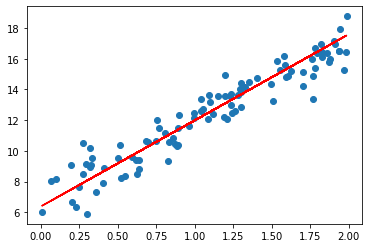

In [24]:
plt.plot(Xr,Yr,'o')
plt.plot(Xr,sortie, c ='r')
plt.show()

## 4. Multicouche sur mes données

In [25]:
My_NN = RNN(2,['relu','identite'])
My_NN.initialisation_parametre([2,2,1])
My_NN.parameters_W[0] = np.array([[2,3], [1,0]])
My_NN.parameters_b[0] = np.array([[1],[1]])
My_NN.parameters_W[1] = np.array([[3,4]])
My_NN.parameters_b[1] = np.array([[1]])
print(My_NN.parameters_W)
print(My_NN.parameters_b)

[array([[2, 3],
       [1, 0]]) array([[3, 4]])]
[array([[1],
       [1]]) array([[1]])]


In [26]:
n_base = 50
data1 = np.random.randn(n_base,2) 
data2 = np.random.randn(n_base,2)
data3 = np.random.randn(n_base,2) 
data = np.concatenate((data1,data2,data3))


# On mélange les données
np.random.shuffle(data)

#Vectecteur cible
n_base =150
Y = np.random.randn(n_base,2) 

print(Y)




[[-3.16712785e+00 -1.02626433e+00]
 [ 8.44594013e-02  8.99124922e-01]
 [-1.29010854e+00  6.68160125e-01]
 [ 7.86390251e-01 -7.69241476e-01]
 [ 1.10712968e+00  1.49576629e+00]
 [ 1.63064099e+00  1.69025409e+00]
 [ 1.78190003e+00  2.64034976e-03]
 [-2.43876451e+00 -1.60824048e-01]
 [ 2.00522686e+00 -4.40778694e-02]
 [-5.47027306e-01 -4.06715914e-01]
 [-4.41639008e-01  3.03862821e-01]
 [ 1.10568666e-02  6.17102057e-01]
 [ 1.26108085e+00  3.27041521e-01]
 [ 9.69508630e-01  5.21093730e-02]
 [-6.94889925e-01  1.25543044e+00]
 [ 9.34480217e-01 -7.95891675e-01]
 [-1.42248631e-01  3.57209152e-01]
 [ 1.34743785e+00  8.30906892e-01]
 [ 1.19557241e+00 -5.64936377e-02]
 [ 6.81779744e-01  2.21730303e+00]
 [-5.69506729e-01  6.29332170e-01]
 [ 3.96615233e-01  1.42094196e+00]
 [ 3.54137320e-01  1.56051824e+00]
 [ 1.37720713e+00  1.14951998e+00]
 [-1.63561783e+00 -3.65611915e-01]
 [-8.78675375e-01  3.80241517e-01]
 [ 7.72859670e-02 -5.28423277e-01]
 [ 4.20553568e-01 -2.38132954e+00]
 [ 3.43010859e-01  3

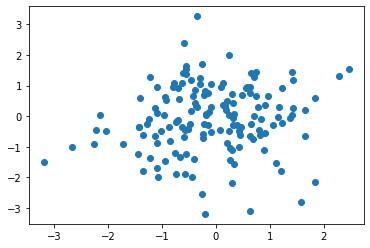

In [27]:
# visualisation (optionnelle) des données générées
plt.plot(data[:,0],data[:,1],'o')
#plt.plot(Y[:,0],Y[:,1],'o', color='red')
plt.show()

In [28]:
biais =[]
poids =[]

for i in range(len(data)):
    print(data[i])
    My_NN.a0 = data[i]
    My_NN.cible = Y[i]
    W, b,couts = gradient_stochastique(My_NN,0.001,10)
    poids.append(W)
    biais.append(b)



[-0.5925613   2.40313247]
[[50.16992382  3.85207093]]
sortie : [[50.16992382  3.85207093]]
 les préactivation : [array([[7.02427483, 0.4074387 ],
       [7.02427483, 0.4074387 ]])
 array([[50.16992382,  3.85207093]])]
 les activations :[array([-0.5925613 ,  2.40313247])
 array([[7.02427483, 0.4074387 ],
       [7.02427483, 0.4074387 ]])
 array([[50.16992382,  3.85207093]])]
La sortie : [[50.16992382  3.85207093]]
2


--------------------Couche 2 ---------------------------
gz :[[106.67410334   9.75667053]]
 nabla_w :[[749.3082193   68.53353527]
 [ 43.46315851   3.97524521]]
 nabla_b : [[106.67410334   9.75667053]]


--------------------Couche 1 ---------------------------
gz[2] :[[320.02231003  29.2700116 ]
 [426.69641337  39.02668213]]
gz :[[320.02231003  29.2700116 ]
 [426.69641337  39.02668213]]
 nabla_w :[[-189.63283449   70.33971539]
 [-252.84377932   93.78628718]]
 nabla_b : [[320.02231003  29.2700116 ]
 [426.69641337  39.02668213]]
[[40.18100166  0.99691074]
 [45.12229842  0.999

 [45.92893994  3.97685614]]


--------------------Couche 1 ---------------------------
gz[2] :[[144.75472901   0.        ]
 [283.51909664   0.        ]]
gz :[[144.75472901   0.        ]
 [283.51909664   0.        ]]
 nabla_w :[[ -85.77604969    0.        ]
 [-168.00244309    0.        ]]
 nabla_b : [[144.75472901   0.        ]
 [283.51909664   0.        ]]
[[ 8.21834244  0.95819101]
 [17.83716533  0.95818688]]
sortie : [[ 8.21834244  0.95819101]
 [17.83716533  0.95818688]]
 les préactivation : [array([[ 3.47609658, -1.30250897],
       [ 1.80238128, -1.29118301]])
 array([[ 8.21834244,  0.95819101],
       [17.83716533,  0.95818688]])]
 les activations :[array([-0.5925613 ,  2.40313247])
 array([[3.47609658, 0.        ],
       [1.80238128, 0.        ]])
 array([[ 8.21834244,  0.95819101],
       [17.83716533,  0.95818688]])]
La sortie : [[ 8.21834244  0.95819101]
 [17.83716533  0.95818688]]
2


--------------------Couche 2 ---------------------------
gz :[[22.77094057  3.96891067]
 [4

 [0.24151504 0.57314368]]
 les préactivation : [array([[-8.07244405, -5.0846917 ],
       [-9.69855467, -6.09832287]])
 array([[0.45002117, 0.72986483],
       [0.24151504, 0.57314368]])]
 les activations :[array([-1.35182192, -0.60702005]) array([[0, 0],
       [0, 0]])
 array([[0.45002117, 0.72986483],
       [0.24151504, 0.57314368]])]
La sortie : [[0.45002117 0.72986483]
 [0.24151504 0.57314368]]
2


--------------------Couche 2 ---------------------------
gz :[[ 3.48025943  0.12340942]
 [ 3.06324717 -0.19003289]]
 nabla_w :[[ 0.  0.]
 [ 0. -0.]]
 nabla_b : [[ 3.48025943  0.12340942]
 [ 3.06324717 -0.19003289]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[ 0. -0.]
 [ 0. -0.]]
[[0.44654091 0.72974142]
 [0.2384518  0.57333371]]
sortie : [[0.44654091 0.72974142]
 [0.2384518  0.57333371]]
 les préactivation : [array([[-8.07244405, -5.0846917 ],
       [-9.69855467, -6.09

gz :[[-0.         41.89617312]
 [-0.         67.67014564]]
 nabla_w :[[ -0.         -18.61865437]
 [ -0.         -30.0726047 ]]
 nabla_b : [[-0.         41.89617312]
 [-0.         67.67014564]]
[[0.44103489 4.80531264]
 [0.2391018  8.89310761]]
sortie : [[0.44103489 4.80531264]
 [0.2391018  8.89310761]]
 les préactivation : [array([[-0.38254648,  2.54424448],
       [-2.0086571 ,  1.50483934]])
 array([[0.44103489, 4.80531264],
       [0.2391018 , 8.89310761]])]
 les activations :[array([ 0.79425268, -0.44439988]) array([[0, 2],
       [0, 1]])
 array([[0.44103489, 4.80531264],
       [0.2391018 , 8.89310761]])]
La sortie : [[0.44103489 4.80531264]
 [0.2391018  8.89310761]]
2


--------------------Couche 2 ---------------------------
gz :[[-1.33218957  6.61909269]
 [-1.73605575 14.79468264]]
 nabla_w :[[-0.          0.        ]
 [-3.4721115  14.79468264]]
 nabla_b : [[-1.33218957  6.61909269]
 [-1.73605575 14.79468264]]


--------------------Couche 1 ---------------------------
gz[2] :

 [-0. -0.]]
[[0.46699119 0.66143411]
 [0.27103202 0.42728937]]
sortie : [[0.46699119 0.66143411]
 [0.27103202 0.42728937]]
 les préactivation : [array([[-4.34901943, -1.60130206],
       [-5.97513005, -2.80369879]])
 array([[0.46699119, 0.66143411],
       [0.27103202, 0.42728937]])]
 les activations :[array([-0.22771489, -0.59141756]) array([[0, 0],
       [0, 0]])
 array([[0.46699119, 0.66143411],
       [0.27103202, 0.42728937]])]
La sortie : [[0.46699119 0.66143411]
 [0.27103202 0.42728937]]
2


--------------------Couche 2 ---------------------------
gz :[[-2.3272996  -2.05763995]
 [-2.71921795 -2.52592942]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-2.3272996  -2.05763995]
 [-2.71921795 -2.52592942]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]
 [-0. -0.]]
gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[[0.46931849 0.66349175]
 [0.27375124 0.4298153 ]]
sortie : [[0.46931849 0.66349175]
 [0.27375124 0.4

[[0.49626946 0.65478496]
 [0.30610746 0.42756706]]
sortie : [[0.49626946 0.65478496]
 [0.30610746 0.42756706]]
 les préactivation : [array([[-1.78520673,  0.7631372 ],
       [-3.41131734, -0.4096272 ]])
 array([[0.49626946, 0.65478496],
       [0.30610746, 0.42756706]])]
 les activations :[array([ 0.43088893, -0.48007509]) array([[0, 0],
       [0, 0]])
 array([[0.49626946, 0.65478496],
       [0.30610746, 0.42756706]])]
La sortie : [[0.49626946 0.65478496]
 [0.30610746 0.42756706]]
2


--------------------Couche 2 ---------------------------
gz :[[5.87006793 1.63121801]
 [5.48974394 1.17678223]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[5.87006793 1.63121801]
 [5.48974394 1.17678223]]


--------------------Couche 1 ---------------------------
gz[2] :[[0.         3.53578917]
 [0.         0.        ]]
gz :[[0.         3.53578917]
 [0.         0.        ]]
 nabla_w :[[ 0.         -1.69744429]
 [ 0.         -0.        ]]
 nabla_b : [[0.         3.53578917]
 [0.         0.        ]]
[[0.4

2


--------------------Couche 2 ---------------------------
gz :[[-3.07927782  1.34955174]
 [-3.44761231  0.9094418 ]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-3.07927782  1.34955174]
 [-3.44761231  0.9094418 ]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0.46866723 0.62934845]
 [0.28486832 0.40973359]]
sortie : [[0.46866723 0.62934845]
 [0.28486832 0.40973359]]
 les préactivation : [array([[ -9.50927006,  -2.94401297],
       [-11.13538068,  -4.08520866]])
 array([[0.46866723, 0.62934845],
       [0.28486832, 0.40973359]])]
 les activations :[array([-0.43892926, -1.98688037]) array([[0, 0],
       [0, 0]])
 array([[0.46866723, 0.62934845],
       [0.28486832, 0.40973359]])]
La sortie : [[0.46866723 0.62934845]
 [0.28486832 0.40973359]]
2


--------------------Couche 2 ---------------------------
gz :[[-3.07311927  1.34685264]
 [-3.44071709

gz[2] :[[ 0. -0.]
 [ 0.  0.]]
gz :[[ 0. -0.]
 [ 0.  0.]]
 nabla_w :[[-0.  0.]
 [-0. -0.]]
 nabla_b : [[ 0. -0.]
 [ 0.  0.]]
[[0.38643203 0.46729296]
 [0.11012058 0.14683584]]
sortie : [[0.38643203 0.46729296]
 [0.11012058 0.14683584]]
 les préactivation : [array([[-7.90055336, -4.40693842],
       [-9.78579498, -6.10661615]])
 array([[0.38643203, 0.46729296],
       [0.11012058, 0.14683584]])]
 les activations :[array([-1.09514957, -0.87240019]) array([[0, 0],
       [0, 0]])
 array([[0.38643203, 0.46729296],
       [0.11012058, 0.14683584]])]
La sortie : [[0.38643203 0.46729296]
 [0.11012058 0.14683584]]
2


--------------------Couche 2 ---------------------------
gz :[[ 1.65614208  0.32686028]
 [ 1.10351917 -0.31405396]]
 nabla_w :[[ 0.  0.]
 [ 0. -0.]]
 nabla_b : [[ 1.65614208  0.32686028]
 [ 1.10351917 -0.31405396]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0.  0.]]
gz :[[ 0. -0.]
 [ 0.  0.]]
 nabla_w :[[-0.  0.]
 [-0. -0.]]
 nabla_b : [[ 0. -0

       [3.30328775, 0.15850151]])]
La sortie : [[0.35428526 0.46823568]
 [3.30328775 0.15850151]]
2


--------------------Couche 2 ---------------------------
gz :[[-1.8135912   0.28238832]
 [ 4.0844138  -0.33708002]]
 nabla_w :[[-2.66444368  0.        ]
 [ 0.         -0.        ]]
 nabla_b : [[-1.8135912   0.28238832]
 [ 4.0844138  -0.33708002]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 8.99982906 -0.        ]
 [ 0.          0.        ]]
gz :[[ 8.99982906 -0.        ]
 [ 0.          0.        ]]
 nabla_w :[[-4.89670714 -0.        ]
 [-0.          0.        ]]
 nabla_b : [[ 8.99982906 -0.        ]
 [ 0.          0.        ]]
[[0.36025402 0.46795329]
 [3.27362273 0.15883859]]
sortie : [[0.36025402 0.46795329]
 [3.27362273 0.15883859]]
 les préactivation : [array([[ 1.45748933, -2.16285252],
       [-0.36179307, -3.88283936]])
 array([[0.36025402, 0.46795329],
       [3.27362273, 0.15883859]])]
 les activations :[array([-0.5440889 ,  1.65518885])
 array([[1.457

gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[ 0. -0.]
 [ 0. -0.]]
[[0.38956548 0.4715397 ]
 [0.07084608 0.17515142]]
sortie : [[0.38956548 0.4715397 ]
 [0.07084608 0.17515142]]
 les préactivation : [array([[-4.56997018, -4.11708296],
       [-6.36305597, -5.8370698 ]])
 array([[0.38956548, 0.4715397 ],
       [0.07084608, 0.17515142]])]
 les activations :[array([-1.12914279,  0.26412778]) array([[0, 0],
       [0, 0]])
 array([[0.38956548, 0.4715397 ],
       [0.07084608, 0.17515142]])]
La sortie : [[0.38956548 0.4715397 ]
 [0.07084608 0.17515142]]
2


--------------------Couche 2 ---------------------------
gz :[[ 2.16891082 -1.56778148]
 [ 1.53147202 -2.16055805]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[ 2.16891082 -1.56778148]
 [ 1.53147202 -2.16055805]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[ 0. -0

 [0.         0.        ]]
gz :[[0.         8.56318936]
 [0.         0.        ]]
 nabla_w :[[  0.         -15.35601959]
 [  0.          -0.        ]]
 nabla_b : [[0.         8.56318936]
 [0.         0.        ]]
[0.74296813 0.66874081]
[[1.26062226 0.43792452]
 [5.08468344 1.81945916]]
sortie : [[1.26062226 0.43792452]
 [5.08468344 1.81945916]]
 les préactivation : [array([[ 2.03935274,  0.77622261],
       [ 0.24626695, -0.85718644]])
 array([[1.26062226, 0.43792452],
       [5.08468344, 1.81945916]])]
 les activations :[array([0.74296813, 0.66874081])
 array([[2.03935274, 0.77622261],
       [0.24626695, 0.        ]])
 array([[1.26062226, 0.43792452],
       [5.08468344, 1.81945916]])]
La sortie : [[1.26062226 0.43792452]
 [5.08468344 1.81945916]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.17363117 -0.78596474]
 [ 7.47449117  1.97710453]]
 nabla_w :[[-0.3540952  -0.19355714]
 [ 5.80186903  0.        ]]
 nabla_b : [[-0.17363117 -0.78596474]
 [ 7.47449117  1.

       [5.71437904, 0.91852027]])]
La sortie : [[1.91528645 0.43616162]
 [5.71437904 0.91852027]]
2


--------------------Couche 2 ---------------------------
gz :[[1.43942809 0.98531052]
 [9.03761326 1.95002781]]
 nabla_w :[[3.26221067 0.43487769]
 [3.54186402 0.        ]]
 nabla_b : [[1.43942809 0.98531052]
 [9.03761326 1.95002781]]


--------------------Couche 1 ---------------------------
gz[2] :[[19.05456327  4.08827056]
 [25.11469666  0.        ]]
gz :[[19.05456327  4.08827056]
 [25.11469666  0.        ]]
 nabla_w :[[12.07840809  3.94240964]
 [15.91983774  0.        ]]
 nabla_b : [[19.05456327  4.08827056]
 [25.11469666  0.        ]]
[[1.77364313 0.43442944]
 [5.55259908 0.88525932]]
sortie : [[1.77364313 0.43442944]
 [5.55259908 0.88525932]]
 les préactivation : [array([[ 2.23581153,  0.37772296],
       [ 0.40478828, -1.1860318 ]])
 array([[1.77364313, 0.43442944],
       [5.55259908, 0.88525932]])]
 les activations :[array([0.63388533, 0.9643221 ])
 array([[2.23581153, 0.37772

[[0.34693764 0.47380163]
 [1.68432039 0.11660965]]
sortie : [[0.34693764 0.47380163]
 [1.68432039 0.11660965]]
 les préactivation : [array([[ 0.84776069, -0.07082142],
       [-0.95948181, -1.62317343]])
 array([[0.34693764, 0.47380163],
       [1.68432039, 0.11660965]])]
 les activations :[array([0.4954821 , 0.68383723])
 array([[0.84776069, 0.        ],
       [0.        , 0.        ]])
 array([[0.34693764, 0.47380163],
       [1.68432039, 0.11660965]])]
La sortie : [[0.34693764 0.47380163]
 [1.68432039 0.11660965]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.66968421 -3.48700281]
 [ 2.0050813  -4.20138677]]
 nabla_w :[[-0.56773195 -0.        ]
 [ 0.         -0.        ]]
 nabla_b : [[-0.66968421 -3.48700281]
 [ 2.0050813  -4.20138677]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 4.23871003 -0.        ]
 [ 0.         -0.        ]]
gz :[[ 4.23871003 -0.        ]
 [ 0.         -0.        ]]
 nabla_w :[[ 2.10020495 -0.        ]
 [ 0.   

gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[[0.36230259 0.48707383]
 [0.         0.0548557 ]]
sortie : [[0.36230259 0.48707383]
 [0.         0.0548557 ]]
 les préactivation : [array([[-2.23693456, -3.75019898],
       [-4.03575516, -5.29385874]])
 array([[ 0.36230259,  0.48707383],
       [-0.11145781,  0.0548557 ]])]
 les activations :[array([-1.09274824,  0.95392416]) array([[0, 0],
       [0, 0]])
 array([[0.36230259, 0.48707383],
       [0.        , 0.0548557 ]])]
La sortie : [[0.36230259 0.48707383]
 [0.         0.0548557 ]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.06862529 -1.86773627]
 [-0.79323047 -2.73217251]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-0.06862529 -1.86773627]
 [-0.79323047 -2.73217251]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]
 [-0. -0.]]
gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[[0.3623712

[[0.36279314 0.51845589]
 [0.         0.09986321]]
sortie : [[0.36279314 0.51845589]
 [0.         0.09986321]]
 les préactivation : [array([[-2.70353465, -0.93748017],
       [-4.50235525, -2.48113993]])
 array([[ 0.36279314,  0.51845589],
       [-0.09936081,  0.09986321]])]
 les activations :[array([ 0.33006681, -0.27651637]) array([[0, 0],
       [0, 0]])
 array([[0.36279314, 0.51845589],
       [0.        , 0.09986321]])]
La sortie : [[0.36279314 0.51845589]
 [0.         0.09986321]]
2


--------------------Couche 2 ---------------------------
gz :[[ 0.01731164 -2.08412471]
 [-0.70827464 -2.92131007]]
 nabla_w :[[ 0. -0.]
 [-0. -0.]]
 nabla_b : [[ 0.01731164 -2.08412471]
 [-0.70827464 -2.92131007]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]
 [-0. -0.]]
gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[[0.36277583 0.52054001]
 [0.         0.10278452]]
sortie : [[0.36277583 0.52054001]
 [0.         0.10278

       [0.        , 0.12726403]])]
La sortie : [[0.3747832  0.53347322]
 [0.         0.12726403]]
2


--------------------Couche 2 ---------------------------
gz :[[4.02080206 1.79817027]
 [3.27123567 0.98575188]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[4.02080206 1.79817027]
 [3.27123567 0.98575188]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0.3707624  0.53167505]
 [0.         0.12627827]]
sortie : [[0.3707624  0.53167505]
 [0.         0.12627827]]
 les préactivation : [array([[-2.90694121, -3.51338246],
       [-4.7057618 , -5.05704222]])
 array([[ 0.3707624 ,  0.53167505],
       [-0.07950555,  0.12627827]])]
 les activations :[array([-0.93437951,  0.63083469]) array([[0, 0],
       [0, 0]])
 array([[0.3707624 , 0.53167505],
       [0.        , 0.12627827]])]
La sortie : [[0.3707624  0.53167505]
 [0.         0.12627827]]
2


--------------------Couche 

       [0.        , 0.12199298]])]
La sortie : [[0.31766502 0.51225885]
 [0.         0.12199298]]
2


--------------------Couche 2 ---------------------------
gz :[[ 0.4807581   2.08136425]
 [-0.15457193  1.30083251]]
 nabla_w :[[ 0.  0.]
 [-0.  0.]]
 nabla_b : [[ 0.4807581   2.08136425]
 [-0.15457193  1.30083251]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [ 0.  0.]]
gz :[[-0.  0.]
 [ 0.  0.]]
 nabla_w :[[ 0. -0.]
 [-0. -0.]]
 nabla_b : [[-0.  0.]
 [ 0.  0.]]
[[0.31718426 0.51017748]
 [0.         0.12069214]]
sortie : [[0.31718426 0.51017748]
 [0.         0.12069214]]
 les préactivation : [array([[ -9.76522887,  -6.97008579],
       [-11.56404947,  -8.51374556]])
 array([[ 0.31718426,  0.51017748],
       [-0.119514  ,  0.12069214]])]
 les activations :[array([-2.22842971, -0.44326741]) array([[0, 0],
       [0, 0]])
 array([[0.31718426, 0.51017748],
       [0.        , 0.12069214]])]
La sortie : [[0.31718426 0.51017748]
 [0.         0.12069214]]
2



[[0.31596082 0.43869807]
 [0.         0.06224546]]
sortie : [[0.31596082 0.43869807]
 [0.         0.06224546]]
 les préactivation : [array([[ -8.24956773,  -3.09818694],
       [-10.04838832,  -4.64184671]])
 array([[ 0.31596082,  0.43869807],
       [-0.11002092,  0.06224546]])]
 les activations :[array([-0.40180953, -1.386074  ]) array([[0, 0],
       [0, 0]])
 array([[0.31596082, 0.43869807],
       [0.        , 0.06224546]])]
La sortie : [[0.31596082 0.43869807]
 [0.         0.06224546]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.05410008  0.81181254]
 [-0.68602172  0.05890731]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.05410008  0.81181254]
 [-0.68602172  0.05890731]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0.31601492 0.43788626]
 [0.         0.06218655]]
sortie : [[0.31601492 0.43788626]
 [0.         0.0

 [0.         0.10009466]]
sortie : [[0.31471226 0.46322293]
 [0.         0.10009466]]
 les préactivation : [array([[-5.12418639, -3.39846919],
       [-6.92300699, -4.94212896]])
 array([[ 0.31471226,  0.46322293],
       [-0.099894  ,  0.10009466]])]
 les activations :[array([-0.74180951, -0.18440805]) array([[0, 0],
       [0, 0]])
 array([[0.31471226, 0.46322293],
       [0.        , 0.10009466]])]
La sortie : [[0.31471226 0.46322293]
 [0.         0.10009466]]
2


--------------------Couche 2 ---------------------------
gz :[[ 0.22108619 -4.03473296]
 [-0.40833834 -4.7609895 ]]
 nabla_w :[[ 0. -0.]
 [-0. -0.]]
 nabla_b : [[ 0.22108619 -4.03473296]
 [-0.40833834 -4.7609895 ]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]
 [-0. -0.]]
gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[[0.31449117 0.46725767]
 [0.         0.10485565]]
sortie : [[0.31449117 0.46725767]
 [0.         0.10485565]]
 les préactivation : [a

 [ 3.68239855  9.27083305]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 7.79140587 18.21379511]
 [ 0.         24.90955426]]
gz :[[ 7.79140587 18.21379511]
 [ 0.         24.90955426]]
 nabla_w :[[12.9492072   3.91390461]
 [ 0.          5.35273504]]
 nabla_b : [[ 7.79140587 18.21379511]
 [ 0.         24.90955426]]
[[0 0]
 [2 4]]
sortie : [[0 0]
 [2 4]]
 les préactivation : [array([[ 1.43292644,  1.82723935],
       [-0.95269795,  0.25700936]])
 array([[-0.80079609,  0.16266012],
       [ 2.5391805 ,  4.383742  ]])]
 les activations :[array([1.66198597, 0.21488683])
 array([[1.43292644, 1.82723935],
       [0.        , 0.25700936]])
 array([[0, 0],
       [2, 4]])]
La sortie : [[0 0]
 [2 4]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.31760145  1.27083305]
 [ 3.68239855  9.27083305]]
 nabla_w :[[-0.45509951  0.        ]
 [ 6.72862354  2.38269089]]
 nabla_b : [[-0.31760145  1.27083305]
 [ 3.68239855  9.27083305]]


--------------------Couc

La sortie : [[0.16313575 0.41153973]
 [0.         0.        ]]
2


--------------------Couche 2 ---------------------------
gz :[[0.93579325 5.28368058]
 [0.60952175 4.46060111]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[0.93579325 5.28368058]
 [0.60952175 4.46060111]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0.16219996 0.40625605]
 [0.         0.        ]]
sortie : [[0.16219996 0.40625605]
 [0.         0.        ]]
 les préactivation : [array([[-1.78612248, -2.86709117],
       [-4.1255181 , -4.47773563]])
 array([[ 0.16219996,  0.40625605],
       [-0.42683201, -0.016611  ]])]
 les activations :[array([-0.698626 ,  0.9310181]) array([[0, 0],
       [0, 0]])
 array([[0.16219996, 0.40625605],
       [0.        , 0.        ]])]
La sortie : [[0.16219996 0.40625605]
 [0.         0.        ]]
2


--------------------Couche 2 ---------------------------
gz :[[0

 [8.04335947 0.54184349]]
 les préactivation : [array([[ 3.5772213 ,  0.33968407],
       [ 0.98509959, -1.2148081 ]])
 array([[0.55441809, 0.07272961],
       [8.04335947, 0.54184349]])]
 les activations :[array([1.41473948, 1.45200218])
 array([[3.5772213 , 0.33968407],
       [0.98509959, 0.        ]])
 array([[0.55441809, 0.07272961],
       [8.04335947, 0.54184349]])]
La sortie : [[0.55441809 0.07272961]
 [8.04335947 0.54184349]]
2


--------------------Couche 2 ---------------------------
gz :[[ 0.36717704  2.70865413]
 [15.3450598   3.64688189]]
 nabla_w :[[1.31347352 2.66829407]
 [5.21247242 0.        ]]
 nabla_b : [[ 0.36717704  2.70865413]
 [15.3450598   3.64688189]]


--------------------Couche 1 ---------------------------
gz[2] :[[27.58966967  4.26547526]
 [34.68162606  0.        ]]
gz :[[27.58966967  4.26547526]
 [34.68162606  0.        ]]
 nabla_w :[[39.03219493  6.19347938]
 [49.06546564  0.        ]]
 nabla_b : [[27.58966967  4.26547526]
 [34.68162606  0.        ]]
[-0

 [0.42280595 1.1738874 ]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0.13605949 0.31818697]
 [0.         0.        ]]
sortie : [[0.13605949 0.31818697]
 [0.         0.        ]]
 les préactivation : [array([[-3.91283975, -1.41210651],
       [-6.51205341, -2.96233321]])
 array([[ 0.13605949,  0.31818697],
       [-0.60536592, -0.11546757]])]
 les activations :[array([ 0.47555536, -0.3654483 ]) array([[0, 0],
       [0, 0]])
 array([[0.13605949, 0.31818697],
       [0.        , 0.        ]])]
La sortie : [[0.13605949 0.31818697]
 [0.         0.        ]]
2


--------------------Couche 2 ---------------------------
gz :[[0.69492493 1.81026134]
 [0.42280595 1.1738874 ]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[0.69492493 1.81026134]
 [0.42280595 1.1738874 ]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 

 [-1.07758577  4.40033557]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0.14849284 0.28767588]
 [0.         0.        ]]
sortie : [[0.14849284 0.28767588]
 [0.         0.        ]]
 les préactivation : [array([[-5.17638556, -3.10435342],
       [-7.77559923, -4.65458011]])
 array([[ 0.14849284,  0.28767588],
       [-0.58812821, -0.13534023]])]
 les activations :[array([-1.09061992,  0.11651789]) array([[0, 0],
       [0, 0]])
 array([[0.14849284, 0.28767588],
       [0.        , 0.        ]])]
La sortie : [[0.14849284 0.28767588]
 [0.         0.        ]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.78060008  4.97568733]
 [-1.07758577  4.40033557]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.78060008  4.97568733]
 [-1.07758577  4.40033557]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0

 [ 0.15154724 -0.22694865]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]
 [ 0.  0.]]
gz :[[-0. -0.]
 [ 0.  0.]]
 nabla_w :[[ 0. -0.]
 [-0.  0.]]
 nabla_b : [[-0. -0.]
 [ 0.  0.]]
[[0.13285348 0.28814629]
 [0.         0.        ]]
sortie : [[0.13285348 0.28814629]
 [0.         0.        ]]
 les préactivation : [array([[-2.7613208 , -1.85182462],
       [-5.36053447, -3.40205132]])
 array([[ 0.13285348,  0.28814629],
       [-0.59807292, -0.12359631]])]
 les activations :[array([-0.07923909,  0.31254021]) array([[0, 0],
       [0, 0]])
 array([[0.13285348, 0.28814629],
       [0.        , 0.        ]])]
La sortie : [[0.13285348 0.28814629]
 [0.         0.        ]]
2


--------------------Couche 2 ---------------------------
gz :[[ 0.4172542   0.34934394]
 [ 0.15154724 -0.22694865]]
 nabla_w :[[ 0.  0.]
 [ 0. -0.]]
 nabla_b : [[ 0.4172542   0.34934394]
 [ 0.15154724 -0.22694865]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]


 [0.         0.        ]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.44978694  3.21546579]
 [-0.68944149  2.6828523 ]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.44978694  3.21546579]
 [-0.68944149  2.6828523 ]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0.12027706 0.26309128]
 [0.         0.        ]]
sortie : [[0.12027706 0.26309128]
 [0.         0.        ]]
 les préactivation : [array([[-5.43128311, -2.74699363],
       [-7.90825321, -4.29722032]])
 array([[ 0.12027706,  0.26309128],
       [-0.66769962, -0.14190828]])]
 les activations :[array([-0.71344824, -0.158881  ]) array([[0, 0],
       [0, 0]])
 array([[0.12027706, 0.26309128],
       [0.        , 0.        ]])]
La sortie : [[0.12027706 0.26309128]
 [0.         0.        ]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.44888737 

 [-0.66550945 -1.24739628]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]
 [-0. -0.]]
gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[[0.10844704 0.27961605]
 [0.         0.        ]]
sortie : [[0.10844704 0.27961605]
 [0.         0.        ]]
 les préactivation : [array([[-3.88091658, -2.06196955],
       [-6.35788668, -3.61219625]])
 array([[ 0.10844704,  0.27961605],
       [-0.67486458, -0.1140826 ]])]
 les activations :[array([-0.18804825,  0.0520349 ]) array([[0, 0],
       [0, 0]])
 array([[0.10844704, 0.27961605],
       [0.        , 0.        ]])]
La sortie : [[0.10844704 0.27961605]
 [0.         0.        ]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.44861537 -0.68816418]
 [-0.66550945 -1.24739628]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-0.44861537 -0.68816418]
 [-0.66550945 -1.24739628]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]


 [0.         0.        ]]
sortie : [[0.10367506 0.25219043]
 [0.         0.        ]]
 les préactivation : [array([[-1.74183429, -2.88210138],
       [-4.2188044 , -4.43232808]])
 array([[ 0.10367506,  0.25219043],
       [-0.67559573, -0.1307789 ]])]
 les activations :[array([-1.21257536,  1.27829567]) array([[0, 0],
       [0, 0]])
 array([[0.10367506, 0.25219043],
       [0.        , 0.        ]])]
La sortie : [[0.10367506 0.25219043]
 [0.         0.        ]]
2


--------------------Couche 2 ---------------------------
gz :[[-1.00109289  1.61202321]
 [-1.20844302  1.10764235]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-1.00109289  1.61202321]
 [-1.20844302  1.10764235]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[1.17379039 0.31483444]
[[0.10467616 0.2505784 ]
 [0.         0.        ]]
sortie : [[0.10467616 0.2505784 ]
 [0.         0.        ]]

       [0.       , 0.       ]])]
La sortie : [[0.1257373 0.2461938]
 [0.        0.       ]]
2


--------------------Couche 2 ---------------------------
gz :[[-1.17065351  1.86672492]
 [-1.4221281   1.37433731]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-1.17065351  1.86672492]
 [-1.4221281   1.37433731]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[0.651704   1.40959339]
[[0 0]
 [2 0]]
sortie : [[0 0]
 [2 0]]
 les préactivation : [array([[ 1.81397092, -0.64575005],
       [-0.66299919, -2.19597675]])
 array([[-1.51943558,  0.24432708],
       [ 2.64235825, -0.1279195 ]])]
 les activations :[array([0.651704  , 1.40959339])
 array([[1.81397092, 0.        ],
       [0.        , 0.        ]])
 array([[0, 0],
       [2, 0]])]
La sortie : [[0 0]
 [2 0]]
2


--------------------Couche 2 ---------------------------
gz :[[ 1.40310659 -0.89655944]
 [ 5.40310

       [0.        , 0.        ]])]
La sortie : [[0.11431831 0.22876767]
 [0.         0.        ]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.17856104  3.0380994 ]
 [-0.40719767  2.58056407]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.17856104  3.0380994 ]
 [-0.40719767  2.58056407]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0.11449687 0.22572957]
 [0.         0.        ]]
sortie : [[0.11449687 0.22572957]
 [0.         0.        ]]
 les préactivation : [array([[-6.67813784, -3.43861565],
       [-9.07000653, -4.98884235]])
 array([[ 0.11449687,  0.22572957],
       [-0.69792553, -0.14217898]])]
 les activations :[array([-1.27684695, -0.24867294]) array([[0, 0],
       [0, 0]])
 array([[0.11449687, 0.22572957],
       [0.        , 0.        ]])]
La sortie : [[0.11449687 0.22572957]
 [0.         0.        ]]
2


---

 [ 2.71364874 -5.11611682]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[ 0. -0.]
 [ 0. -0.]]
[[0.08245225 0.29857618]
 [0.         0.        ]]
sortie : [[0.08245225 0.29857618]
 [0.         0.        ]]
 les préactivation : [array([[-3.29748294, -1.5475396 ],
       [-5.68935164, -3.09776629]])
 array([[ 0.08245225,  0.29857618],
       [-0.72600094, -0.0596214 ]])]
 les activations :[array([0.25418873, 0.03215346]) array([[0, 0],
       [0, 0]])
 array([[0.08245225, 0.29857618],
       [0.        , 0.        ]])]
La sortie : [[0.08245225 0.29857618]
 [0.         0.        ]]
2


--------------------Couche 2 ---------------------------
gz :[[ 2.87855324 -4.51896447]
 [ 2.71364874 -5.11611682]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[ 2.87855324 -4.51896447]
 [ 2.71364874 -5.11611682]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [

 [ 1.75073495 -0.44648832]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[ 0. -0.]
 [ 0. -0.]]
[[0.03691881 0.31313768]
 [0.         0.        ]]
sortie : [[0.03691881 0.31313768]
 [0.         0.        ]]
 les préactivation : [array([[ -9.4773034 ,  -4.16636818],
       [-11.86917209,  -5.71659488]])
 array([[ 0.03691881,  0.31313768],
       [-0.76917967, -0.03261812]])]
 les activations :[array([-1.71854377, -0.90824303]) array([[0, 0],
       [0, 0]])
 array([[0.03691881, 0.31313768],
       [0.        , 0.        ]])]
La sortie : [[0.03691881 0.31313768]
 [0.         0.        ]]
2


--------------------Couche 2 ---------------------------
gz :[[ 1.82457257  0.17978705]
 [ 1.75073495 -0.44648832]]
 nabla_w :[[ 0.  0.]
 [ 0. -0.]]
 nabla_b : [[ 1.82457257  0.17978705]
 [ 1.75073495 -0.44648832]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -

gz[2] :[[ 0. -0.]
 [ 0.  0.]]
gz :[[ 0. -0.]
 [ 0.  0.]]
 nabla_w :[[-0.  0.]
 [-0. -0.]]
 nabla_b : [[ 0. -0.]
 [ 0.  0.]]
[[0.01570946 0.30506899]
 [0.         0.        ]]
sortie : [[0.01570946 0.30506899]
 [0.         0.        ]]
 les préactivation : [array([[ -9.0787935 ,  -3.05817456],
       [-11.47066219,  -4.60840126]])
 array([[ 0.01570946,  0.30506899],
       [-0.78934975, -0.02954754]])]
 les activations :[array([-0.66552683, -1.32625138]) array([[0, 0],
       [0, 0]])
 array([[0.01570946, 0.30506899],
       [0.        , 0.        ]])]
La sortie : [[0.01570946 0.30506899]
 [0.         0.        ]]
2


--------------------Couche 2 ---------------------------
gz :[[ 2.06513624  0.41658813]
 [ 2.03371731 -0.19354986]]
 nabla_w :[[ 0.  0.]
 [ 0. -0.]]
 nabla_b : [[ 2.06513624  0.41658813]
 [ 2.03371731 -0.19354986]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0.  0.]]
gz :[[ 0. -0.]
 [ 0.  0.]]
 nabla_w :[[-0.  0.]
 [-0. -0.]]
 nabla_b : 

--------------------Couche 1 ---------------------------
gz[2] :[[ 4.24263849 -0.19452599]
 [ 0.         -0.        ]]
gz :[[ 4.24263849 -0.19452599]
 [ 0.         -0.        ]]
 nabla_w :[[ 7.80016889 -0.11637066]
 [ 0.         -0.        ]]
 nabla_b : [[ 4.24263849 -0.19452599]
 [ 0.         -0.        ]]
[[0 0]
 [1 0]]
sortie : [[0 0]
 [1 0]]
 les préactivation : [array([[ 1.03221569,  0.49649834],
       [-1.35116357, -1.05411787]])
 array([[-0.98583665, -0.14647911],
       [ 1.03839617,  0.88592437]])]
 les activations :[array([1.83851839, 0.59822678])
 array([[1.03221569, 0.49649834],
       [0.        , 0.        ]])
 array([[0, 0],
       [1, 0]])]
La sortie : [[0 0]
 [1 0]]
2


--------------------Couche 2 ---------------------------
gz :[[ 0.70285476 -0.2212318 ]
 [ 2.70285476 -0.2212318 ]]
 nabla_w :[[ 0.72549771 -0.        ]
 [ 1.3419629  -0.        ]]
 nabla_b : [[ 0.70285476 -0.2212318 ]
 [ 2.70285476 -0.2212318 ]]


--------------------Couche 1 -------------------------

       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-1.83708586 -0.61029655]
 [-1.83708586 -0.61029655]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-1.83708586 -0.61029655]
 [-1.83708586 -0.61029655]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]
 [-0. -0.]]
gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-2.45046655, -2.14599792],
       [-4.82170209, -3.69815725]])
 array([[-0.02697907,  0.33222827],
       [-0.83990941,  0.00187317]])]
 les activations :[array([-0.4213402 ,  0.65132991]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-1.83708586 -0.61029655]
 [-1.83708586 -0.61029655]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-1.83708586 -0.61029655]
 [-1.83708586 

 [-0.  0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-4.4312796 , -1.08733942],
       [-6.80251514, -2.63949876]])
 array([[-0.02350699,  0.33989579],
       [-0.83643733,  0.00954069]])]
 les activations :[array([ 0.81235595, -0.59953976]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.47902831  1.16722969]
 [-0.47902831  1.16722969]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.47902831  1.16722969]
 [-0.47902831  1.16722969]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-4.4312796 , -1.08733942],
       [-6.80251514, -2.63949876]])
 array([[-0.02302797,  0.33872856],
       [-0.83595831,  0.00837346]])]
 les activations :[array([ 0.812

 [ 2.43131251 -1.45021612]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 2.10750177 -0.        ]
 [ 0.         -0.        ]]
gz :[[ 2.10750177 -0.        ]
 [ 0.         -0.        ]]
 nabla_w :[[ 1.2061317 -0.       ]
 [ 0.        -0.       ]]
 nabla_b : [[ 2.10750177 -0.        ]
 [ 0.         -0.        ]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[ 0.06010614, -0.88305897],
       [-2.3090219 , -2.4352183 ]])
 array([[-0.09526511,  0.33824616],
       [-0.74316093,  0.00789105]])]
 les activations :[array([0.57230401, 0.94672788])
 array([[0.06010614, 0.        ],
       [0.        , 0.        ]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[ 2.43131251 -1.45021612]
 [ 2.43131251 -1.45021612]]
 nabla_w :[[ 0.14613682 -0.        ]
 [ 0.         -0.        ]]
 nabla_b : [[ 2.43131251 -1.45021612]
 [ 2.43131251 -1.45021612]]


--------------------Couche 1

       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.51991957  0.30958185]
 [-0.51991957  0.30958185]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.51991957  0.30958185]
 [-0.51991957  0.30958185]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-1.94915179, -1.34316665],
       [-4.29932707, -2.89532598]])
 array([[-0.0565162 ,  0.34882145],
       [-0.86944655,  0.01846634]])]
 les activations :[array([0.31536336, 0.44629648]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.51991957  0.30958185]
 [-0.51991957  0.30958185]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.51991957  0.30958185]
 [-0.51991957  0

 [-0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-5.26299724, -2.97337375],
       [-7.61317251, -4.52553308]])
 array([[-4.78522517e-02,  3.30823279e-01],
       [-8.60782592e-01,  4.68174206e-04]])]
 les activations :[array([-0.95890948,  0.03385939]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-2.27872065 -0.74882502]
 [-2.27872065 -0.74882502]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-2.27872065 -0.74882502]
 [-2.27872065 -0.74882502]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]
 [-0. -0.]]
gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-5.26299724, -2.97337375],
       [-7.61317251, -4.52553308]])
 array([[-0.04557353,  0.3315721 ],
       [-0.85850387,  0.001217  ]])]
 les activations

       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[0.75277278 1.7952407 ]
 [0.75277278 1.7952407 ]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[0.75277278 1.7952407 ]
 [0.75277278 1.7952407 ]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-5.04888922, -1.51807863],
       [-7.39966671, -3.07023797]])
 array([[-0.0425583 ,  0.32942414],
       [-0.85548864, -0.00093097]])]
 les activations :[array([ 0.44742188, -0.60292245]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[0.75277278 1.7952407 ]
 [0.75277278 1.7952407 ]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[0.75277278 1.7952407 ]
 [0.75277278 1.7952407 ]]


--------------------

 [ 0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[ -9.98667593,  -3.92856636],
       [-12.33745342,  -5.4807257 ]])
 array([[-0.03655558,  0.36654923],
       [-0.84948592,  0.03619413]])]
 les activations :[array([-1.4330052 , -1.22683552]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[ 0.70364703 -3.15883602]
 [ 0.70364703 -3.15883602]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[ 0.70364703 -3.15883602]
 [ 0.70364703 -3.15883602]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[ 0. -0.]
 [ 0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[ -9.98667593,  -3.92856636],
       [-12.33745342,  -5.4807257 ]])
 array([[-0.03725922,  0.36970807],
       [-0.85018957,  0.03935296]])]
 les activations :[array

 [-1.90673778  3.45933162]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-1.86092555, -0.24874628],
       [-4.21170304, -1.80090562]])
 array([[-0.01450559,  0.34756749],
       [-0.82743593,  0.01721238]])]
 les activations :[array([ 1.38007112, -0.0591623 ]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-1.90673778  3.45933162]
 [-1.90673778  3.45933162]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-1.90673778  3.45933162]
 [-1.90673778  3.45933162]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]

[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[ -8.23009415,  -1.94681533],
       [-10.58087164,  -3.49897467]])
 array([[-0.00711219,  0.36875904],
       [-0.82004253,  0.03840393]])]
 les activations :[array([ 0.33848332, -1.55710872]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-2.99299465 -0.56157342]
 [-2.99299465 -0.56157342]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-2.99299465 -0.56157342]
 [-2.99299465 -0.56157342]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]
 [-0. -0.]]
gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[-1.23077213 -0.0765149 ]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-6.03957727, -3.32822205],
       [-8.39035476, -4.88038139]])
 array([[-0.00411919,  0.36932061],
       [-0.81704953,  0.03896551]])]
 les activatio

       [0.        , 0.04274541]])]
La sortie : [[0.00496854 0.36525862]
 [0.         0.04274541]]
2


--------------------Couche 2 ---------------------------
gz :[[ 0.16128034 -0.86752929]
 [ 0.15134325 -1.51255573]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[ 0.16128034 -0.86752929]
 [ 0.15134325 -1.51255573]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[ 0. -0.]
 [ 0. -0.]]
[[0.00480726 0.36612615]
 [0.         0.04425796]]
sortie : [[0.00480726 0.36612615]
 [0.         0.04425796]]
 les préactivation : [array([[-0.78179016, -0.09073189],
       [-3.13256766, -1.64289122]])
 array([[ 0.00480726,  0.36612615],
       [-0.80800397,  0.04425796]])]
 les activations :[array([1.42936015, 0.25834086]) array([[0, 0],
       [0, 0]])
 array([[0.00480726, 0.36612615],
       [0.        , 0.04425796]])]
La sortie : [[0.00480726 0.36612615]
 [0.         0.04425796]]
2


-----

gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-10.06286936,  -3.71807966],
       [-12.41364686,  -5.27023899]])
 array([[-0.00912443,  0.37861804],
       [-0.82188134,  0.06249735]])]
 les activations :[array([-1.21911945, -1.35812447]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[1.18705615 1.57262702]
 [1.18705615 1.57262702]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[1.18705615 1.57262702]
 [1.18705615 1.57262702]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-10.06286936,  -3.71807966],
       [-12.41364686,  -5.27023899]])
 array([[-0.01031148,

 [3.4565916  2.86628394]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-2.49983527, -1.54882476],
       [-4.85061276, -3.1009841 ]])
 array([[-0.05609191,  0.42382896],
       [-0.86884883,  0.10770826]])]
 les activations :[array([0.16764966, 0.34550305]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[3.4565916  2.86628394]
 [3.4565916  2.86628394]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[3.4565916  2.86628394]
 [3.4565916  2.86628394]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-2.49983527, -1.5

[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-11.23878625,  -5.31800803],
       [-13.58956374,  -6.87016736]])
 array([[-0.05905836,  0.41807079],
       [-0.87181528,  0.10195009]])]
 les activations :[array([-2.6730167 , -1.00279519]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.58929209 -0.86148586]
 [-0.58929209 -0.86148586]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-0.58929209 -0.86148586]
 [-0.58929209 -0.86148586]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]
 [-0. -0.]]
gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-11.23878625,  -5.31800803],
       [-13.58956374,  -6.87016736]])
 array([[-0.05846907,  0.41893227],
       [-0.87122598,  0.10281158]])]
 les activations :[array([-2.6730167 , -

[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[ -9.9969932 ,  -3.43343275],
       [-12.34777069,  -4.98559209]])
 array([[-0.0527582 ,  0.39098728],
       [-0.86551512,  0.07486658]])]
 les activations :[array([-0.94641712, -1.47382288]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[ 3.11026157 -1.14619406]
 [ 3.11026157 -1.14619406]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[ 3.11026157 -1.14619406]
 [ 3.11026157 -1.14619406]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[ 0. -0.]
 [ 0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[ -9.9969932 ,  -3.43343275],
       [-12.34777069,  -4.98559209]])
 array([[-0.05586847,  0.39213348],
       [-0.86862538,  0.07601278]])]
 les activations :[array([-0.9464171

       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[ 0.20606893 -0.24233986]
 [ 0.20606893 -0.24233986]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[ 0.20606893 -0.24233986]
 [ 0.20606893 -0.24233986]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[ 0. -0.]
 [ 0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-0.67889396, -1.62092525],
       [-3.02967145, -3.17308459]])
 array([[-0.07422396,  0.35718354],
       [-0.88698088,  0.04106284]])]
 les activations :[array([-0.08137741,  1.04764713]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[ 0.20606893 -0.24233986]
 [ 0.20606893 -0.24233986]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[ 0.20606893 -0.24233986]
 [ 0.20606893 

 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-7.6435256 , -3.37380758],
       [-9.99430309, -4.92596691]])
 array([[-0.08818716,  0.34826692],
       [-0.90094408,  0.03214622]])]
 les activations :[array([-1.11840911, -0.64140072]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-2.96967908  0.1793483 ]
 [-2.96967908  0.1793483 ]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-2.96967908  0.1793483 ]
 [-2.96967908  0.1793483 ]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-7.6435256 , -3.37380758],
       [-9.99430309, -4.92596691]])
 array([[-0.08521748,  0.34808757],
       [-0.8979744 ,  0.03196687]])]
 les activations :[array([-1.11840911, -0.64140072]

[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-6.32823286, -1.88972327],
       [-8.67901035, -3.44188261]])
 array([[-0.06371854,  0.38922152],
       [-0.87647545,  0.07310082]])]
 les activations :[array([ 0.20823124, -0.88879561]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[1.12160631 3.90689065]
 [1.12160631 3.90689065]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[1.12160631 3.90689065]
 [1.12160631 3.90689065]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-6.32823286, -1.88972327],
       [-8.67901035, -3.44188261]])
 array([[-0.06484015,  0.38531463],
       [-0.87759706,  0.06919393]])]
 les activations :[array([ 0.20823124, -0.88879561]) array([[0, 0],


 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-2.75201714, -1.0157938 ],
       [-5.10279463, -2.56795314]])
 array([[-0.09397798,  0.34927358],
       [-0.90673489,  0.03315289]])]
 les activations :[array([ 0.7150886 , -0.00865698]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[0.85922659 1.32838763]
 [0.85922659 1.32838763]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[0.85922659 1.32838763]
 [0.85922659 1.32838763]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-2.75201714, -1.0157938 ],
       [-5.10279463, -2.56795314]])
 array([[-0.0948372 ,  0.3479452 ],
       [-0.90759412,  0.0318245 ]])]
 les activations :[array([ 0.7150886 , -0.00865698]) array

       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-2.00219877  0.35211928]
 [-2.00219877  0.35211928]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-2.00219877  0.35211928]
 [-2.00219877  0.35211928]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-10.24958813,  -0.88984749],
       [-12.60036562,  -2.44200682]])
 array([[-0.07893307,  0.33285665],
       [-0.89168999,  0.01673596]])]
 les activations :[array([ 1.57281377, -2.81571892]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-2.00219877  0.35211928]
 [-2.00219877  0.35211928]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-2.00219877  0.35211928]
 [-2.00219

       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.08135678  1.73545051]
 [-0.08135678  1.73545051]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.08135678  1.73545051]
 [-0.08135678  1.73545051]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-1.68471518, -1.72412407],
       [-4.12226257, -3.24912807]])
 array([[-0.07087804,  0.3096771 ],
       [-0.99578743, -0.01686231]])]
 les activations :[array([-0.20395002,  0.83412761]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.08135678  1.73545051]
 [-0.08135678  1.73545051]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.08135678  1.73545051]
 [-0.08135678  1.7

gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-0.4682351 , -1.63731632],
       [-2.90578248, -3.16232033]])
 array([[-0.07056409,  0.26166324],
       [-0.99547348, -0.06487618]])]
 les activations :[array([-0.2939294,  1.2563726]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[3.25517534 1.57909093]
 [3.25517534 1.57909093]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[3.25517534 1.57909093]
 [3.25517534 1.57909093]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[ 0.91292179 -0.56327914]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-4.79890098, -1.59124383],
       [-7.23644836, -3.11624783]])
 arra

gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[ 0. -0.]
 [ 0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-6.52327002, -1.77170753],
       [-8.9608174 , -3.29671153]])
 array([[-0.08880494,  0.3038087 ],
       [-1.01371433, -0.02273071]])]
 les activations :[array([ 0.89713665, -1.11064965]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[ 1.80996903 -1.39114161]
 [ 1.80996903 -1.39114161]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[ 1.80996903 -1.39114161]
 [ 1.80996903 -1.39114161]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[ 0. -0.]
 [ 0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-6.52327002, -1.77170753],
       [-8.9608174 , -3.29671153]])
 

       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.06993803  0.53100757]
 [-0.06993803  0.53100757]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.06993803  0.53100757]
 [-0.06993803  0.53100757]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[ -9.37156583,  -3.32061118],
       [-11.80911321,  -4.84561518]])
 array([[-0.08753162,  0.31687808],
       [-1.01244102, -0.00966133]])]
 les activations :[array([-2.25159142, -0.90010429]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.06993803  0.53100757]
 [-0.06993803  0.53100757]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.06993803  0.53100757]
 [-0.06993

       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.85870174  1.43013757]
 [-0.85870174  1.43013757]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.85870174  1.43013757]
 [-0.85870174  1.43013757]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-4.09680946, -1.625726  ],
       [-6.53435684, -3.15073   ]])
 array([[-0.07026475,  0.31025878],
       [-0.99517414, -0.01628064]])]
 les activations :[array([ 0.64982852, -0.24420255]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.85870174  1.43013757]
 [-0.85870174  1.43013757]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.85870174  1.43013757]
 [-0.85870174 

 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-10.56724295,  -2.41764105],
       [-13.00479034,  -3.94264505]])
 array([[-0.11481483,  0.28388982],
       [-1.03972423, -0.0426496 ]])]
 les activations :[array([ 0.30411848, -2.1958638 ]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[4.33658686 0.55142816]
 [4.33658686 0.55142816]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[4.33658686 0.55142816]
 [4.33658686 0.55142816]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-10.56724295,  -2.41764105],
       [-13.00479034,  -3.94264505]])
 array([[-0.11915142,  0.28333839],
       [-1.04406082, -0.04320102]])]
 les activations :[array([ 0.30411848, -2.1958638 

 [2.35631431 0.19781719]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-5.32996327, -1.75562646],
       [-7.76751065, -3.28063046]])
 array([[-0.15123999,  0.29845294],
       [-1.07614938, -0.02808648]])]
 les activations :[array([ 0.63643087, -0.63489255]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[2.35631431 0.19781719]
 [2.35631431 0.19781719]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[2.35631431 0.19781719]
 [2.35631431 0.19781719]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-5.3299

       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[1.72024576 2.56813745]
 [1.72024576 2.56813745]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[1.72024576 2.56813745]
 [1.72024576 2.56813745]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[ -7.59306214,  -1.79424461],
       [-10.03060952,  -3.31924861]])
 array([[-0.18128116,  0.24511253],
       [-1.10619056, -0.08142689]])]
 les activations :[array([ 1.11058497, -1.52992622]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[1.72024576 2.56813745]
 [1.72024576 2.56813745]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[1.72024576 2.56813745]
 [1.72024576 2.56813745]]


----------------

 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-3.42822032, -1.32779226],
       [-5.86576771, -2.85279626]])
 array([[-0.1637843 ,  0.19267518],
       [-1.0886937 , -0.13386423]])]
 les activations :[array([ 1.22505634, -0.23512368]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-1.83019081  3.41753398]
 [-1.83019081  3.41753398]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-1.83019081  3.41753398]
 [-1.83019081  3.41753398]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[1.22737066 0.91243282]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[ 0.15264135, -0.96524076],
       [-2.28490603, -2

[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[ 0.72285513, -1.10933296],
       [-1.69863545, -2.63433696]])
 array([[-0.84911176,  0.23379116],
       [ 0.18715829, -0.09274825]])]
 les activations :[array([0.71607325, 1.28775394])
 array([[0.72285513, 0.        ],
       [0.        , 0.        ]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-2.90084773 -2.22454633]
 [-2.90084773 -2.22454633]]
 nabla_w :[[-2.09689267 -0.        ]
 [-0.         -0.        ]]
 nabla_b : [[-2.90084773 -2.22454633]
 [-2.90084773 -2.22454633]]


--------------------Couche 1 ---------------------------
gz[2] :[[-2.23490054 -0.        ]
 [-0.         -0.        ]]
gz :[[-2.23490054 -0.        ]
 [-0.         -0.        ]]
 nabla_w :[[-1.60035249 -0.        ]
 [-0.         -0.        ]]
 nabla_b : [[-2.23490054 -0.        ]
 [-0.         -0.        ]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivat

 [-0.17766419 -1.80415135]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]
 [-0. -0.]]
gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-0.55739208, -1.30711391],
       [-2.99921815, -2.83211791]])
 array([[-0.10426874,  0.27139445],
       [-1.02917814, -0.05514497]])]
 les activations :[array([0.55309936, 0.92516083]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.17766419 -1.80415135]
 [-0.17766419 -1.80415135]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-0.17766419 -1.80415135]
 [-0.17766419 -1.80415135]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]
 [-0. -0.]]
gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 

[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-6.76389259, -1.98615119],
       [-9.20571866, -3.51115519]])
 array([[-0.10901503,  0.29358783],
       [-1.03392443, -0.03295159]])]
 les activations :[array([ 0.42285269, -1.01903309]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[ 2.85152363 -0.62601311]
 [ 2.85152363 -0.62601311]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[ 2.85152363 -0.62601311]
 [ 2.85152363 -0.62601311]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[ 0. -0.]
 [ 0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-6.76389259, -1.98615119],
       [-9.20571866, -3.51115519]])
 array([[-0.11186656,  0.29421384],
       [-1.03677595, -0.03232558]])]
 les activations :[array([ 0.42285269, -1.019033

 [ 0.32429594 -1.97309888]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[ 0. -0.]
 [ 0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[ -8.49773262,  -2.55366386],
       [-10.93955869,  -4.07866786]])
 array([[-0.11946403,  0.34218731],
       [-1.04437342,  0.01564789]])]
 les activations :[array([-0.55526039, -1.22789267]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[ 0.32429594 -1.97309888]
 [ 0.32429594 -1.97309888]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[ 0.32429594 -1.97309888]
 [ 0.32429594 -1.97309888]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[ 0. -0.]
 [ 0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0

       [6, 0]])]
La sortie : [[0 0]
 [6 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-0.93568252  0.09215197]
 [11.06431748  0.09215197]]
 nabla_w :[[-2.9849941   0.06848139]
 [ 0.          0.        ]]
 nabla_b : [[-0.93568252  0.09215197]
 [11.06431748  0.09215197]]


--------------------Couche 1 ---------------------------
gz[2] :[[20.15850591  0.        ]
 [20.68953942  0.        ]]
gz :[[20.15850591  0.        ]
 [20.68953942  0.        ]]
 nabla_w :[[49.65214828  0.        ]
 [50.96012987  0.        ]]
 nabla_b : [[20.15850591  0.        ]
 [20.68953942  0.        ]]
[[0 0]
 [5 0]]
sortie : [[0 0]
 [5 0]]
 les préactivation : [array([[ 3.04772227, -0.55694725],
       [ 0.60014831, -2.08195125]])
 array([[-0.87107337,  0.36283845],
       [ 5.50296972,  0.03695211]])]
 les activations :[array([2.46308672, 1.54956187])
 array([[3.04772227, 0.        ],
       [0.60014831, 0.        ]])
 array([[0, 0],
       [5, 0]])]
La sortie : [[0 0]
 [5 0]]
2


------

       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[ 1.96167871 -1.43017014]
 [ 1.96167871 -1.43017014]]
 nabla_w :[[ 0.87148523 -0.        ]
 [ 0.         -0.        ]]
 nabla_b : [[ 1.96167871 -1.43017014]
 [ 1.96167871 -1.43017014]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 1.58562426 -0.        ]
 [ 0.         -0.        ]]
gz :[[ 1.58562426 -0.        ]
 [ 0.         -0.        ]]
 nabla_w :[[ 2.27774838 -0.        ]
 [ 0.         -0.        ]]
 nabla_b : [[ 1.58562426 -0.        ]
 [ 0.         -0.        ]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[ 0.43939721, -1.30811077],
       [-1.98627242, -2.83311477]])
 array([[-0.56681032,  0.37363475],
       [-0.40785813,  0.04774841]])]
 les activations :[array([1.43649945, 1.16687984])
 array([[0.43939721, 0.        ],
       [0.        , 0.        ]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


------

[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-2.40400806, -1.63179032],
       [-4.82651156, -3.15679433]])
 array([[-0.14402072,  0.34413071],
       [-1.16094101,  0.01824437]])]
 les activations :[array([0.91907322, 0.37532783]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-4.51459497  2.49755599]
 [-4.51459497  2.49755599]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-4.51459497  2.49755599]
 [-4.51459497  2.49755599]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-2.40400806, -1.63179032],
       [-4.82651156, -3.15679433]])
 array([[-0.13950613,  0.34163315],
       [-1.15642641,  0.01574681]])]
 les activations :[array([0.91907322, 0.375327

       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[ 2.57345838 -3.82197428]
 [ 2.57345838 -3.82197428]]
 nabla_w :[[ 1.17025206 -0.        ]
 [ 0.         -0.        ]]
 nabla_b : [[ 2.57345838 -3.82197428]
 [ 2.57345838 -3.82197428]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0.96099681 -0.        ]
 [ 0.         -0.        ]]
gz :[[ 0.96099681 -0.        ]
 [ 0.         -0.        ]]
 nabla_w :[[-0.25132079 -0.        ]
 [-0.         -0.        ]]
 nabla_b : [[ 0.96099681 -0.        ]
 [ 0.         -0.        ]]
[-0.60901858  1.4033425 ]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-0.80731498, -1.71571202],
       [-3.70437254, -3.24071602]])
 array([[-0.23200537,  0.36204287],
       [-1.4688162 ,  0.04261591]])]
 les activations :[array([-0.60901858,  1.4033425 ]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


---------------

 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-2.72753215, -1.76724794],
       [-5.62458971, -3.29225194]])
 array([[-0.22877131,  0.34002972],
       [-1.46558214,  0.02060276]])]
 les activations :[array([-0.22004616,  0.68100115]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[2.0214483  2.03942269]
 [2.0214483  2.03942269]]
 nabla_w :[[0. 0.]
 [0. 0.]]
 nabla_b : [[2.0214483  2.03942269]
 [2.0214483  2.03942269]]


--------------------Couche 1 ---------------------------
gz[2] :[[0. 0.]
 [0. 0.]]
gz :[[0. 0.]
 [0. 0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-2.72753215, -1.76724794],
       [-5.62458971, -3.29225194]])
 array([[-0.23079276,  0.33799029],
       [-1.46760359,  0.01856334]])]
 les activations :[array([-0.22004616,  0.68100115]) array([[0, 0],
       

gz[2] :[[-0. -0.]
 [-0. -0.]]
gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-5.94194551, -1.9195091 ],
       [-8.83900306, -3.44451311]])
 array([[-0.23071915,  0.34196078],
       [-1.46752998,  0.02253383]])]
 les activations :[array([ 0.25080913, -0.47881422]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-1.25389326 -1.04721117]
 [-1.25389326 -1.04721117]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-1.25389326 -1.04721117]
 [-1.25389326 -1.04721117]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]
 [-0. -0.]]
gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-5.94194551, -1.9195091 ],
       [-8.83900306, -3.44451

 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-6.37244522, -2.08954054],
       [-9.26950277, -3.61454455]])
 array([[-0.20881991,  0.35717037],
       [-1.44563074,  0.03774341]])]
 les activations :[array([-0.0949257 , -0.52218941]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-1.10404854  0.74472629]
 [-1.10404854  0.74472629]]
 nabla_w :[[-0.  0.]
 [-0.  0.]]
 nabla_b : [[-1.10404854  0.74472629]
 [-1.10404854  0.74472629]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0.  0.]
 [-0.  0.]]
gz :[[-0.  0.]
 [-0.  0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[-0.  0.]
 [-0.  0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-6.37244522, -2.08954054],
       [-9.26950277, -3.61454455]])
 array([[-0

[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-3.49421222, -2.01219875],
       [-6.39126977, -3.53720275]])
 array([[-0.20634198,  0.38909341],
       [-1.44315281,  0.06966646]])]
 les activations :[array([-0.6777034 ,  0.56046499]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[-1.41731722 -0.31455531]
 [-1.41731722 -0.31455531]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[-1.41731722 -0.31455531]
 [-1.41731722 -0.31455531]]


--------------------Couche 1 ---------------------------
gz[2] :[[-0. -0.]
 [-0. -0.]]
gz :[[-0. -0.]
 [-0. -0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[-0. -0.]
 [-0. -0.]]
[-0.26204884 -2.53651305]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-12.79618385,  -2.79943715],
       [-15.6932414 ,  -4.32444115]])
 array([[-0.20492466,  0.38940797],
       [-1.44173549,  0.06998101]])]
 les activatio

 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[ 0.50979416 -1.66244578]
 [ 0.50979416 -1.66244578]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[ 0.50979416 -1.66244578]
 [ 0.50979416 -1.66244578]]


--------------------Couche 1 ---------------------------
gz[2] :[[ 0. -0.]
 [ 0. -0.]]
gz :[[ 0. -0.]
 [ 0. -0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]]
 nabla_b : [[ 0. -0.]
 [ 0. -0.]]
[[0 0]
 [0 0]]
sortie : [[0 0]
 [0 0]]
 les préactivation : [array([[-1.37598004, -1.71578142],
       [-4.27303759, -3.24078542]])
 array([[-0.19835567,  0.31170572],
       [-1.4351665 , -0.00772124]])]
 les activations :[array([-0.4523212 ,  1.17805699]) array([[0, 0],
       [0, 0]])
 array([[0, 0],
       [0, 0]])]
La sortie : [[0 0]
 [0 0]]
2


--------------------Couche 2 ---------------------------
gz :[[ 0.50979416 -1.66244578]
 [ 0.50979416 -1.66244578]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[ 0.50979416 -1.66244578]
 [ 0.50979416 -1.66244578]]


--------------------

## 5. XOR

In [53]:
# Fonction pour la generation des points
def echantillon_X_2D(x1_min, x1_max, x2_min, x2_max, taille_echantillon):
   
    X = np.random.random_sample((taille_echantillon,2))
    X[:,0] = X[:,0]*(x1_max-x1_min) + x1_min
    X[:,1] = X[:,1]*(x2_max-x2_min) + x2_min
    return X


inputs = echantillon_X_2D(-5,5,-5,5,100)

#Application de Xor
outputs = np.array([1 if inputs[0][0]*inputs[1][0]  >=0 else -1 for i in range(len(inputs))])
print(outputs)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [54]:
My_RNN = RNN(3,['relu', 'relu', 'identite'])

#Initialisation de la taille de l'entrée et des couches
My_RNN.initialisation_parametre([2,3,2,1])

#Mise 0 jour desv valeurs W et b, X et Y  du RNN
My_RNN.parameters_W[0] = np.array([[0, -1],[ 2, -3],[ 1, -1]])
My_RNN.parameters_W[1] = np.array([[0, 1, -1],[ 2, -2, 1]])
My_RNN.parameters_W[2] = np.array([[2, -1]])
My_RNN.parameters_b[0] = np.array([[0],[1], [-1]])
My_RNN.parameters_b[1] = np.array([[1],[-2]])
My_RNN.parameters_b[2] = np.array([[0]])

print("Les W = " + str(My_RNN.parameters_W))
print("Les b = " + str(My_RNN.parameters_b))

Les W = [array([[ 0, -1],
       [ 2, -3],
       [ 1, -1]])
 array([[ 0,  1, -1],
       [ 2, -2,  1]]) array([[ 2, -1]])]
Les b = [array([[ 0],
       [ 1],
       [-1]]) array([[ 1],
       [-2]])
 array([[0]])]


In [55]:
biais =[]
poids =[]

for i in range(len(inputs)):
    My_RNN.a0 = np.array([inputs[i]]).T
    My_RNN.cible = np.array([outputs[i]])
   
    W, b,couts = gradient_stochastique(My_RNN,0.001,2)
    poids.append(W)
    biais.append(b)

[[0.99817812]]
sortie : [[0.99817812]]
 les préactivation : [array([[ 1.50091094],
       [-1.17034164],
       [-2.83562629]])
 array([[1.        ],
       [1.00182188]]) array([[0.99817812]])]
 les activations :[array([[-3.33653723],
       [-1.50091094]])
 array([[1.50091094],
       [0.        ],
       [0.        ]])
 array([[1.        ],
       [1.00182188]]) array([[0.99817812]])]
La sortie : [[0.99817812]]
3


--------------------Couche 3 ---------------------------
gz :[[-0.00364375]]
 nabla_w :[[-0.00364375 -0.00365039]]
 nabla_b : [[-0.00364375]]


--------------------Couche 2 ---------------------------
gz[3] :[[-0.00728751]
 [ 0.00364375]]
gz :[[-0.00728751]
 [ 0.00364375]]
 nabla_w :[[-0.0109379  -0.         -0.        ]
 [ 0.00546895  0.          0.        ]]
 nabla_b : [[-0.00728751]
 [ 0.00364375]]


--------------------Couche 1 ---------------------------
gz[3] :[[ 0.00728751]
 [-0.        ]
 [ 0.        ]]
gz :[[ 0.00728751]
 [-0.        ]
 [ 0.        ]]
 nabla_w :[

gz[3] :[[ 1.89403198]
 [-0.        ]]
gz :[[ 1.89403198]
 [-0.        ]]
 nabla_w :[[ 0.  0.  0.]
 [-0. -0. -0.]]
 nabla_b : [[ 1.89403198]
 [-0.        ]]


--------------------Couche 1 ---------------------------
gz[3] :[[-0.]
 [ 0.]
 [-0.]]
gz :[[-0.]
 [ 0.]
 [-0.]]
 nabla_w :[[ 0. -0.]
 [-0.  0.]
 [ 0. -0.]]
 nabla_b : [[-0.]
 [ 0.]
 [-0.]]
[[1.51866287]]
sortie : [[1.51866287]]
 les préactivation : [array([[ -2.79127385],
       [-14.22760812],
       [ -8.57309813]])
 array([[ 0.87363947],
       [-2.00000673]]) array([[1.51866287]])]
 les activations :[array([[-3.8078741 ],
       [ 2.77954621]])
 array([[0],
       [0],
       [0]])
 array([[0.87363947],
       [0.        ]]) array([[1.51866287]])]
La sortie : [[1.51866287]]
3


--------------------Couche 3 ---------------------------
gz :[[1.03732574]]
 nabla_w :[[0.90624871 0.        ]]
 nabla_b : [[1.03732574]]


--------------------Couche 2 ---------------------------
gz[3] :[[ 1.87401886]
 [-0.        ]]
gz :[[ 1.87401886]

       [0]]) array([[0]])]
La sortie : [[0]]
3


--------------------Couche 3 ---------------------------
gz :[[-2]]
 nabla_w :[[0 0]]
 nabla_b : [[-2]]


--------------------Couche 2 ---------------------------
gz[3] :[[-0.]
 [ 0.]]
gz :[[-0.]
 [ 0.]]
 nabla_w :[[-0. -0. -0.]
 [ 0.  0.  0.]]
 nabla_b : [[-0.]
 [ 0.]]


--------------------Couche 1 ---------------------------
gz[3] :[[0.]
 [0.]
 [0.]]
gz :[[0.]
 [0.]
 [0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[0.]
 [0.]
 [0.]]
[[0]]
sortie : [[0]]
 les préactivation : [array([[-0.92728555],
       [ 4.28554166],
       [ 2.59080878]])
 array([[-0.40783771],
       [-7.98772269]]) array([[-0.07417085]])]
 les activations :[array([[3.32269852],
       [0.86706136]])
 array([[0],
       [4],
       [2]]) array([[0],
       [0]])
 array([[0]])]
La sortie : [[0]]
3


--------------------Couche 3 ---------------------------
gz :[[-2]]
 nabla_w :[[0 0]]
 nabla_b : [[-2]]


--------------------Couche 2 ---------------------

 [-0.        ]]


--------------------Couche 1 ---------------------------
gz[3] :[[-0.]
 [ 0.]
 [-0.]]
gz :[[-0.]
 [ 0.]
 [-0.]]
 nabla_w :[[ 0. -0.]
 [-0.  0.]
 [ 0. -0.]]
 nabla_b : [[-0.]
 [ 0.]
 [-0.]]
[[1.30388055]]
sortie : [[1.30388055]]
 les préactivation : [array([[ -1.10138816],
       [-10.60085124],
       [ -7.98571001]])
 array([[ 0.79831271],
       [-1.9972092 ]]) array([[1.30388055]])]
 les activations :[array([[-4.41969019],
       [ 1.18400627]])
 array([[0],
       [0],
       [0]])
 array([[0.79831271],
       [0.        ]]) array([[1.30388055]])]
La sortie : [[1.30388055]]
3


--------------------Couche 3 ---------------------------
gz :[[0.60776111]]
 nabla_w :[[0.48518342 0.        ]]
 nabla_b : [[0.60776111]]


--------------------Couche 2 ---------------------------
gz[3] :[[ 1.05961386]
 [-0.        ]]
gz :[[ 1.05961386]
 [-0.        ]]
 nabla_w :[[ 0.  0.  0.]
 [-0. -0. -0.]]
 nabla_b : [[ 1.05961386]
 [-0.        ]]


--------------------Couche 1 ---------

[[1.28851788]]
sortie : [[1.28851788]]
 les préactivation : [array([[-1.88121574],
       [ 0.03930008],
       [ 0.58232449]])
 array([[ 0.7880944],
       [-1.9972092]]) array([[1.28851788]])]
 les activations :[array([[2.46005289],
       [1.79089281]])
 array([[0],
       [0],
       [0]])
 array([[0.7880944],
       [0.       ]]) array([[1.28851788]])]
La sortie : [[1.28851788]]
3


--------------------Couche 3 ---------------------------
gz :[[0.57703577]]
 nabla_w :[[0.45475866 0.        ]]
 nabla_b : [[0.57703577]]


--------------------Couche 2 ---------------------------
gz[3] :[[ 1.00335111]
 [-0.        ]]
gz :[[ 1.00335111]
 [-0.        ]]
 nabla_w :[[ 0.  0.  0.]
 [-0. -0. -0.]]
 nabla_b : [[ 1.00335111]
 [-0.        ]]


--------------------Couche 1 ---------------------------
gz[3] :[[-0.        ]
 [ 0.12329317]
 [-1.24377032]]
gz :[[-0.        ]
 [ 0.12329317]
 [-1.24377032]]
 nabla_w :[[-0.         -0.        ]
 [ 0.30330773  0.22080486]
 [-3.05974077 -2.22745933]]
 n

 [ 0.]]
gz :[[-0.]
 [ 0.]]
 nabla_w :[[-0. -0. -0.]
 [ 0.  0.  0.]]
 nabla_b : [[-0.]
 [ 0.]]


--------------------Couche 1 ---------------------------
gz[3] :[[0.]
 [0.]
 [0.]]
gz :[[0.]
 [0.]
 [0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[0.]
 [0.]
 [0.]]
[[0]]
sortie : [[0]]
 les préactivation : [array([[ 3.59302719],
       [14.39616735],
       [ 4.87449745]])
 array([[ -4.69529415],
       [-18.67480062]]) array([[-0.07700051]])]
 les activations :[array([[ 1.69707389],
       [-3.52329687]])
 array([[ 3.59302719],
       [14.39616735],
       [ 4.87449745]])
 array([[0],
       [0]]) array([[0]])]
La sortie : [[0]]
3


--------------------Couche 3 ---------------------------
gz :[[-2]]
 nabla_w :[[0 0]]
 nabla_b : [[-2]]


--------------------Couche 2 ---------------------------
gz[3] :[[-0.]
 [ 0.]]
gz :[[-0.]
 [ 0.]]
 nabla_w :[[-0. -0. -0.]
 [ 0.  0.  0.]]
 nabla_b : [[-0.]
 [ 0.]]


--------------------Couche 1 ---------------------------
gz[3] :[[0.]
 [0.]

[[1.26852486]]
sortie : [[1.26852486]]
 les préactivation : [array([[-0.24814718],
       [-3.75203556],
       [-3.98745268]])
 array([[ 0.77339698],
       [-1.9972092 ]]) array([[1.26852486]])]
 les activations :[array([[-2.08187859],
       [ 0.29898368]])
 array([[0],
       [0],
       [0]])
 array([[0.77339698],
       [0.        ]]) array([[1.26852486]])]
La sortie : [[1.26852486]]
3


--------------------Couche 3 ---------------------------
gz :[[0.53704973]]
 nabla_w :[[0.41535263 0.        ]]
 nabla_b : [[0.53704973]]


--------------------Couche 2 ---------------------------
gz[3] :[[ 0.92967967]
 [-0.        ]]
gz :[[ 0.92967967]
 [-0.        ]]
 nabla_w :[[ 0.  0.  0.]
 [-0. -0. -0.]]
 nabla_b : [[ 0.92967967]
 [-0.        ]]


--------------------Couche 1 ---------------------------
gz[3] :[[-0.]
 [ 0.]
 [-0.]]
gz :[[-0.]
 [ 0.]
 [-0.]]
 nabla_w :[[ 0. -0.]
 [-0.  0.]
 [ 0. -0.]]
 nabla_b : [[-0.]
 [ 0.]
 [-0.]]
[[0]]
sortie : [[0]]
 les préactivation : [array([[ 4.76169

gz[3] :[[-0.]
 [ 0.]]
gz :[[-0.]
 [ 0.]]
 nabla_w :[[-0. -0. -0.]
 [ 0.  0.  0.]]
 nabla_b : [[-0.]
 [ 0.]]


--------------------Couche 1 ---------------------------
gz[3] :[[0.]
 [0.]
 [0.]]
gz :[[0.]
 [0.]
 [0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[0.]
 [0.]
 [0.]]
[[0]]
sortie : [[0]]
 les préactivation : [array([[ 4.05471915],
       [20.80132273],
       [ 9.03721253]])
 array([[ -9.54499825],
       [-26.38124548]]) array([[-0.05323303]])]
 les activations :[array([[ 4.40810066],
       [-4.03171975]])
 array([[ 4.05471915],
       [20.80132273],
       [ 9.03721253]])
 array([[0],
       [0]]) array([[0]])]
La sortie : [[0]]
3


--------------------Couche 3 ---------------------------
gz :[[-2]]
 nabla_w :[[0 0]]
 nabla_b : [[-2]]


--------------------Couche 2 ---------------------------
gz[3] :[[-0.]
 [ 0.]]
gz :[[-0.]
 [ 0.]]
 nabla_w :[[-0. -0. -0.]
 [ 0.  0.  0.]]
 nabla_b : [[-0.]
 [ 0.]]


--------------------Couche 1 ---------------------------
gz[3

[[0]]
sortie : [[0]]
 les préactivation : [array([[ 5.10877142],
       [18.43295678],
       [ 6.15534124]])
 array([[ -6.30868432],
       [-22.4180156 ]]) array([[-0.02701202]])]
 les activations :[array([[ 1.51942426],
       [-4.99513467]])
 array([[ 5.10877142],
       [18.43295678],
       [ 6.15534124]])
 array([[0],
       [0]]) array([[0]])]
La sortie : [[0]]
3


--------------------Couche 3 ---------------------------
gz :[[-2]]
 nabla_w :[[0 0]]
 nabla_b : [[-2]]


--------------------Couche 2 ---------------------------
gz[3] :[[-0.]
 [ 0.]]
gz :[[-0.]
 [ 0.]]
 nabla_w :[[-0. -0. -0.]
 [ 0.  0.  0.]]
 nabla_b : [[-0.]
 [ 0.]]


--------------------Couche 1 ---------------------------
gz[3] :[[0.]
 [0.]
 [0.]]
gz :[[0.]
 [0.]
 [0.]]
 nabla_w :[[ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]]
 nabla_b : [[0.]
 [0.]
 [0.]]
[[0]]
sortie : [[0]]
 les préactivation : [array([[ 5.10877142],
       [18.43295678],
       [ 6.15534124]])
 array([[ -6.30868432],
       [-22.4180156 ]]) array([[-0.02

 les préactivation : [array([[ -4.61531419],
       [-18.95574592],
       [-10.21607162]])
 array([[ 0.76648265],
       [-2.00154331]]) array([[1.30482108]])]
 les activations :[array([[-3.53999039],
       [ 4.55312876]])
 array([[0],
       [0],
       [0]])
 array([[0.76648265],
       [0.        ]]) array([[1.30482108]])]
La sortie : [[1.30482108]]
3


--------------------Couche 3 ---------------------------
gz :[[0.60964215]]
 nabla_w :[[0.46728013 0.        ]]
 nabla_b : [[0.60964215]]


--------------------Couche 2 ---------------------------
gz[3] :[[ 1.05236911]
 [-0.        ]]
gz :[[ 1.05236911]
 [-0.        ]]
 nabla_w :[[ 0.  0.  0.]
 [-0. -0. -0.]]
 nabla_b : [[ 1.05236911]
 [-0.        ]]


--------------------Couche 1 ---------------------------
gz[3] :[[-0.]
 [ 0.]
 [-0.]]
gz :[[-0.]
 [ 0.]
 [-0.]]
 nabla_w :[[ 0. -0.]
 [-0.  0.]
 [ 0. -0.]]
 nabla_b : [[-0.]
 [ 0.]
 [-0.]]
[[1.30203716]]
sortie : [[1.30203716]]
 les préactivation : [array([[ -4.61531419],
       [-18

sortie : [[0]]
 les préactivation : [array([[ 4.72006758],
       [14.69403552],
       [ 3.6053404 ]])
 array([[ -3.15952018],
       [-18.45566733]]) array([[-0.01099836]])]
 les activations :[array([[-0.19079246],
       [-4.72828067]])
 array([[ 4.72006758],
       [14.69403552],
       [ 3.6053404 ]])
 array([[0],
       [0]]) array([[0]])]
La sortie : [[0]]
3


--------------------Couche 3 ---------------------------
gz :[[-2]]
 nabla_w :[[0 0]]
 nabla_b : [[-2]]


--------------------Couche 2 ---------------------------
gz[3] :[[-0.]
 [ 0.]]
gz :[[-0.]
 [ 0.]]
 nabla_w :[[-0. -0. -0.]
 [ 0.  0.  0.]]
 nabla_b : [[-0.]
 [ 0.]]


--------------------Couche 1 ---------------------------
gz[3] :[[0.]
 [0.]
 [0.]]
gz :[[0.]
 [0.]
 [0.]]
 nabla_w :[[-0. -0.]
 [-0. -0.]
 [-0. -0.]]
 nabla_b : [[0.]
 [0.]
 [0.]]
[[0]]
sortie : [[0]]
 les préactivation : [array([[ 4.72006758],
       [14.69403552],
       [ 3.6053404 ]])
 array([[ -3.15952018],
       [-18.45566733]]) array([[-0.00899836

       [0.        ]]) array([[1.26519097]])]
La sortie : [[1.26519097]]
3


--------------------Couche 3 ---------------------------
gz :[[0.53038195]]
 nabla_w :[[0.39539652 0.        ]]
 nabla_b : [[0.53038195]]


--------------------Couche 2 ---------------------------
gz[3] :[[ 0.91042137]
 [-0.        ]]
gz :[[ 0.91042137]
 [-0.        ]]
 nabla_w :[[ 0.  0.  0.]
 [-0. -0. -0.]]
 nabla_b : [[ 0.91042137]
 [-0.        ]]


--------------------Couche 1 ---------------------------
gz[3] :[[-0.]
 [ 0.]
 [-0.]]
gz :[[-0.]
 [ 0.]
 [-0.]]
 nabla_w :[[ 0. -0.]
 [-0.  0.]
 [ 0. -0.]]
 nabla_b : [[-0.]
 [ 0.]
 [-0.]]
[[1.26280341]]
sortie : [[1.26280341]]
 les préactivation : [array([[-3.1854513 ],
       [-8.78852638],
       [-4.2398805 ]])
 array([[ 0.7445835 ],
       [-2.00154331]]) array([[1.26280341]])]
 les activations :[array([[-0.09576731],
       [ 3.18823671]])
 array([[0],
       [0],
       [0]])
 array([[0.7445835],
       [0.       ]]) array([[1.26280341]])]
La sortie : [[1.